RESULTADOS:
1. filtrado, descripcion del flowchart
2. analisis de los datos
- metadata
    paises y continentes, mapamundi
    revistas
- data type
    bases publicas (usadas por muchos, estan sesgados?)
        (frecuencia uso bases de datos publicas por anio
        bases de datos mas usadas)
- participants
    demografia, genero y edad
    cantidad de papers donde se reporta nacionalidad de participantes
- self report
    autoreporte
    grafos - que categorias emocionales se testean? / dimensiones
- emotion elicitation techniques
    Frequencia de técnicas de elicitacion no grafico
- eda
    tipo de eda device en forma de Tabla, o si se pone como la parte A de una figura que incluya tambien la localizacion de los electrodos
    los electrodos - figura que sea la imagen de un cuerpo humano / de una mano, representando la cantidad de papers (en numeros) en las distitnas partes del cuerpo donde se localizaron

- models y performances
    no correspondencia entre modelos afectivos (estadistico) en el tiempo (dim - regr) 
        (cantidad de papers por anio, dimensional y categorial
        cantidad de modelos de regresion y clasificacion por anio)
    no interpretan psi (cantidad de model interpretation)

DISCUSION:
    1. poca relevancia psicologica/neuro/fisiologica
        - no interpretan psi (DATO)
        - sesgos revistas (DATO)
        - datos faltantes
            - eda
            - demografia
        - autoreporte
        - no correspondencia entre modelos afectivos (estadistico) en el tiempo (dim - regr)
    2. sesgos en emotion recognition
        - revistas
        - elicitacion
        - demografia (pais, continente, genero, edad) (GRAFICO)
        - bases publicas (usadas por muchos, estan sesgados?)

CONCLUSIONES:
c. Damos una serie de recomendaciones para personas que querian hacer affective computing (con EDA)

# Analisis de datos

## Preparacion de los datos

### Liberias y DFs

In [1]:
#Importar librerias a usar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import zepid
from zepid.graphics import EffectMeasurePlot
import networkx as nx
from numpy import genfromtxt
from scipy import stats
import os
from IPython.display import Image
from thefuzz import fuzz

c:\Users\someo\AppData\Local\Programs\Python\Python311\Lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Reseteo del directorio principal
os.getcwd()
os.chdir("C:\\Users\someo\Downloads\Review_EDA_Emotion_Recognition")

In [3]:
#Creación de data frames a usar
df_metadata = pd.read_csv('.\data\Tabla Normalizada - Metadata.csv')
df_data_type = pd.read_csv('.\data\Tabla Normalizada - Data type.csv')
df_participants = pd.read_csv('.\data\Tabla Normalizada - Participants.csv')
df_self_report = pd.read_csv('.\data\Tabla Normalizada - Self report.csv')
df_emotion_elicitation_techniques = pd.read_csv('.\data\Tabla Normalizada - Emotion elicitation techniques.csv')
df_eda = pd.read_csv('.\data\Tabla Normalizada - EDA.csv')
df_statistical_learning_models = pd.read_csv('.\data\Tabla Normalizada - Statistical Learning model.csv')
df_performances = pd.read_csv('.\data\Tabla Normalizada - Performances.csv')
df_alg_perf = pd.read_csv('.\data\Tabla Normalizada - Alg_Perf.csv')

### Set características generales de los gráficos
extraido desde: https://towardsdatascience.com/creating-apa-style-plots-in-python-e8adddc3421

In [4]:
matplotlib.style.use(matplotlib.get_data_path()+'/stylelib/apa.mplstyle')

apa.mplstyle format

In [5]:
"""font.family:  sans-serif

figure.titlesize:   large	# size of the figure title (``Figure.suptitle()``)
figure.titleweight: bold	# weight of the figure title
figure.subplot.wspace: 0.3     # the amount of width reserved for space between subplots,
                               # expressed as a fraction of the average axis width

figure.subplot.hspace: 0.3

axes.facecolor: 	white   # axes background color
axes.edgecolor:     black   # axes edge color
axes.labelcolor:	black
axes.prop_cycle: cycler('color', ['k', '0.8', '0.6', '0.4', 'k', '0.8', 'b', 'r']) + cycler('linestyle', ['-', '-', '-', '-.','-', ':','--', '-.']) + cycler('linewidth', [1.2, 1.2, 1, 0.7, 1, 0.7, 1, 0.7])
		          # color cycle for plot lines as list of string colorspecs:
		          # single letter, long name, or web-style hex
		          # As opposed to all other paramters in this file, the color
		          # values must be enclosed in quotes for this parameter,
		          # e.g. '1f77b4', instead of 1f77b4.
		          # See also https://matplotlib.org/tutorials/intermediate/color_cycle.html
		          # for more details on prop_cycle usage.
axes.autolimit_mode: round_numbers
axes.axisbelow:     line 

xtick.labelsize:     small	# fontsize of the x any y ticks
ytick.labelsize:     small
xtick.color:         black
ytick.color:         black

axes.labelpad:      5.0        # space between label and axis

axes.spines.top:    False	# display axis spines
axes.spines.right:  False
axes.spines.bottom:    True	# display axis spines
axes.spines.left:  True

axes.grid:          False
axes.labelweight:   bold
axes.titleweight:   bold

errorbar.capsize:   10

savefig.format:     svg
savefig.bbox:      tight"""

"font.family:  sans-serif\n\nfigure.titlesize:   large\t# size of the figure title (``Figure.suptitle()``)\nfigure.titleweight: bold\t# weight of the figure title\nfigure.subplot.wspace: 0.3     # the amount of width reserved for space between subplots,\n                               # expressed as a fraction of the average axis width\n\nfigure.subplot.hspace: 0.3\n\naxes.facecolor: \twhite   # axes background color\naxes.edgecolor:     black   # axes edge color\naxes.labelcolor:\tblack\naxes.prop_cycle: cycler('color', ['k', '0.8', '0.6', '0.4', 'k', '0.8', 'b', 'r']) + cycler('linestyle', ['-', '-', '-', '-.','-', ':','--', '-.']) + cycler('linewidth', [1.2, 1.2, 1, 0.7, 1, 0.7, 1, 0.7])\n\t\t          # color cycle for plot lines as list of string colorspecs:\n\t\t          # single letter, long name, or web-style hex\n\t\t          # As opposed to all other paramters in this file, the color\n\t\t          # values must be enclosed in quotes for this parameter,\n\t\t          # e.g

### Funciones
* multi_reversing = para casos donde un dato toma mas de valor, o en casos tipicos de one hot encoding (un dato toma un solo valor)
* multi_reversing_n = mismo que el anterior, pero para numeros distintos de cero
* bar_plot = funcion para crear plot de barras
* t_student = test estadistico t de student
* mann_whitney_u = test estadstico U de MannWhitney
* relaciones = utilizada para los grafos, para mostrar la cantidad de veces que aparecieron conexiones entre dimensiones / categorias con n numero de interacciones

In [6]:
def multi_reversing(df,col_id, col_values):
    """la funcion toma nos da la frecuencia de los datos distribuidos en distintas columnas.
    Toma una variable distribuida en varias columnas (one hot encoding), y aplica la funcion melt para cambiar el formato
    de la tabla a long. Luego devuelve una columna donde aparece el nombre de cada columna, la cantidad de veces que fue
    marcada con una 'x' (si accuracy fue marcada 50 veces, aparecera el str 'accuracy' 50 veces, lo que permite graficar su frecuencia
    de aparicion)

    Args:
        df (dataframe): dataframe con el que se desea trabajar, debe poseer las columnas de id_vars y list_value_vars
        in_id_vars (str): nombre de la columna que se usa como identificador de variables 
        value_vars (str o lista): str o lista con el nombre de las columnas de las cuales se desea obtener los datos (se puede
        obviamente subsetear (p.e. dataframe.iloc['columna_1',...,columna_n']))

    Returns:
        dataframe: _description_
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value == 'x']

def multi_reversing_n(df,col_id, col_values):
    """exactamente lo mismo que multi_reversing, solo que para casos donde lo que se busca es un numero y no una x
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value != 0]

def bar_plot(col, data, titulos):
    var_x = col
    df = data
    g = sns.countplot(x=var_x, data=df, order = getattr(df, var_x).value_counts().index)
    g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.savefig(f'.\\Emmanuel\\figures\\NUEVOS. {titulos[0]}.jpg', dpi=1000)
    plt.show()

def t_student(x,y):
	print('Students t-test')
	from scipy.stats import ttest_ind
	stat, p = ttest_ind(x, y, alternative = 'greater')
	print('stat=%.3f, p=%.3f' % (stat, p))
	if p > 0.05:
		print('Probably the same distribution')
	else:
		print('Probably different distributions')


def mann_whitney_u(x,y):
	print('Mann-Whitney U Test')
	from scipy.stats import mannwhitneyu
	stat, p = mannwhitneyu(x, y, alternative = 'greater')
	print('stat=%.3f, p=%.3f' % (stat, p))
	if p > 0.05:
		print('Probably the same distribution')
	else:
		print('Probably different distributions')

def relaciones(weight):
    df_weights_dim = pd.DataFrame(weight)
    wserie = df_weights_dim.value_counts()
    wserie = wserie.to_frame()
    wserie.index.names = ['index']
    wserie.rename(columns = {0:'relations'}, inplace = True)
    wserie = wserie.reset_index()
    
    col1 = wserie.columns[0]
    col2 = wserie.columns[1]

    # iterar sobre las filas del dataframe
    for i, row in wserie.iterrows():
        print(f"Interacciones con {row[col1]} conexiones se observaron {row[col2]/2} veces.")


## Analisis (graficos)
* La lista de los gráficos:
    * Cantidad de papers por año (2010 - 2020) segun tipo de modelo emocional
    * Algoritmos mas usados para modelos de clasificacion dimensionales (inputs HA, LA y HV, LV)
    * Comparación de medidas de performance por anio
    * Comparación de medidas de performance por anio, para valence y arousal
    * Cantidad de modelos de regresion y clasificacion por año (2010 - 2020)
    * Frecuencia uso categorias emocionales
    * Grafos categorias emocionales:
        - Conexiones entre categorias emocionales
        - Conexiones entre categorias emocionales - Numero de relaciones
        - Conexiones entre categorias emocionales - Grosor segun numero de relaciones
    * Grafos dimensiones emocionales:
        - Conexiones entre dimensiones emocionales
        - Conexiones entre dimensiones emocionales - Numero de relaciones
        - Conexiones entre dimensiones emocionales - Grosor segun numero de relaciones
    * Cantidad de modelos de tipo regressor
    * Cantidad de modelos de tipo classifier
    * Cantidad de modelos de tipo classifier y regressor
    * Los 10 algoritmos mas usados
    * Proporcion uso de modelos de regresion y clasificacion
    * Frecuencia de uso de bases de datos públicas y privadas por año (2010 - 2020)
    * Frecuencia de uso de bases de datos públicas
    * Cantidad de papers por journal
    * Cantidad de papers por journal (Others=1)

### Mapamundi

Gráfico

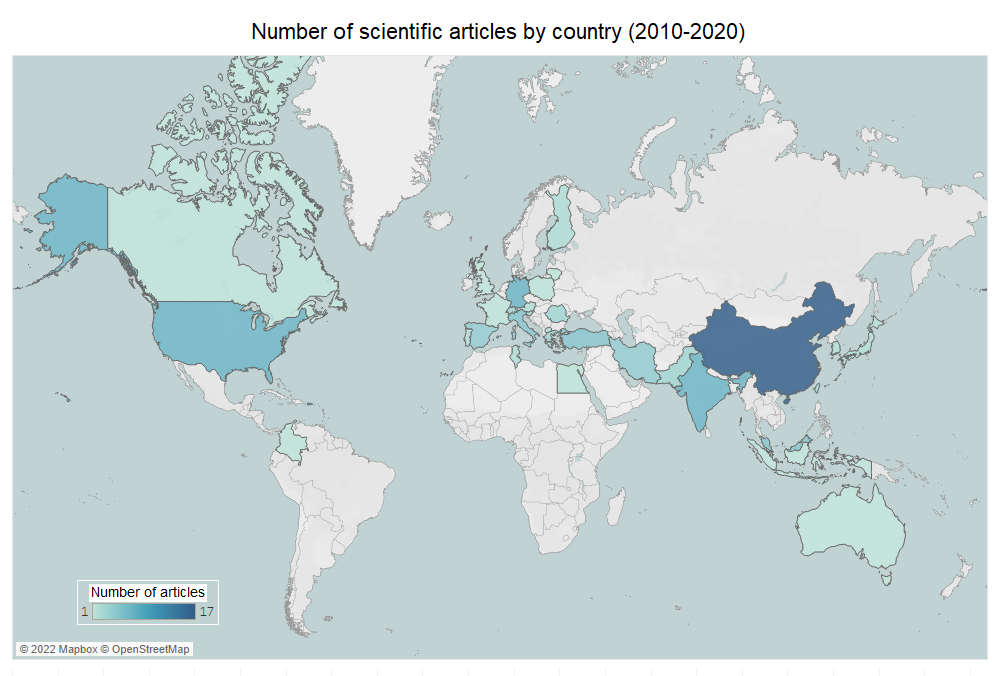

In [7]:
Image(filename='.\\Emmanuel\\figures\Cantidad de papers por pais y continente (Tableau).png') 

In [8]:
df_metadata=df_metadata.fillna('-')
df_metadata_sin_duplicates = df_metadata.drop_duplicates(subset='paper_id')

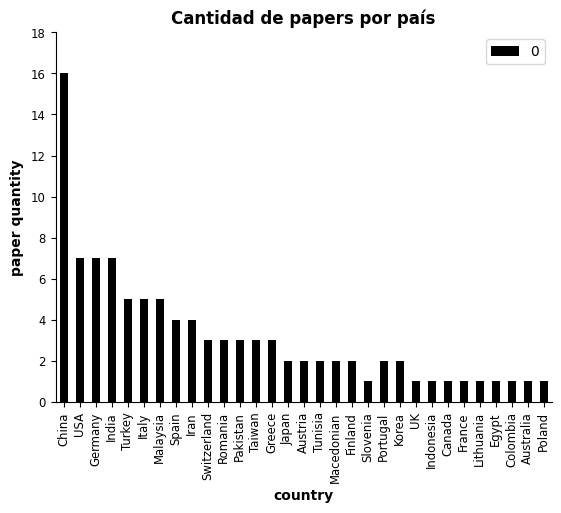

  continents  quantity
0       Asia        49
1     Europa        39
2    America         9
3     Africa         3
4  Australia         1


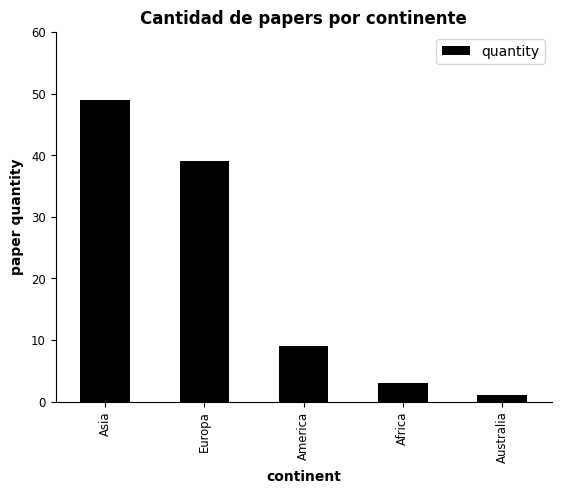

In [9]:
paises = df_metadata_sin_duplicates["first_author_country_affiliation"].unique()

countries = df_metadata_sin_duplicates.pivot_table(columns=['first_author_country_affiliation'], aggfunc='size')
df_countries = pd.DataFrame(countries)

order = ['China','USA', 'Germany', 'India','Turkey','Italy', 'Malaysia','Spain','Iran', 'Switzerland','Romania','Pakistan', 'Taiwan','Greece', 'Japan',
'Austria', 'Tunisia','Macedonian', 'Finland', 'Slovenia', 'Portugal', 'Korea',
'UK', 'Indonesia','Canada', 'France', 'Lithuania', 
'Egypt','Colombia', 'Australia', 'Poland']

df_countries.loc[order].plot(kind='bar', title='Cantidad de papers por país', xlabel='country', ylabel='paper quantity')
plt.show()

#Papers por continente - plot
papers_continents = {'continents' : ['Asia', 'Europa','America','Africa','Australia'],
'quantity' : [49, 39, 9, 3, 1]}
df_continents = pd.DataFrame(papers_continents)
print(df_continents)

df_continents.set_index('continents').plot(kind='bar', title='Cantidad de papers por continente', xlabel='continent', ylabel='paper quantity')
plt.show()

In [10]:
df_countries

0
first_author_country_affiliation    
Australia                          1
Austria                            2
Canada                             1
China                             16
Colombia                           1
Egypt                              1
Finland                            2
France                             1
Germany                            7
Greece                             3
India                              7
Indonesia                          1
Iran                               4
Italy                              5
Japan                              2
Korea                              2
Lithuania                          1
Macedonian                         2
Malaysia                           5
Pakistan                           3
Poland                             1
Portugal                           2
Romania                            3
Slovenia                           1
Spain                              4
Switzerland                        3
Taiwan                             3
Tunisia                            2
Turkey                             5
UK                                 1
USA                                7

<AxesSubplot: xlabel='Source type', ylabel='count'>

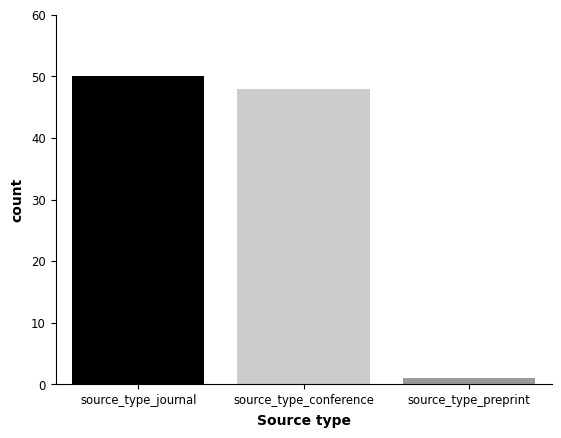

In [11]:
df_sources = df_metadata_sin_duplicates.iloc[:,7:10]
def get_value(row):
     for c in df_sources.columns:
         if row[c]== 'x':
             return c

df_sources = df_sources.apply(get_value, axis=1)
df_sources = pd.DataFrame(df_sources)
df_sources.columns = ['Source type']

#ploteo
quantity = df_sources['Source type'].value_counts()
df_quantity = pd.DataFrame(quantity)


sns.countplot(x='Source type', data=df_sources)

In [12]:
df_quantity

Source type
source_type_journal              50
source_type_conference           48
source_type_preprint              1

### ¿Cual es la evolucion temporal (2010-2020) del uso de los modelos emocionales empleados (categoriales o dimensionales)?

Gráfico de barra por año (2010-2020) por paper según modelos de emociones empleado (categoriales o dimensionales)

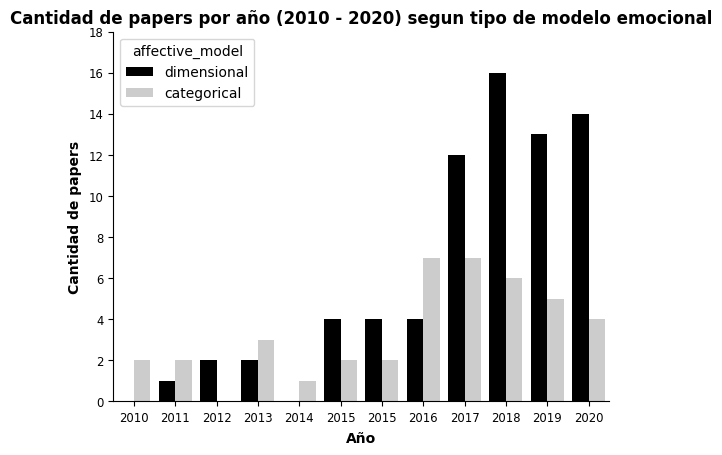

In [13]:
#rellenar datos faltantes y NO SE DROPEAN los duplicados (hay papers que usan multiples modelos)
df_statistical_learning_models=df_statistical_learning_models.fillna('-')
df_statistical_learning_models=df_statistical_learning_models[df_statistical_learning_models['affective_model'].isin(['categorical', 'dimensional'])]
df_statistical_learning_models_0 = df_statistical_learning_models.groupby(['paper_id','affective_model']).nth(0)
df_statistical_learning_models_0.reset_index(inplace=True)

#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g= sns.countplot(x='year', 
    data= df_statistical_learning_models_0, 
    hue='affective_model', 
    order=category_order)
g.set(title = 'Cantidad de papers por año (2010 - 2020) segun tipo de modelo emocional', xlabel = 'Año', ylabel = 'Cantidad de papers')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Cantidad de papers por año (2010-2020) segun tipo de modelo emocional.png')

In [14]:
df_statistical_learning_models_0["year"] = df_statistical_learning_models_0["year"].astype(int)
df_statistical_learning_models_0

paper_id affective_model model_id  \
0         1.0     dimensional      1.0   
1         2.0     categorical      2.0   
2         3.0     dimensional      3.0   
3         4.0     dimensional      5.0   
4         5.0     categorical     11.0   
..        ...             ...      ...   
102      95.0     dimensional    481.0   
103      96.0     dimensional    491.0   
104      97.0     dimensional    492.0   
105      98.0     dimensional    494.0   
106      99.0     dimensional    498.0   

                                          apa_citation  year is_classifier  \
0    Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...  2017             x   
1    Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...  2016             x   
2    Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...  2018             x   
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....  2018             x   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....  2016             -   
..                                                 ...   ...           ...   
102  Yang, H. C., & Lee, C. C. (2019, September). A...  2020             x   
103  Kołodziej, M., Tarnowski, P., Majkowski, A., &...  2020             x   
104  Ganapathy, N., & Swaminathan, R. (2019). Emoti...  2020             x   
105  Subramanian, R., Wache, J., Abadi, M. K., Vier...  2018             x   
106  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...  2019             x   

    class_model_output_number        class_model_output_categories  \
0                           2                       calm, distress   
1                           5  Happiness, Grief, Fear, Anger, Calm   
2                           2                               LA, HA   
3                           4               HAHV, HALV, LAHV, LALV   
4                           -                                    -   
..                        ...                                  ...   
102                         2                               HA, LA   
103                         2                               HA, LA   
104                         2                               HA, LA   
105                         2                               HV, LV   
106                         4               HAHV, HALV, LAHV, LALV   

    class_Logistic Regression class_Support Vector Machine (SVM)  ...  \
0                           -                                  -  ...   
1                           -                                  x  ...   
2                           -                                  -  ...   
3                           -                                  -  ...   
4                           -                                  -  ...   
..                        ...                                ...  ...   
102                         -                                  x  ...   
103                         -                                  x  ...   
104                         -                                  -  ...   
105                         -                                  x  ...   
106                         -                                  x  ...   

    regre_Recurrent NN regre_LSTM regre_PNN (probabilistic neural network)  \
0                    -          -                                        -   
1                    -          -                                        -   
2                    -          -                                        -   
3                    -          -                                        -   
4                    -          -                                        -   
..                 ...        ...                                      ...   
102                  -          -                                        -   
103                  -          -                                        -   
104                  -          -                                        -   
105                  -          -                                

### ¿Los modelos de clasificacion dimensionales basados en arousal performan mejor que los basados en valence?

Análisis estadístico 
1. Subsetear par quedarse solo con modelso de “HV,LV” (y “LV, “HV”), y “HA,LA” (y “LA, “HA”).
2. FIltrar para quedarnos unicamente con papers que tengan tanto valencia Y arousal (al querer hacer modelos “intrasujeto” es imporatne que se cumpla con esta condición.
3. Agrupar  por paper y sacar la media de la performance (para que quede paper un unico valor de performance promedio de valencia, y un unico valor de performance promedio de arousal. Esto es fundamental para los pasos que siguen)
4. Recien ahora (y  no antes, esto es mucho muy importante) analizar cual es la medida de performance mas prevalente y subsetear para quedarnos solo con esa medida.
5. Hacer T test INTRASUJETO

In [15]:
#creacion data frame y subseteo por: modelos dimensionales, tipo clasiffier, categorias HA/LA y HV/LV
df_alg_perf = df_alg_perf.fillna(0)
df = df_alg_perf
df = df[df['affective_model'] == 'dimensional']
df = df[df['is_classifier'].isin(['x', 'X'])]
df = df[df['class_model_output_categories'].isin(['HA, LA', 'HV, LV', 'LA, HA', 'LV, HV'])]
df[['class_model_output_categories']] = df[['class_model_output_categories']].replace(['LA, HA', 'LV, HV'], ['HA, LA', 'HV, LV' ])

In [16]:
df[["paper_id", "apa_citation", "class_model_output_categories"]]


paper_id                                       apa_citation  \
2         3.0  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
3         3.0  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
44       11.0  Girardi, D., Lanubile, F., & Novielli, N. (201...   
45       11.0  Girardi, D., Lanubile, F., & Novielli, N. (201...   
129      20.0  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   
..        ...                                                ...   
492      97.0  Ganapathy, N., & Swaminathan, R. (2019). Emoti...   
493      98.0  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
494      98.0  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
495      98.0  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
496      98.0  Subramanian, R., Wache, J., Abadi, M. K., Vier...   

    class_model_output_categories  
2                          HA, LA  
3                          HV, LV  
44                         HA, LA  
45                         HV, LV  
129                        HA, LA  
..                            ...  
492                        HV, LV  
493                        HV, LV  
494                        HV, LV  
495                        HA, LA  
496                        HA, LA  

[121 rows x 3 columns]

2. FIltrar para quedarnos unicamente con papers que tengan tanto valencia Y arousal (al querer hacer modelos “intrasujeto” es imporatne que se cumpla con esta condición.

In [17]:
"""revision a mano de los modelos
vuela el paper_id 24, 37, 66, 97
porque no contenian modelos tanto para arousal como para valencia
se procede a filtrarlos"""

df.drop(df[ df['paper_id'] == 24].index,inplace = True)
df.drop(df[ df['paper_id'] == 37].index,inplace = True)
df.drop(df[ df['paper_id'] == 66].index,inplace = True)
df.drop(df[ df['paper_id'] == 97].index,inplace = True)

In [18]:
df_excel = df
df_excel.to_excel(".\data\\analisis_estadistico.xlsx")

In [19]:
df.iloc[:,57:]

accuracy precision f-measure recall-sensitivity-true_positive_rate  \
2      71.53         -         -                                     -   
3      71.04         -         -                                     -   
44         -        67        63                                    64   
45         -        58        35                                    50   
129    62.23         -         -                                     -   
..       ...       ...       ...                                   ...   
490       79     78.38     77.85                                 77.33   
493        0         0        64                                     0   
494        0         0        68                                     0   
495        0         0        61                                     0   
496        0         0        66                                     0   

    specificity_true-negative-rate false-positive-rate false-negative-rate  \
2                                -                   -                   0   
3                                -                   0                   0   
44                               0                   0                   0   
45                               0                   0                   0   
129                              -                   -                   -   
..                             ...                 ...                 ...   
490                          77.78                   0                   0   
493                              0                   0                   0   
494                              0                   0                   0   
495                              0                   0                   0   
496                              0                   0                   0   

    roc-auc R2  R MAE-(Mean-Absolute-Error)  \
2         -  -  0                         -   
3         -  -  0                         -   
44        0  0  0                         0   
45        0  0  0                         0   
129       -  -  -                         -   
..      ... .. ..                       ...   
490       0  0  0                         0   
493       0  0  0                         0   
494       0  0  0                         0   
495       0  0  0                         0   
496       0  0  0                         0   

    Concordance-Correlation-Coefficient-(CCC) Spearman’s-ranking-correlation  \
2                                           0                              0   
3                                           0                              0   
44                                          0                              0   
45                                          0                              0   
129                                         -                              0   
..                                        ...                            ...   
490                                         0                              0   
493                                         0                              0   
494                                         0                              0   
495                                         0                              0   
496                                         0                              0   

    Mean-square-error-(MSE) Root-Mean-Square-Error-(RMSE)  \
2                         0                             0   
3                         0                             0   
44                        0                             0   
45                        0                             0   
129                       0                             0   
..                      ...                           ...   
490                       0                             0   
493                       0                             0   
494                       0                             0   
495                       0               

In [20]:
df[["paper_id", "model_id", "apa_citation", "class_model_output_categories"]]

paper_id  model_id                                       apa_citation  \
2         3.0       3.0  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
3         3.0       4.0  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
44       11.0      45.0  Girardi, D., Lanubile, F., & Novielli, N. (201...   
45       11.0      46.0  Girardi, D., Lanubile, F., & Novielli, N. (201...   
129      20.0     130.0  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   
..        ...       ...                                                ...   
490      96.0     491.0  Kołodziej, M., Tarnowski, P., Majkowski, A., &...   
493      98.0     494.0  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
494      98.0     495.0  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
495      98.0     496.0  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
496      98.0     497.0  Subramanian, R., Wache, J., Abadi, M. K., Vier...   

    class_model_output_categories  
2                          HA, LA  
3                          HV, LV  
44                         HA, LA  
45                         HV, LV  
129                        HA, LA  
..                            ...  
490                        HA, LA  
493                        HV, LV  
494                        HV, LV  
495                        HA, LA  
496                        HA, LA  

[64 rows x 4 columns]

In [21]:
"""
se calcula a mano los promedios de arousal y valencia para cada paper
"""
df2 = pd.read_excel(".\data\\Libro12.xlsx") 
df2.head()

paper_id                                       apa_citation  year  \
0         3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...  2018   
1         3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...  2018   
2        11  Girardi, D., Lanubile, F., & Novielli, N. (201...  2018   
3        11  Girardi, D., Lanubile, F., & Novielli, N. (201...  2018   
4        20  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...  2017   

  affective_model class_model_output_categories  accuracy  precision  \
0     dimensional                        HA, LA     71.53        0.0   
1     dimensional                        HV, LV     71.04        0.0   
2     dimensional                        HA, LA      0.00       67.0   
3     dimensional                        HV, LV      0.00       58.0   
4     dimensional                        HA, LA     62.23        0.0   

   f0measure  recall0sensitivity0true_positive_rate  \
0        0.0                                    0.0   
1        0.0                                    0.0   
2       63.0                                   64.0   
3       35.0                                   50.0   
4        0.0                                    0.0   

   specificity_true0negative0rate  ...  R  MAE0(Mean0Absolute0Error)  \
0                               0  ...  0                          0   
1                               0  ...  0                          0   
2                               0  ...  0                          0   
3                               0  ...  0                          0   
4                               0  ...  0                          0   

   Concordance0Correlation0Coefficient0(CCC)  Spearman’s0ranking0correlation  \
0                                          0                               0   
1                                          0                               0   
2                                          0                               0   
3                                          0                               0   
4                                          0                               0   

   Mean0square0error0(MSE)  Root0Mean0Square0Error0(RMSE)  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   Pearson0Correlation Coefficient0(r)  unweighted0average0recall0(UAR)  \
0                                    0                              0.0   
1                                    0                              0.0   
2                                    0                              0.0   
3                                    0                              0.0   
4                                    0                              0.0   

   Matthews0Correlation0Coefficient  G0mean0(Geometric0mean)  
0                               0.0                        0  
1                               0.0                        0  
2                               0.0                        0  
3                               0.0                        0  
4                               0.0                        0  

[5 rows x 24 columns]

4. Recien ahora (y  no antes, esto es mucho muy importante) analizar cual es la medida de performance mas prevalente y subsetear para quedarnos solo con esa medida.

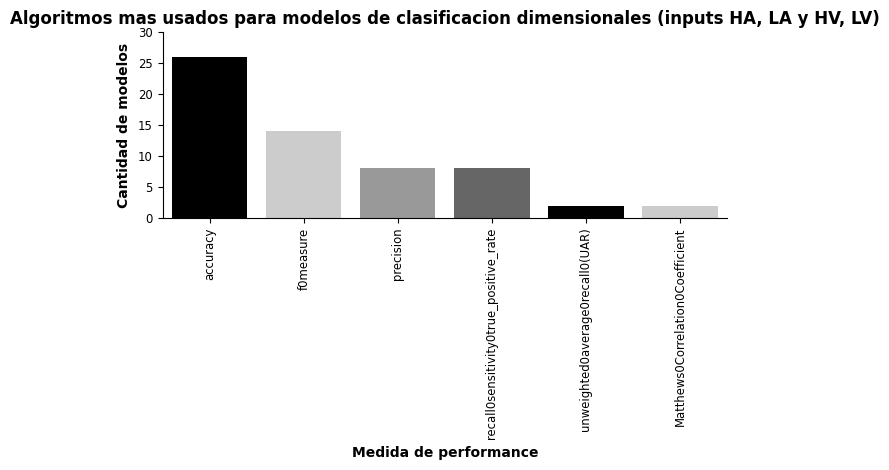

In [22]:
df_performance_medidas = multi_reversing_n(df2, 'paper_id',df2.iloc[:,5:])
titulos = ['Algoritmos mas usados para modelos de clasificacion dimensionales (inputs HA, LA y HV, LV)', 'Medida de performance', 'Cantidad de modelos']
bar_plot('variable',df_performance_medidas,titulos)

In [23]:
df2 = df2.fillna('-')
df2 = df2[(df2['accuracy'] != '-') & (df2['accuracy'] != 0)]

In [24]:
#filtramos por accuracy
df2 = df2.fillna('-')
df2 = df2[(df2['accuracy'] != '-') & (df2['accuracy'] != 0)]

In [25]:
df2[["paper_id", "apa_citation", "class_model_output_categories", "accuracy"]]

paper_id                                       apa_citation  \
0          3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
1          3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
4         20  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   
5         20  Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...   
6         23  Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   
7         23  Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   
10        32  Siddharth,  null, Jung, T.-P., & Sejnowski, T....   
11        32  Siddharth,  null, Jung, T.-P., & Sejnowski, T....   
12        38  Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   
13        38  Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...   
14        64  Sharma, V., Prakash, N. R., & Kalra, P. (2019)...   
15        64  Sharma, V., Prakash, N. R., & Kalra, P. (2019)...   
16        67  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
17        67  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
20        75  Chang, E. J., Rahimi, A., Benini, L., & Wu, A....   
21        75  Chang, E. J., Rahimi, A., Benini, L., & Wu, A....   
24        83  Santamaria-Granados, L., Munoz-Organero, M., R...   
25        83  Santamaria-Granados, L., Munoz-Organero, M., R...   
26        87  Ganapathy, N., & Swaminathan, R. (2020). Emoti...   
27        87  Ganapathy, N., & Swaminathan, R. (2020). Emoti...   
28        92  Susanto, I. Y., Pan, T. Y., Chen, C. W., Hu, M...   
29        92  Susanto, I. Y., Pan, T. Y., Chen, C. W., Hu, M...   
30        95  Yin, G., Sun, S., Zhang, H., Yu, D., Li, C., Z...   
31        95  Yin, G., Sun, S., Zhang, H., Yu, D., Li, C., Z...   
34        98  Ganapathy, N., & Swaminathan, R. (2019). Emoti...   
35        98  Ganapathy, N., & Swaminathan, R. (2019). Emoti...   

   class_model_output_categories  accuracy  
0                         HA, LA     71.53  
1                         HV, LV     71.04  
4                         HA, LA     62.23  
5                         HV, LV     55.78  
6                         HA, LA     71.53  
7                         HV, LV     71.04  
10                        HA, LA     64.84  
11                        HV, LV     63.28  
12                        HA, LA     50.54  
13                        HV, LV     65.33  
14                        HA, LA     79.00  
15                        HV, LV     69.80  
16                        HV, LV     53.68  
17                        HA, LA     62.11  
20                        HV, LV     71.20  
21                        HA, LA     64.33  
24                        HA, LA     69.00  
25                        HV, LV     67.00  
26                        HA, LA     72.08  
27                        HV, LV     68.90  
28                        HA, LA     59.88  
29                        HV, LV     60.13  
30                        HV, LV     55.92  
31                        HA, LA     57.24  
34                        HA, LA     65.63  
35                        HV, LV     68.75

In [26]:
#creamos df para el analisis estadistico
df_3 = df2[["class_model_output_categories","accuracy"]]
df_3

class_model_output_categories  accuracy
0                         HA, LA     71.53
1                         HV, LV     71.04
4                         HA, LA     62.23
5                         HV, LV     55.78
6                         HA, LA     71.53
7                         HV, LV     71.04
10                        HA, LA     64.84
11                        HV, LV     63.28
12                        HA, LA     50.54
13                        HV, LV     65.33
14                        HA, LA     79.00
15                        HV, LV     69.80
16                        HV, LV     53.68
17                        HA, LA     62.11
20                        HV, LV     71.20
21                        HA, LA     64.33
24                        HA, LA     69.00
25                        HV, LV     67.00
26                        HA, LA     72.08
27                        HV, LV     68.90
28                        HA, LA     59.88
29                        HV, LV     60.13
30                        HV, LV     55.92
31                        HA, LA     57.24
34                        HA, LA     65.63
35                        HV, LV     68.75

Aplicamos los estadísticos

obtenido de: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [27]:
#creacion lista con la performance para arousal y valence
df_arousal = df_3[df_3['class_model_output_categories'] == 'HA, LA']
df_arousal = df_arousal['accuracy']
arousal1 = df_arousal.values.tolist()
arousal1 = list(map(float, arousal1))

df_valence = df_3[df_3['class_model_output_categories'] == 'HV, LV']
df_valence = df_valence['accuracy']
valence1 = df_valence.values.tolist()
valence1 = list(map(float, valence1))

p1 = stats.ttest_rel(arousal1, valence1, alternative = "greater")

print(p1)

#Test parametrico - t de student
#t_student(arousal1, valence1)

#Test no parametrico - U de Mann-Whitney
#mann_whitney_u(arousal1, valence1)

Ttest_relResult(statistic=0.35229084656919984, pvalue=0.3653649152631109)


### ¿Cual es la performance promedio (usando accuracy) para cada anio?

1. Hacer un plots para ver como cambia la performance promedio (accuracy) en general con el paso del tiempo.  Esto lo resolveria con un box plot por año de accuracy. Donde en el eje X este de 2010 a 2020, y en el eje Y este el accuracy. Con este plot podriamos analizar si efectivamente mejora la performance de los modelos predictivos con el paso del tiempo

creacion df para el plot, con el anio las dimensiones y a performance

In [28]:
performances_av = df2[["year", "class_model_output_categories", "accuracy"]]
#reemplazos
performances_av[['class_model_output_categories']] = performances_av[['class_model_output_categories']].replace(['HA, LA', 'HV, LV' ], ['arousal', 'valence' ])
performances_av.rename(columns = {'class_model_output_categories':'dimension', 'accuracy':'performance'}, inplace = True)

performances_av

C:\Users\someo\AppData\Local\Temp\ipykernel_39484\1501514481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performances_av[['class_model_output_categories']] = performances_av[['class_model_output_categories']].replace(['HA, LA', 'HV, LV' ], ['arousal', 'valence' ])
C:\Users\someo\AppData\Local\Temp\ipykernel_39484\1501514481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performances_av.rename(columns = {'class_model_output_categories':'dimension', 'accuracy':'performance'}, inplace = True)


year dimension  performance
0   2018   arousal        71.53
1   2018   valence        71.04
4   2017   arousal        62.23
5   2017   valence        55.78
6   2017   arousal        71.53
7   2017   valence        71.04
10  2018   arousal        64.84
11  2018   valence        63.28
12  2017   arousal        50.54
13  2017   valence        65.33
14  2019   arousal        79.00
15  2019   valence        69.80
16  2020   valence        53.68
17  2020   arousal        62.11
20  2019   valence        71.20
21  2019   arousal        64.33
24  2019   arousal        69.00
25  2019   valence        67.00
26  2020   arousal        72.08
27  2020   valence        68.90
28  2020   arousal        59.88
29  2020   valence        60.13
30  2020   valence        55.92
31  2020   arousal        57.24
34  2020   arousal        65.63
35  2020   valence        68.75

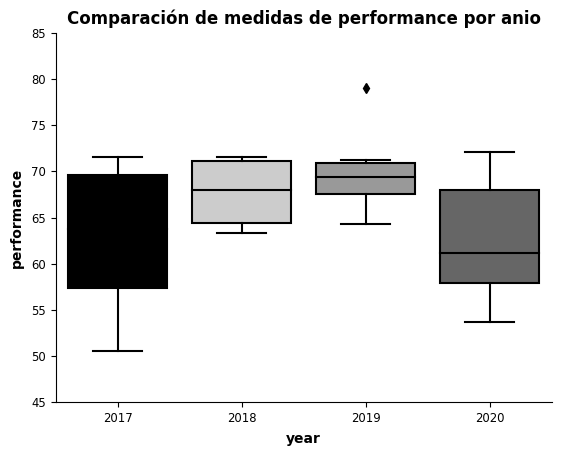

In [29]:
g = sns.boxplot(y="performance", x="year", data=performances_av)
g.set(title = 'Comparación de medidas de performance por anio')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Comparación de medidas de performance por anio.png')

1.bis. subsjetear esta progresion de accuracies pero por dimension afectiva: hacer un plot (conjunto de boxplots de 2010 a 2020) de valencia y otro plot (conjunto de boxplots de 2010 a 2020) de arousal. Este plot nos ayudaría a ver si cambia la progresion de accuracies dependiendo cada dimension afectiva

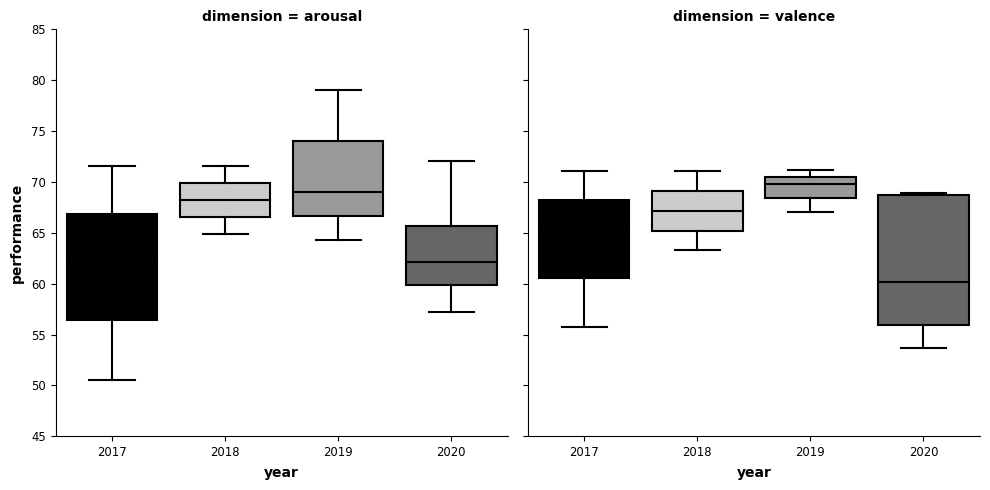

In [30]:
g = sns.catplot(x="year", y="performance", col =  "dimension", data=performances_av, kind="box")
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Comparación de medidas de performance por anio, para valence y arousal.png')

[Text(0.5, 1.0, 'Comparación de medidas de performance')]

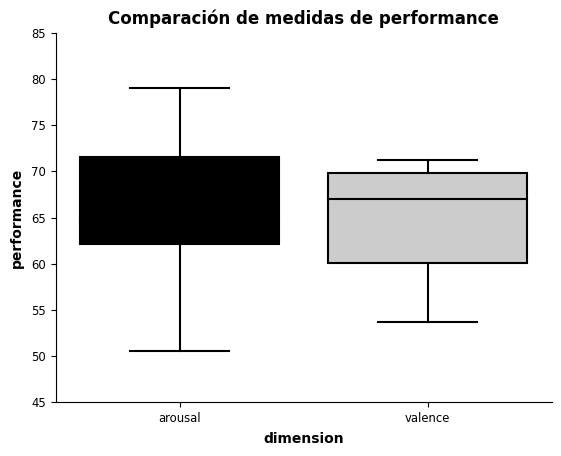

In [31]:
g = sns.boxplot(y="performance", x="dimension", data=performances_av)
g.set(title = 'Comparación de medidas de performance')

### ¿Cual es la evolucion temporal (2010-2020) del uso de los modelos de regresion y categoriales empleados?
Cantidad de modelos de regresion o categorial por anio

2. Hacer un plot de la progresión de modelos de regresión vs clasificación de 2010 a 2020. Este plot deberia ser igual al plot que ve la progresion de modelos dimensioanles vs categoriales. La idea con este plot seria analizar sin la progresion de papers basados en modelos dimensioanels se acompaña con modelso estadísticos de regresion (que es lo que se esperaria dado el tipo de variable, pero asumimos que no sucede)

In [32]:
def label_model (row):
   if row['is_classifier'] == "x" :
      return 'classifier'
   if row['is_regressor'] == "x" :
      return 'regressor'
   return 'Other'

In [33]:
df_statistical_learning_models['model']  = df_statistical_learning_models.apply(lambda row: label_model(row), axis=1)

In [34]:
df_statistical_learning_models['model'].value_counts()

classifier    453
regressor      46
Name: model, dtype: int64

In [35]:
df_models = df_statistical_learning_models[["apa_citation",'model', "year", "model_id"]]

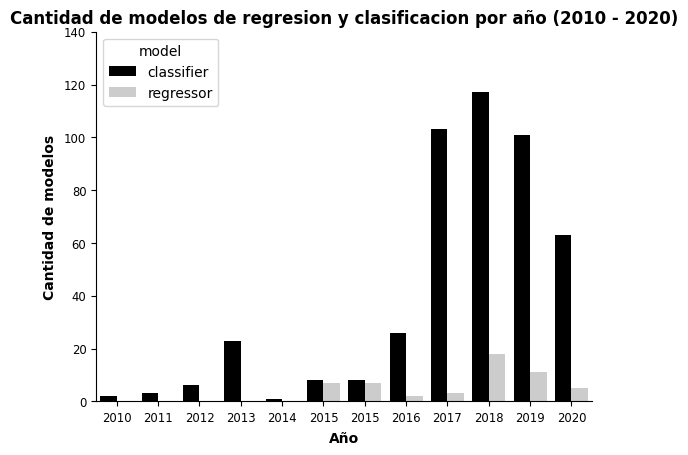

In [36]:
#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g= sns.countplot(x='year', 
    data= df_models, 
    hue='model', 
    order=category_order)
g.set(title = 'Cantidad de modelos de regresion y clasificacion por año (2010 - 2020)', xlabel = 'Año', ylabel = 'Cantidad de modelos')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Cantidad de modelos de regresion y clasificacion por año (2010 - 2020).png')

### ¿Cuantas veces fueron testeadas juntas las distintas dimensiones y categorias emocionales?

#### Primero obtenemos las categorias emocionales usadas y su frecuencia

* Hubo 55 modelos que usaron categorias emocionales, siendo disgust, fear, y sadness las mas repetidas.
* Tener en cuenta que un modelo puede usar mas de una categoria, por lo que la funcion get_values no funciona en este caso, y un paper puede concentrar la mayoria de los usos de un conjunto de categorias

In [37]:
df_self_report = df_self_report.fillna('-')

In [38]:
emotional_categories_grouped = df_self_report.groupby(['paper_id','Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise' ,'Happiness', 'Pleasant',
                            'Anxiety', 'Neutral', 'Funny', 'Boredom', 'Relaxation', 'Amusement', 'Joy']).nth(0)
emotional_categories_grouped.reset_index(inplace=True)

In [39]:
emotional_categories_grouped = multi_reversing(
    emotional_categories_grouped, 'paper_id', 
    emotional_categories_grouped
    [[
    'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise' ,'Happiness', 'Pleasant',
    'Anxiety', 'Neutral', 'Funny', 'Boredom', 'Relaxation', 'Amusement', 'Joy'
    ]])

In [40]:
emotional_categories_grouped

paper_id variable value
74          72   Stress     x
106          4  Disgust     x
112         10  Disgust     x
118         16  Disgust     x
122         20  Disgust     x
...        ...      ...   ...
1376        37      Joy     x
1399        59      Joy     x
1401        60      Joy     x
1410        69      Joy     x
1431        90      Joy     x

[138 rows x 3 columns]

In [41]:
print(emotional_categories_grouped['variable'].value_counts())
print(emotional_categories_grouped['variable'].unique())

Disgust       19
Fear          19
Sadness       19
Neutral       19
Surprise      17
Anxiety       11
Amusement     10
Joy           10
Happiness      8
Boredom        2
Stress         1
Pleasant       1
Funny          1
Relaxation     1
Name: variable, dtype: int64
['Stress' 'Disgust' 'Fear' 'Sadness' 'Surprise' 'Happiness' 'Pleasant'
 'Anxiety' 'Neutral' 'Funny' 'Boredom' 'Relaxation' 'Amusement' 'Joy']


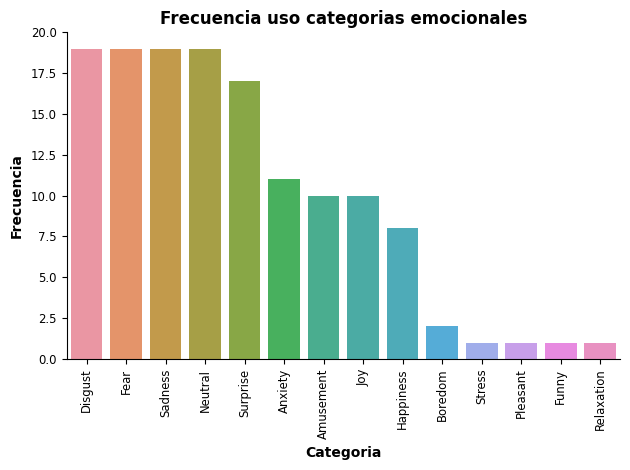

In [42]:
titulos = ['Frecuencia uso categorias emocionales', 'Categoria', 'Frecuencia']
bar_plot('variable',emotional_categories_grouped,titulos)

In [43]:
emotional_dimensions_grouped = df_self_report.groupby([
    'paper_id','valence',
    'arousal', 'dominance', 'like / dislike', 'familiarity', 'engagement',
    'predictability']).nth(0)
emotional_dimensions_grouped.reset_index(inplace=True)

In [44]:
emotional_dimensions_grouped = multi_reversing(
    emotional_dimensions_grouped, 'paper_id', 
    emotional_dimensions_grouped
    [[
    'valence',
    'arousal', 'dominance', 'like / dislike', 'familiarity', 'engagement',
    'predictability'
    ]])

In [45]:
emotional_dimensions_grouped

paper_id        variable value
2           3         valence     x
3           4         valence     x
4           5         valence     x
9          10         valence     x
10         11         valence     x
..        ...             ...   ...
658        35  predictability     x
662        37  predictability     x
685        59  predictability     x
686        60  predictability     x
696        69  predictability     x

[177 rows x 3 columns]

In [46]:
print(emotional_dimensions_grouped['variable'].value_counts())
print(emotional_dimensions_grouped['variable'].unique())

valence           49
arousal           49
dominance         29
like / dislike    20
familiarity       19
predictability     9
engagement         2
Name: variable, dtype: int64
['valence' 'arousal' 'dominance' 'like / dislike' 'familiarity'
 'engagement' 'predictability']


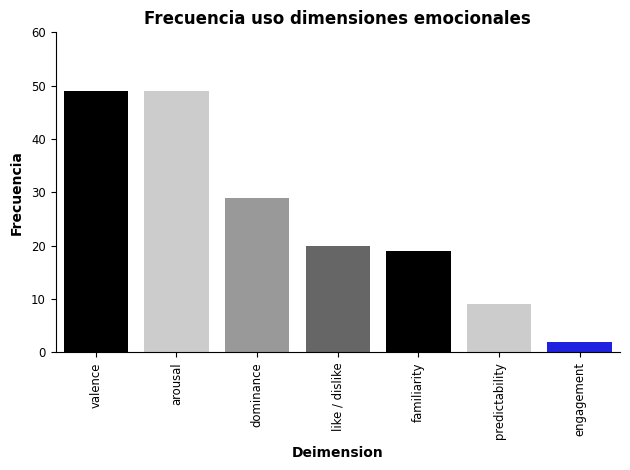

In [47]:
titulos = ['Frecuencia uso dimensiones emocionales', 'Deimension', 'Frecuencia']
bar_plot('variable',emotional_dimensions_grouped,titulos)

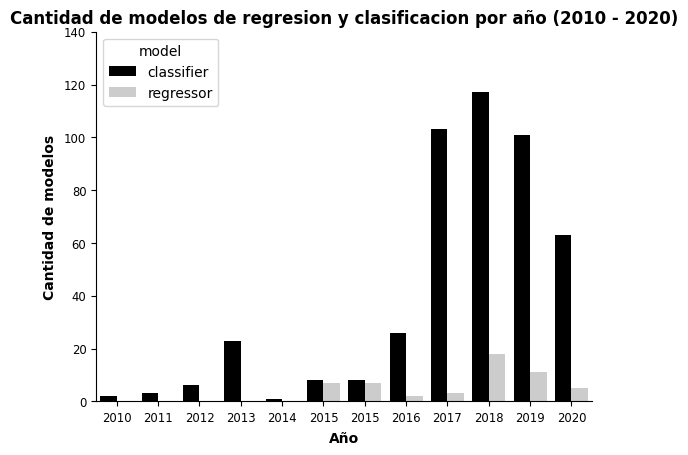

In [48]:
g= sns.countplot(x='year', 
    data= df_models, 
    hue='model', 
    order=category_order)
g.set(title = 'Cantidad de modelos de regresion y clasificacion por año (2010 - 2020)', xlabel = 'Año', ylabel = 'Cantidad de modelos')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Cantidad de modelos de regresion y clasificacion por año (2010 - 2020).png')

In [49]:
df_models["model"].value_counts()

classifier    453
regressor      46
Name: model, dtype: int64

In [50]:
df_models["model"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

classifier    90.8%
regressor      9.2%
Name: model, dtype: object

#### Creamos el grafo
https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [51]:
#creacion matrix de adyacencia
df_self_report.fillna('-', inplace= True)
self_0 = df_self_report[df_self_report['is_categorial']!= '-']

df_matrix_con_paperid_0 = self_0.groupby(
        ["paper_id",'Anger',
        'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness',
        'Pleasant', 'Anxiety', 'Neutral', 'Funny', 'Boredom', 'Relaxation', 'Amusement', 'Joy']
        ).nth(0)
df_matrix_con_paperid_0.reset_index(inplace=True)

print(df_matrix_con_paperid_0)

df_matrix = df_matrix_con_paperid_0[['Anger',
        'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness',
        'Pleasant', 'Anxiety', 'Neutral', 'Funny', 'Boredom', 'Relaxation', 'Amusement', 'Joy']
        ]

df_matrix = df_matrix.replace('-', 0)
df_matrix = df_matrix.replace('x', 1)
adj_matrix = df_matrix.T.dot(df_matrix)
np.fill_diagonal(adj_matrix.values, 0)

    paper_id Anger Stress Disgust Fear Sadness Surprise Happiness Pleasant  \
0          4     x      -       x    x       x        x         -        -   
1         10     x      -       x    x       x        x         -        -   
2         16     x      -       x    x       x        x         -        -   
3         20     x      -       x    x       x        x         -        -   
4         32     x      -       x    x       x        x         x        -   
5         35     x      -       x    x       x        x         -        -   
6         37     x      -       x    x       x        x         -        -   
7         37     x      -       x    x       x        x         x        -   
8         43     -      -       -    -       -        -         -        -   
9         59     x      -       x    x       x        x         -        -   
10        60     x      -       x    x       x        x         -        -   
11        61     -      -       -    -       -        -         

In [52]:
adj_matrix

Anger  Stress  Disgust  Fear  Sadness  Surprise  Happiness  \
Anger           0       0       18    18       18        17          8   
Stress          0       0        0     0        0         0          0   
Disgust        18       0        0    19       19        17          8   
Fear           18       0       19     0       19        17          8   
Sadness        18       0       19    19        0        17          8   
Surprise       17       0       17    17       17         0          8   
Happiness       8       0        8     8        8         8          0   
Pleasant        0       0        1     1        1         0          0   
Anxiety         9       0       10    10       10         9          0   
Neutral        17       0       17    17       17        17          8   
Funny           0       0        0     0        0         0          0   
Boredom         0       0        0     0        0         0          0   
Relaxation      0       0        0     0        0         0          0   
Amusement      10       0       10    10       10         9          0   
Joy             9       0        9     9        9         9          0   

            Pleasant  Anxiety  Neutral  Funny  Boredom  Relaxation  Amusement  \
Anger              0        9       17      0        0           0         10   
Stress             0        0        0      0        0           0          0   
Disgust            1       10       17      0        0           0         10   
Fear               1       10       17      0        0           0         10   
Sadness            1       10       17      0        0           0         10   
Surprise           0        9       17      0        0           0          9   
Happiness          0        0        8      0        0           0          0   
Pleasant           0        1        0      0        0           0          0   
Anxiety            1        0        9      0        0           0          9   
Neutral            0        9        0      1        0           0          9   
Funny              0        0        1      0        0           0          0   
Boredom            0        0        0      0        0           0          0   
Relaxation         0        0        0      0        0           0          0   
Amusement          0        9        9      0        0           0          0   
Joy                0        9        9      0        0           0          9   

            Joy  
Anger         9  
Stress        0  
Disgust       9  
Fear          9  
Sadness       9  
Surprise      9  
Happiness     0  
Pleasant      0  
Anxiety       9  
Neutral       9  
Funny         0  
Boredom       0  
Relaxation    0  
Amusement     9  
Joy           0

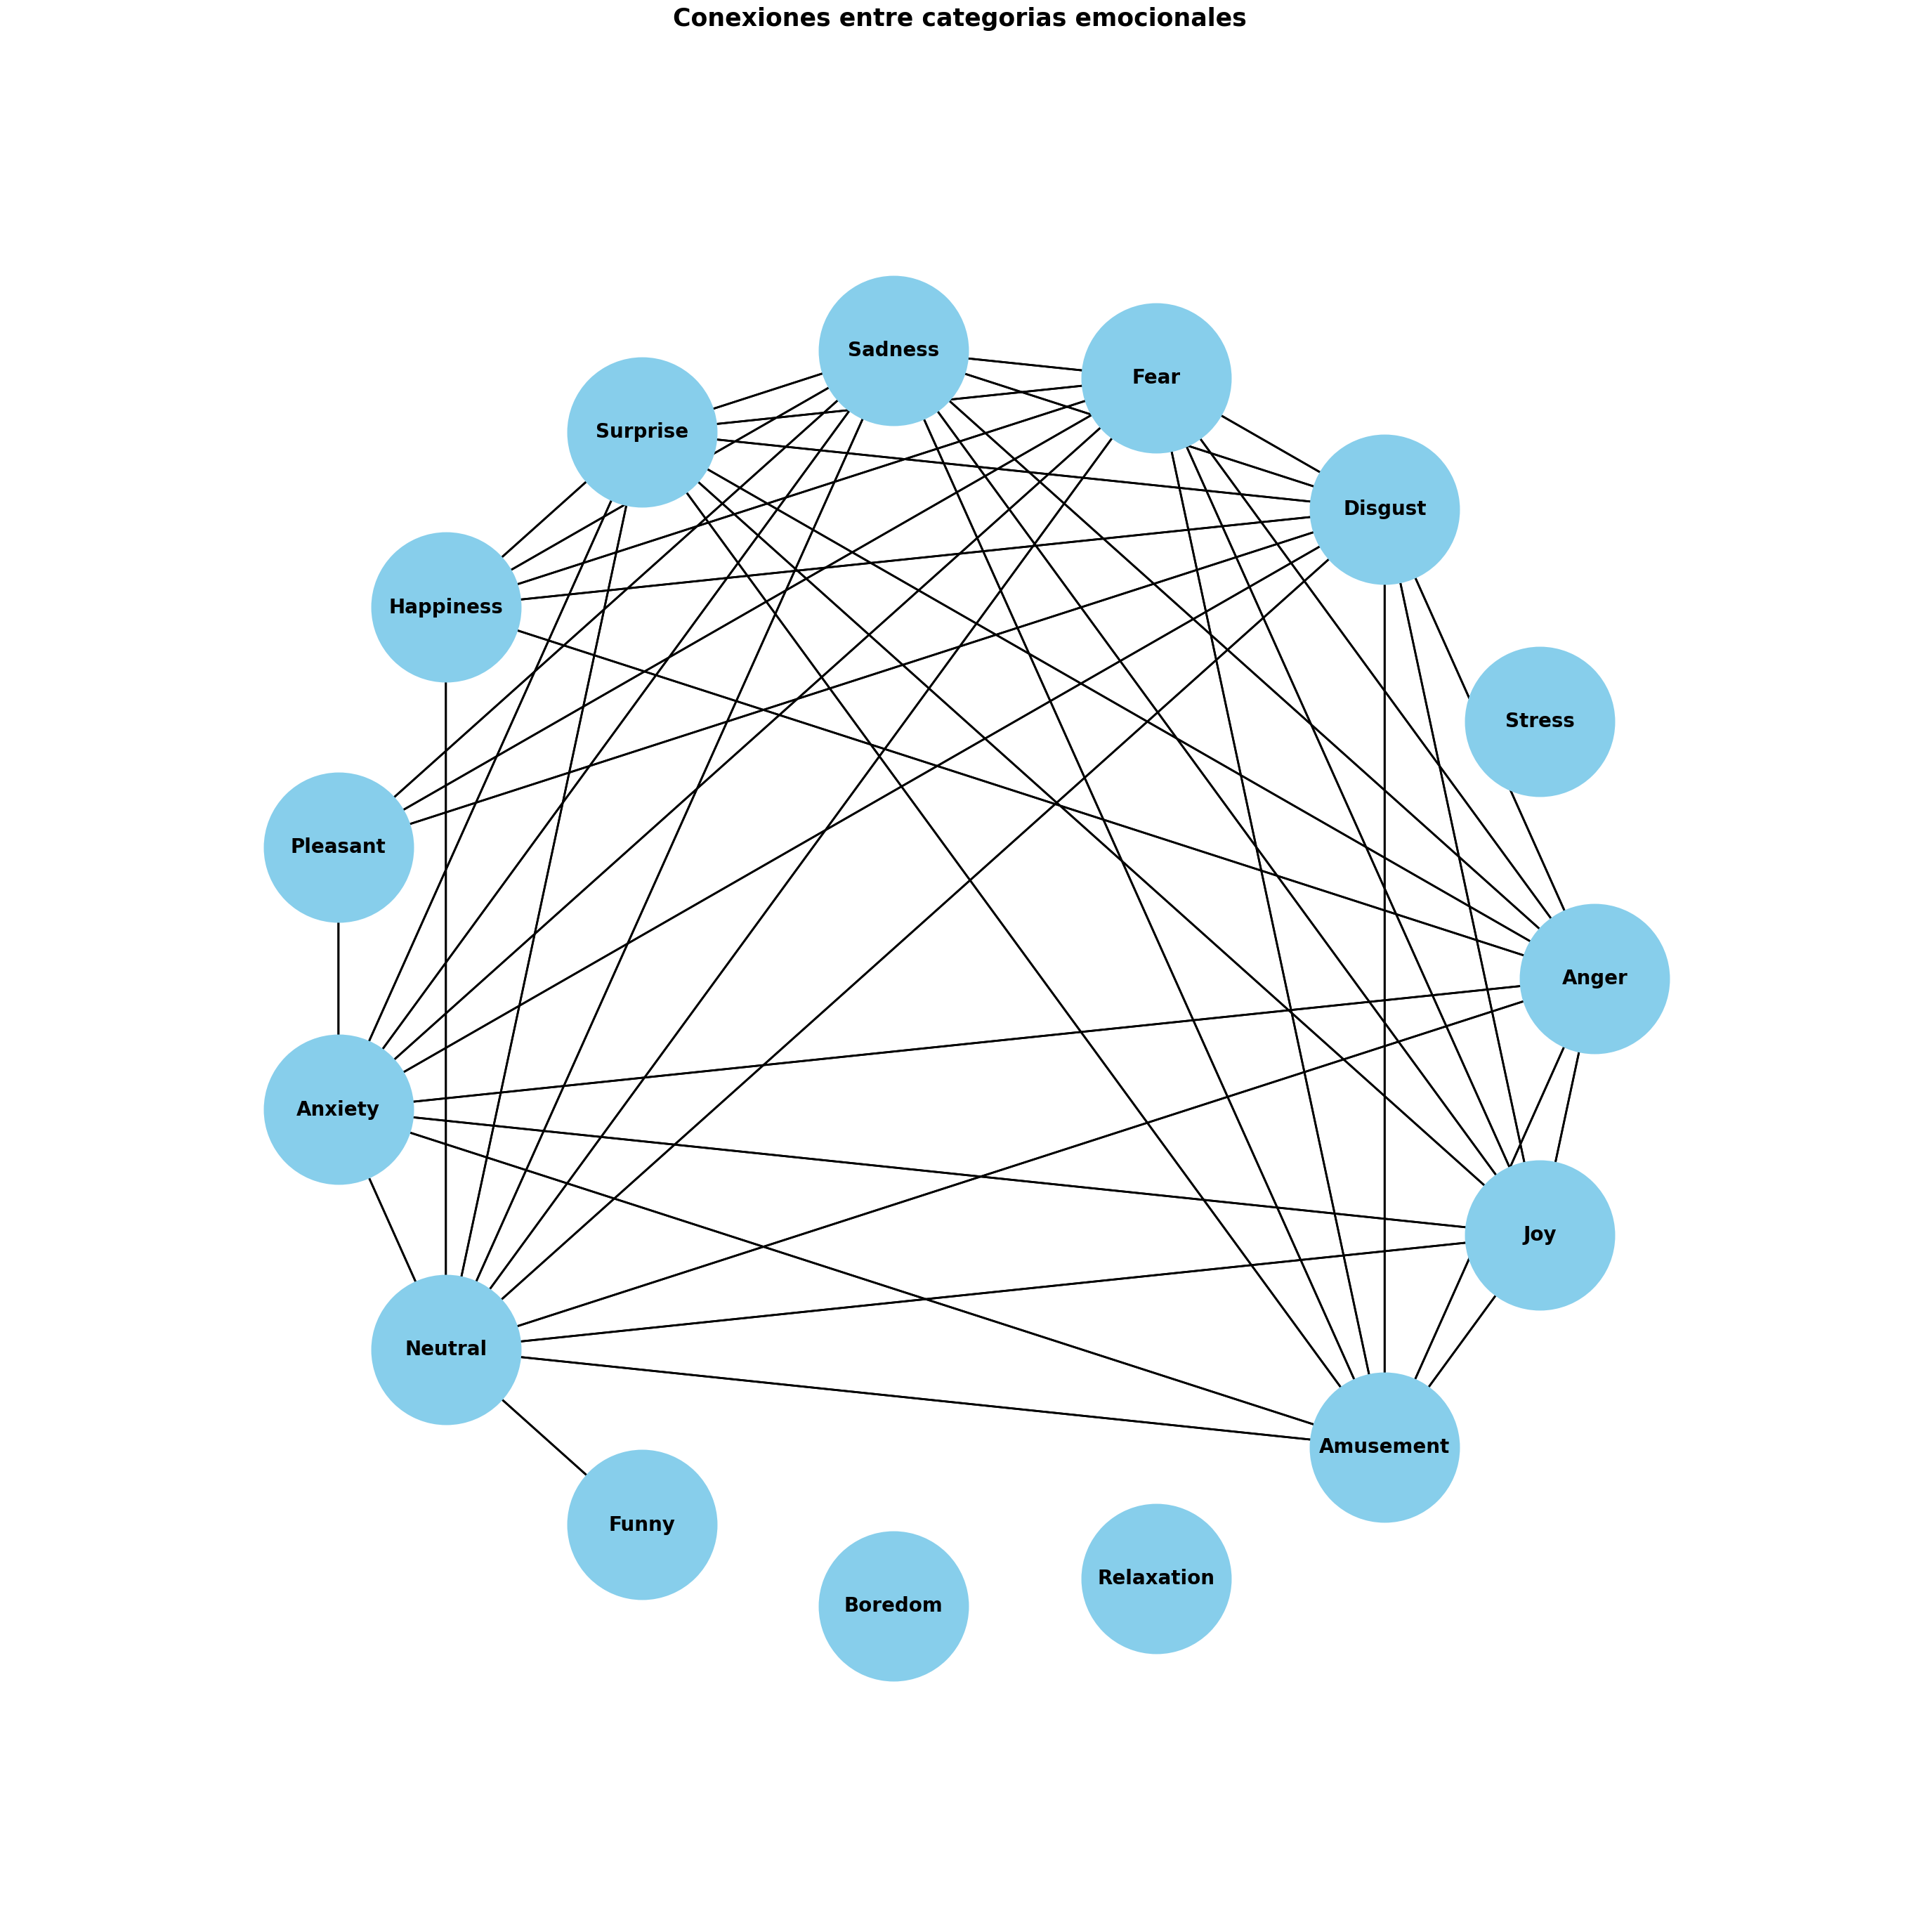

In [53]:
G = nx.DiGraph(adj_matrix)

fig, ax = plt.subplots(figsize=(35, 35))

plt.title('Conexiones entre categorias emocionales', fontdict = {'fontsize' : 25})

g = nx.draw_circular(G, 
        with_labels=True,
        node_size=13000,
        node_color="skyblue",
        linewidths=40,
        font_size=20,
        font_color="black",
        font_weight="bold",
        width=2)
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre categorias emocionales.png')

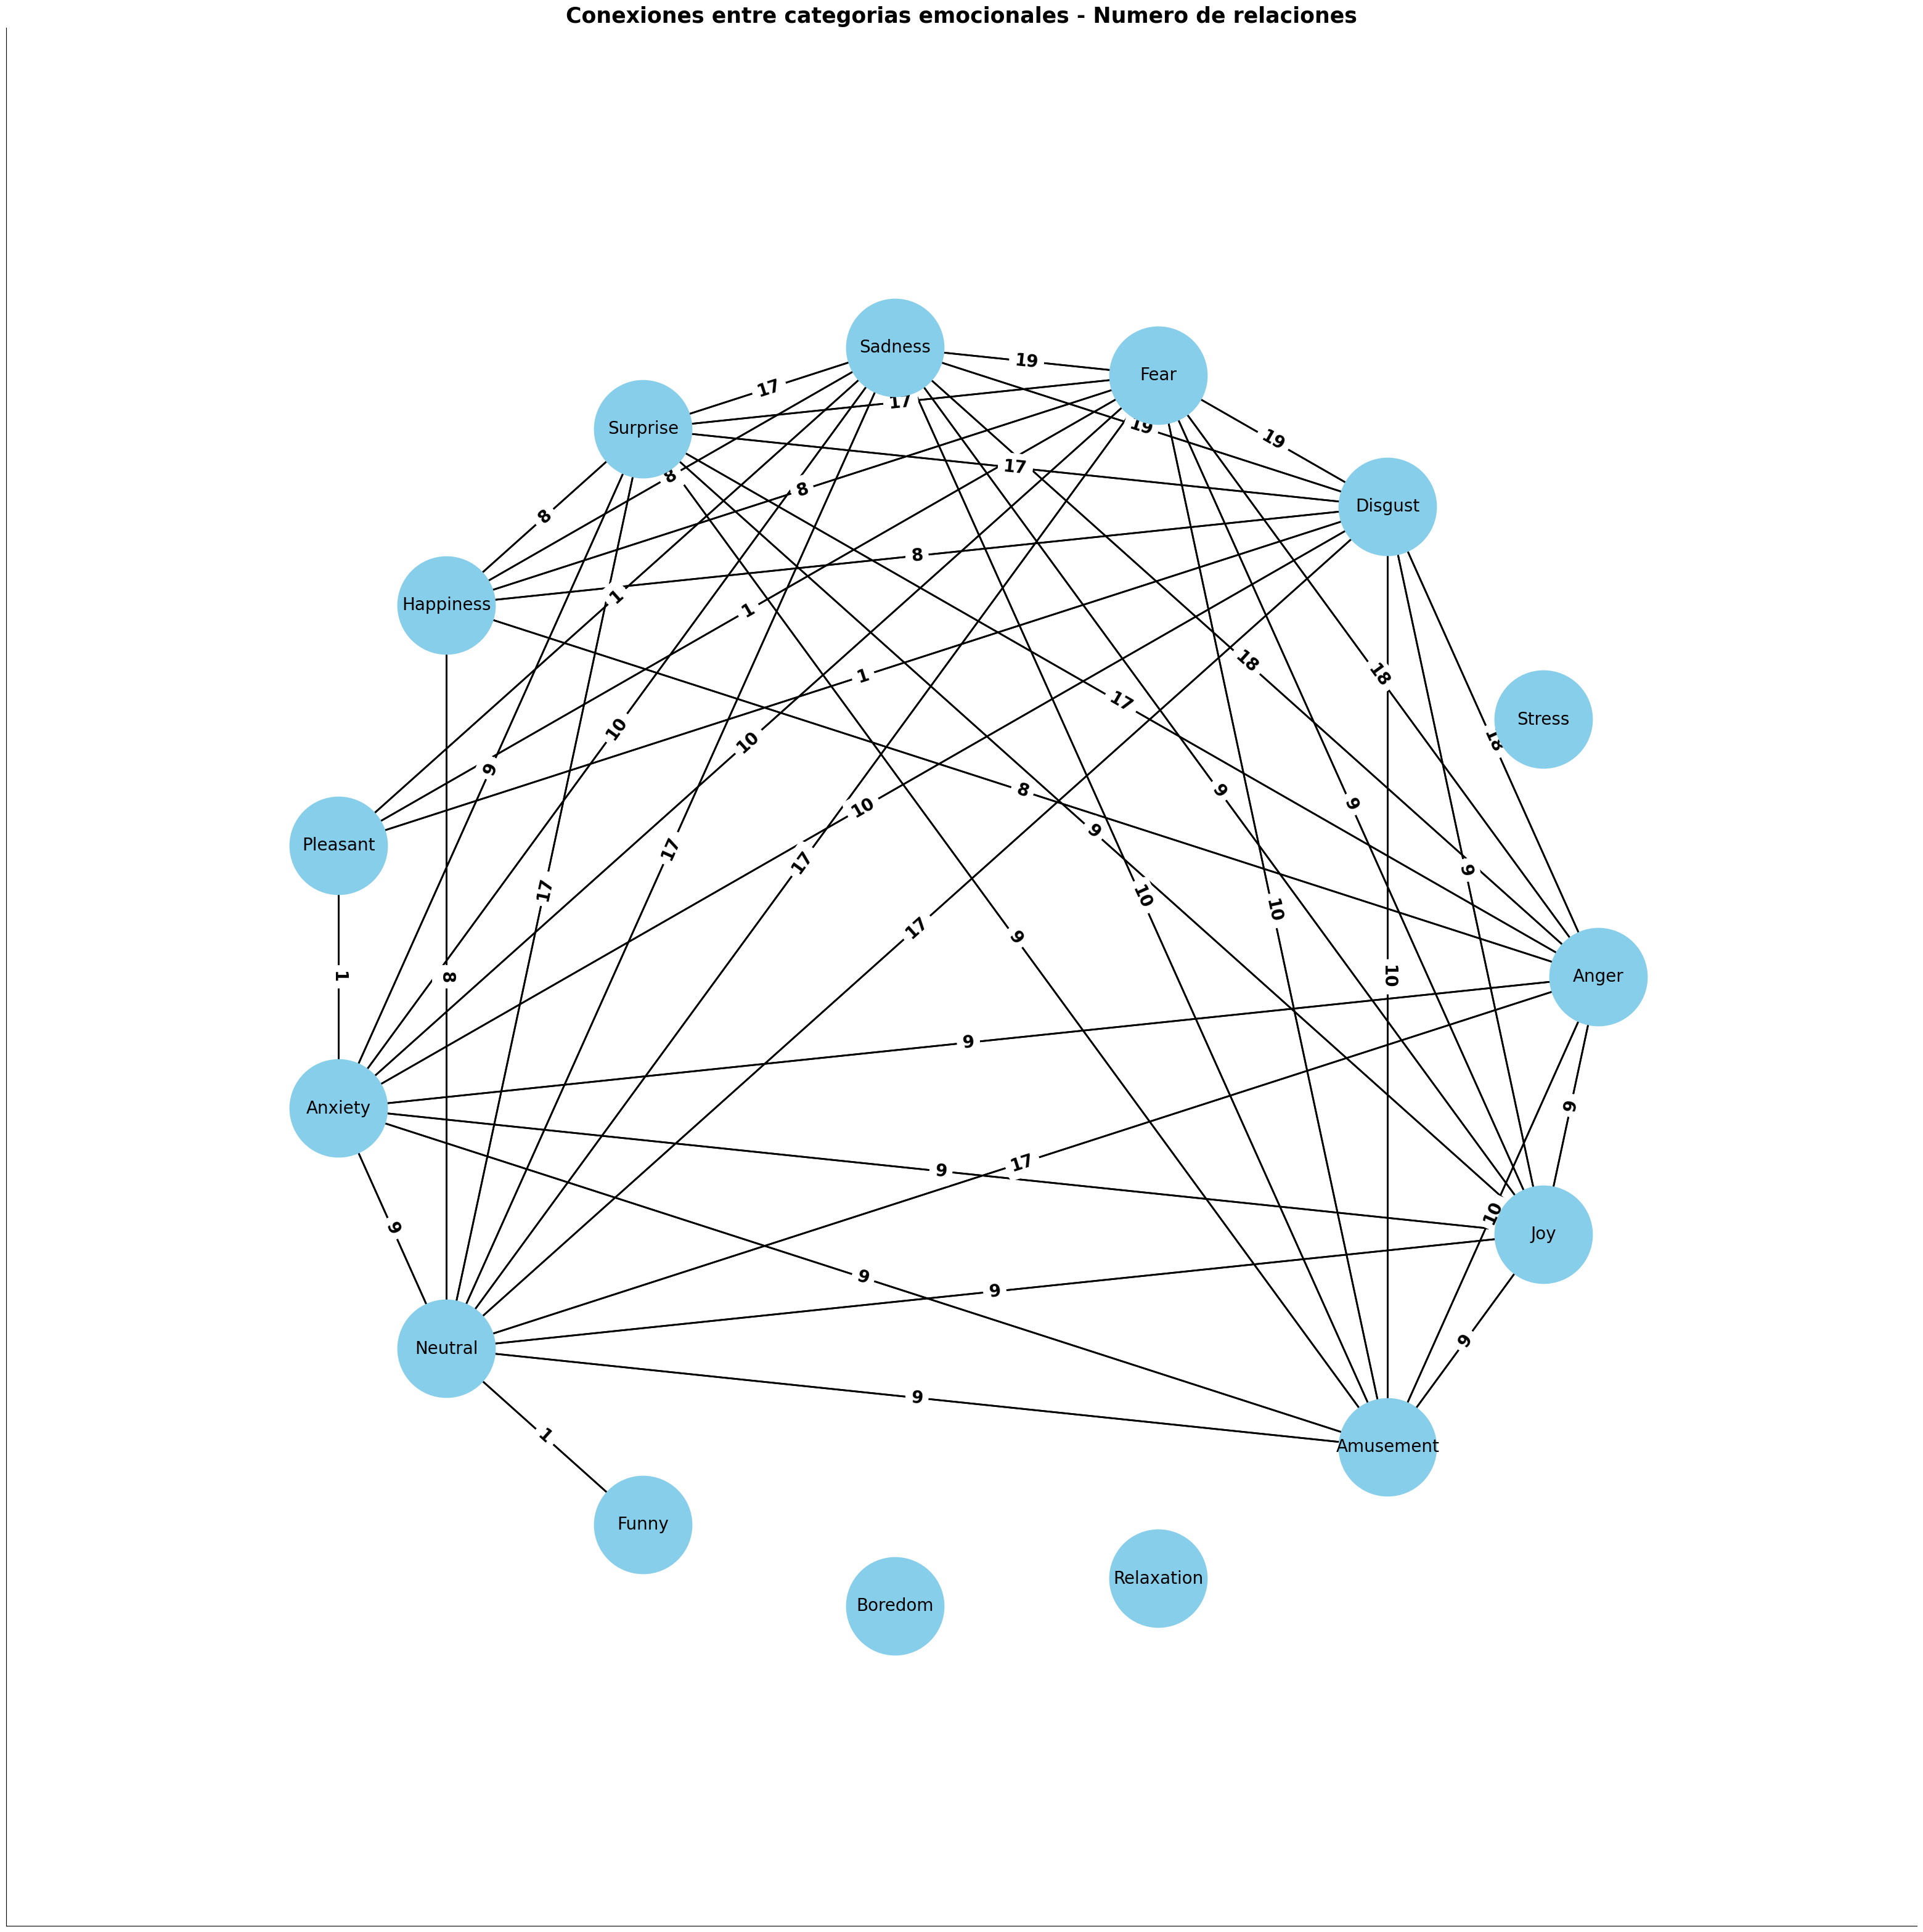

In [54]:
G.number_of_edges()

fig, ax = plt.subplots(figsize=(40, 40))

pos=nx.circular_layout(G)
weights=[wt for u, v, wt in G.edges(data="weight")]

plt.title('Conexiones entre categorias emocionales - Numero de relaciones', fontdict = {'fontsize' : 25})

nx.draw_networkx(G,pos,
        width=2,
        arrows=False,
        node_size=13000,
        node_color="skyblue",
        font_size=20)

labels=nx.get_edge_attributes(G, "weight") # entiendo que esto te permite poner la cantidad de frecuencia de cada relación con una etiqueta

nx.draw_networkx_edge_labels(G,pos,
        edge_labels=labels,
        font_size=20,
        font_color="black",
        font_weight="bold")

plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre categorias emocionales - Numero de relaciones.png')

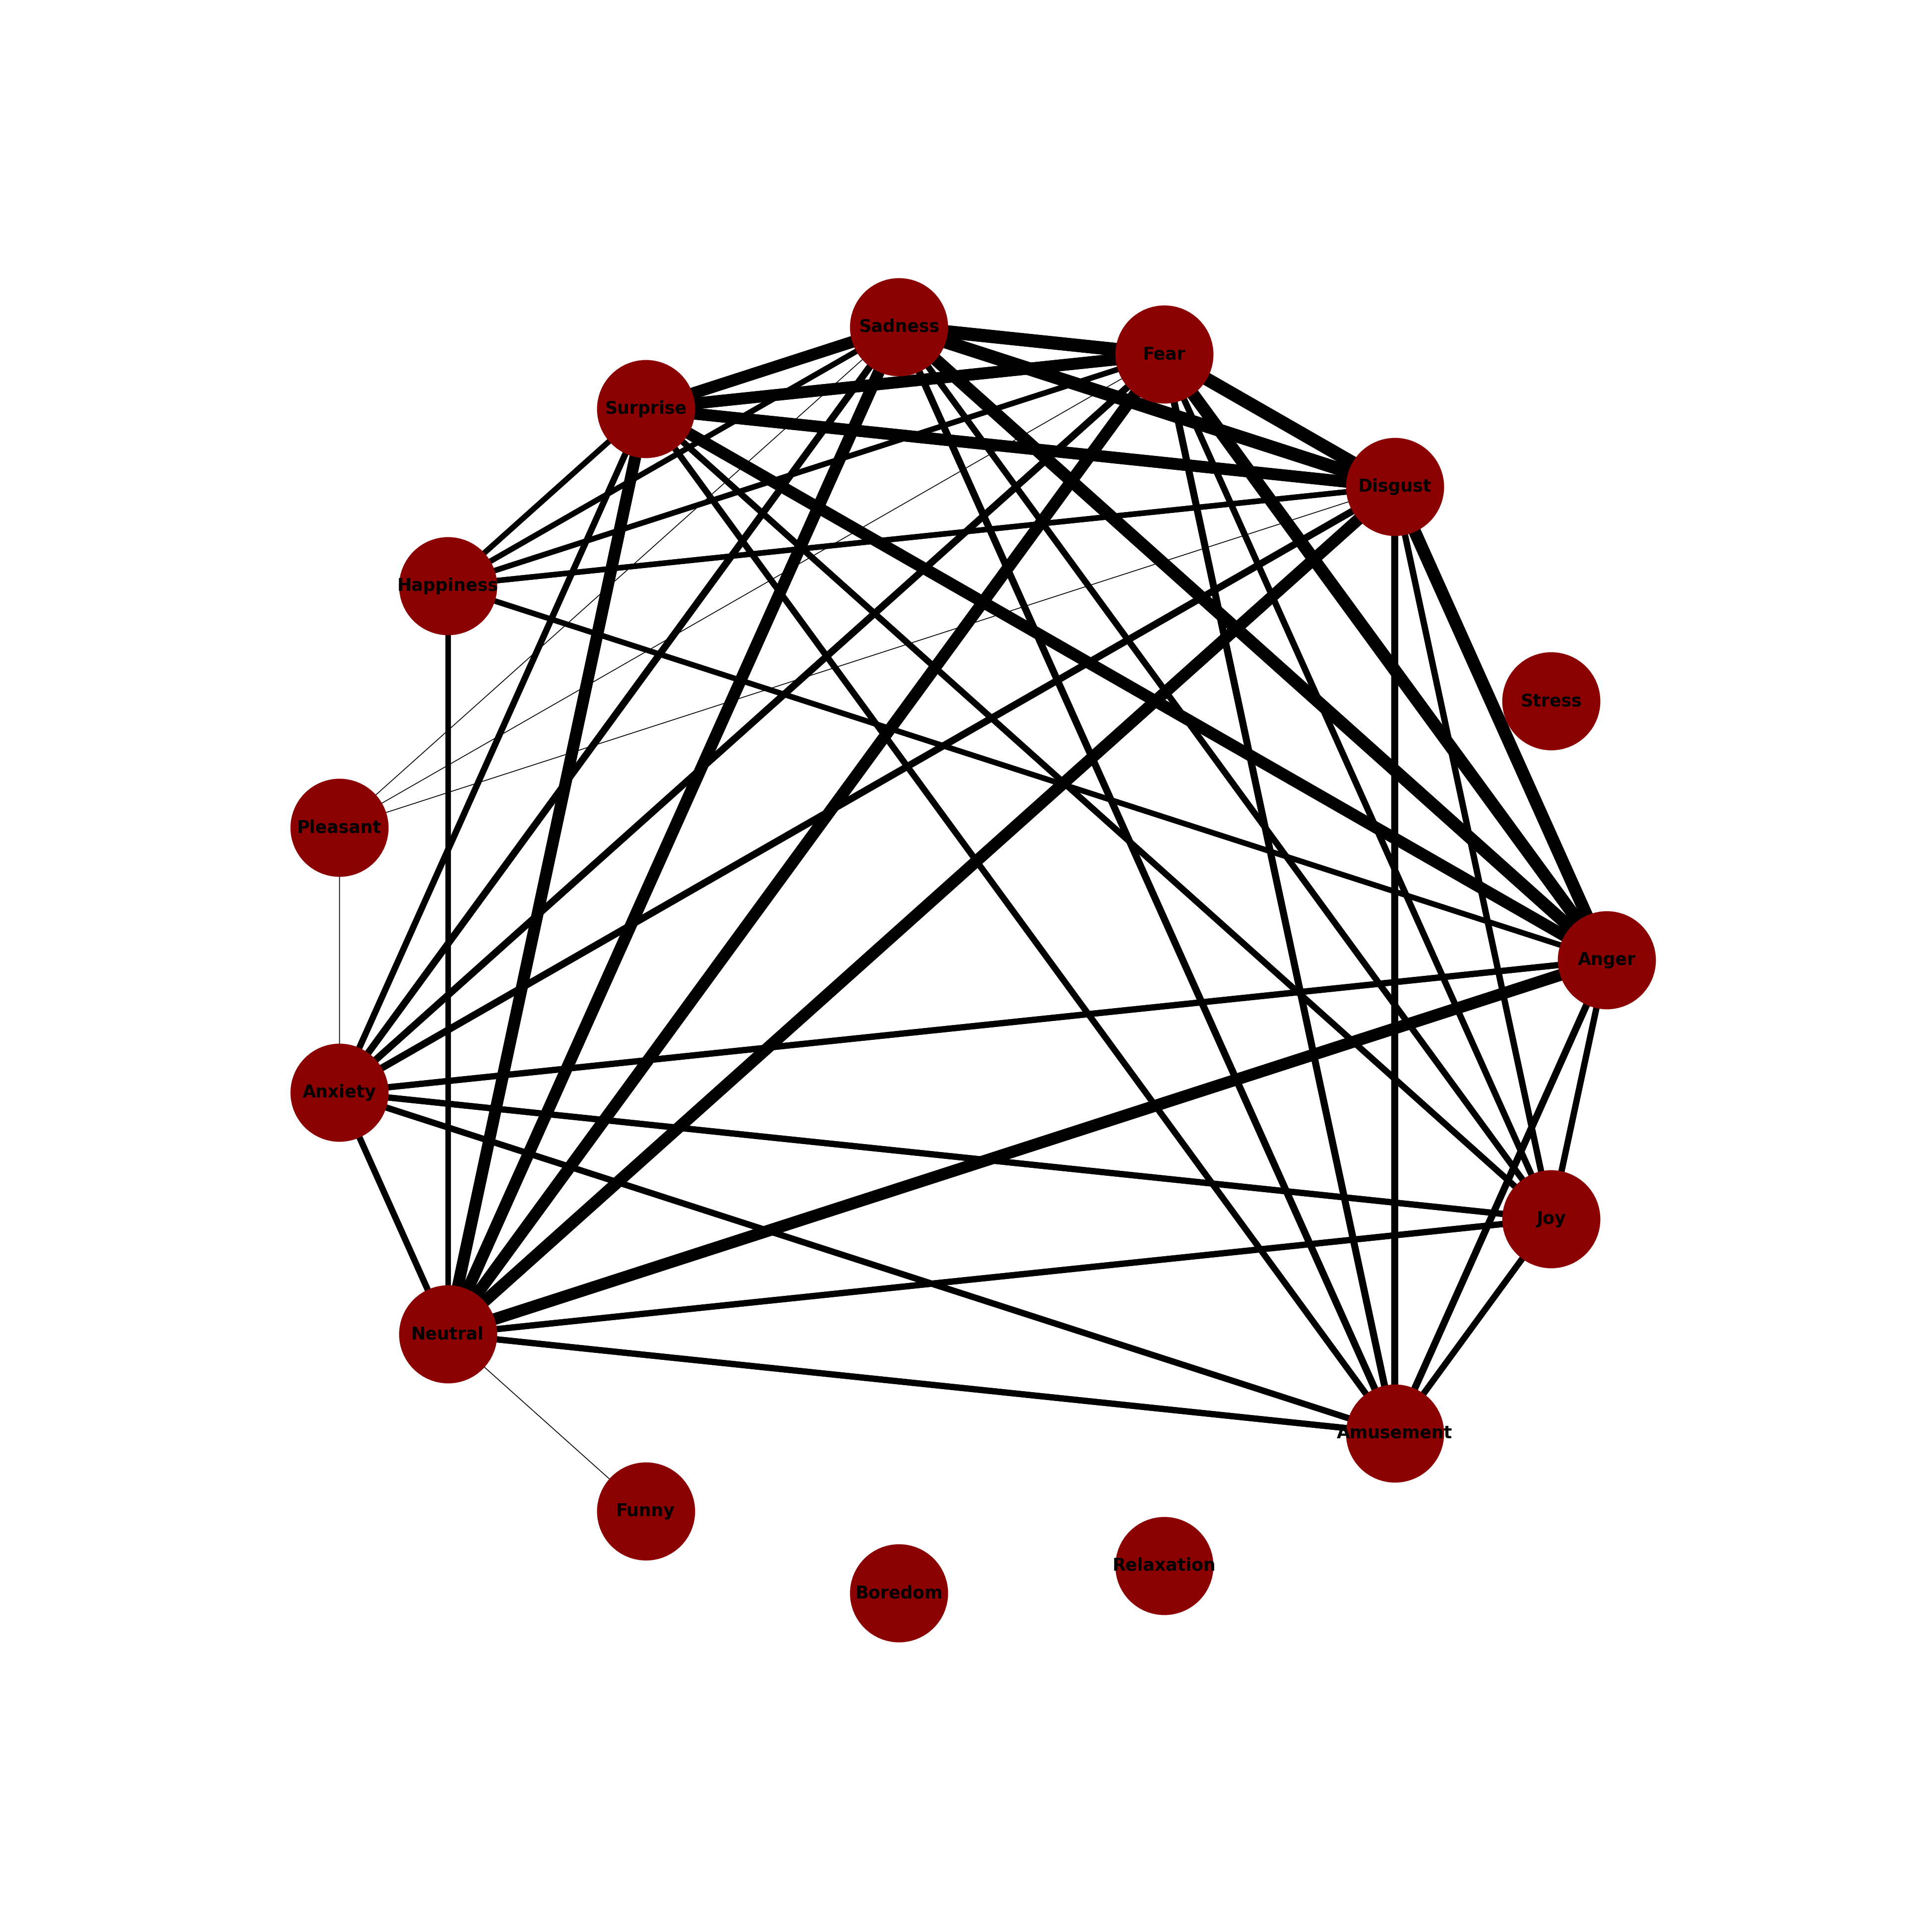

In [55]:
weights = nx.get_edge_attributes(G,'weight').values()

fig, ax = plt.subplots(figsize=(50, 50))

pos = nx.circular_layout(G)

"""plt.title('Conexiones entre categorias emocionales - Grosor segun numero de relaciones', fontdict = {'fontsize' : 25})"""

nx.draw(G, pos, 
        edge_color="black", 
        node_color='darkred',
        width=[i for i in weights],
        with_labels=True,
        node_size=20000,
        alpha=1,
        font_size=25,
        font_weight="bold",
        arrows=False,
        edge_cmap=plt.colormaps['copper'])

plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre categorias emocionales - Grosor segun numero de relaciones.png')

In [56]:
relaciones(weights)

Interacciones con 9 conexiones se observaron 14.0 veces.
Interacciones con 17 conexiones se observaron 9.0 veces.
Interacciones con 10 conexiones se observaron 7.0 veces.
Interacciones con 8 conexiones se observaron 6.0 veces.
Interacciones con 1 conexiones se observaron 5.0 veces.
Interacciones con 18 conexiones se observaron 3.0 veces.
Interacciones con 19 conexiones se observaron 3.0 veces.


Grafo para dimensiones emocionales (no categorias emocionales)

In [57]:
#creacion matrix de adyacencia
df_self_report.fillna('-', inplace= True)
self_dim = df_self_report[df_self_report['is_dimensional']!= '-']

df_matrix_con_paperid_dim = self_dim.groupby(
        ['paper_id','valence', 'arousal', 'dominance', 'like / dislike', 'familiarity', 'engagement', 'predictability']
        ).nth(0)
df_matrix_con_paperid_dim.reset_index(inplace=True)

df_matrix_dim = df_matrix_con_paperid_dim[
        ['valence', 'arousal', 'dominance', 'like / dislike', 'familiarity', 'engagement', 'predictability']
        ]

df_matrix_dim = df_matrix_dim.replace('-', 0)
df_matrix_dim = df_matrix_dim.replace('x', 1)
adj_matrix_dim = df_matrix_dim.T.dot(df_matrix_dim)
np.fill_diagonal(adj_matrix_dim.values, 0)

In [58]:
adj_matrix_dim

valence  arousal  dominance  like / dislike  familiarity  \
valence               0       49         29              20           19   
arousal              49        0         29              20           19   
dominance            29       29          0              17           17   
like / dislike       20       20         17               0           19   
familiarity          19       19         17              19            0   
engagement            2        2          0               2            2   
predictability        9        9          9               0            0   

                engagement  predictability  
valence                  2               9  
arousal                  2               9  
dominance                0               9  
like / dislike           2               0  
familiarity              2               0  
engagement               0               0  
predictability           0               0

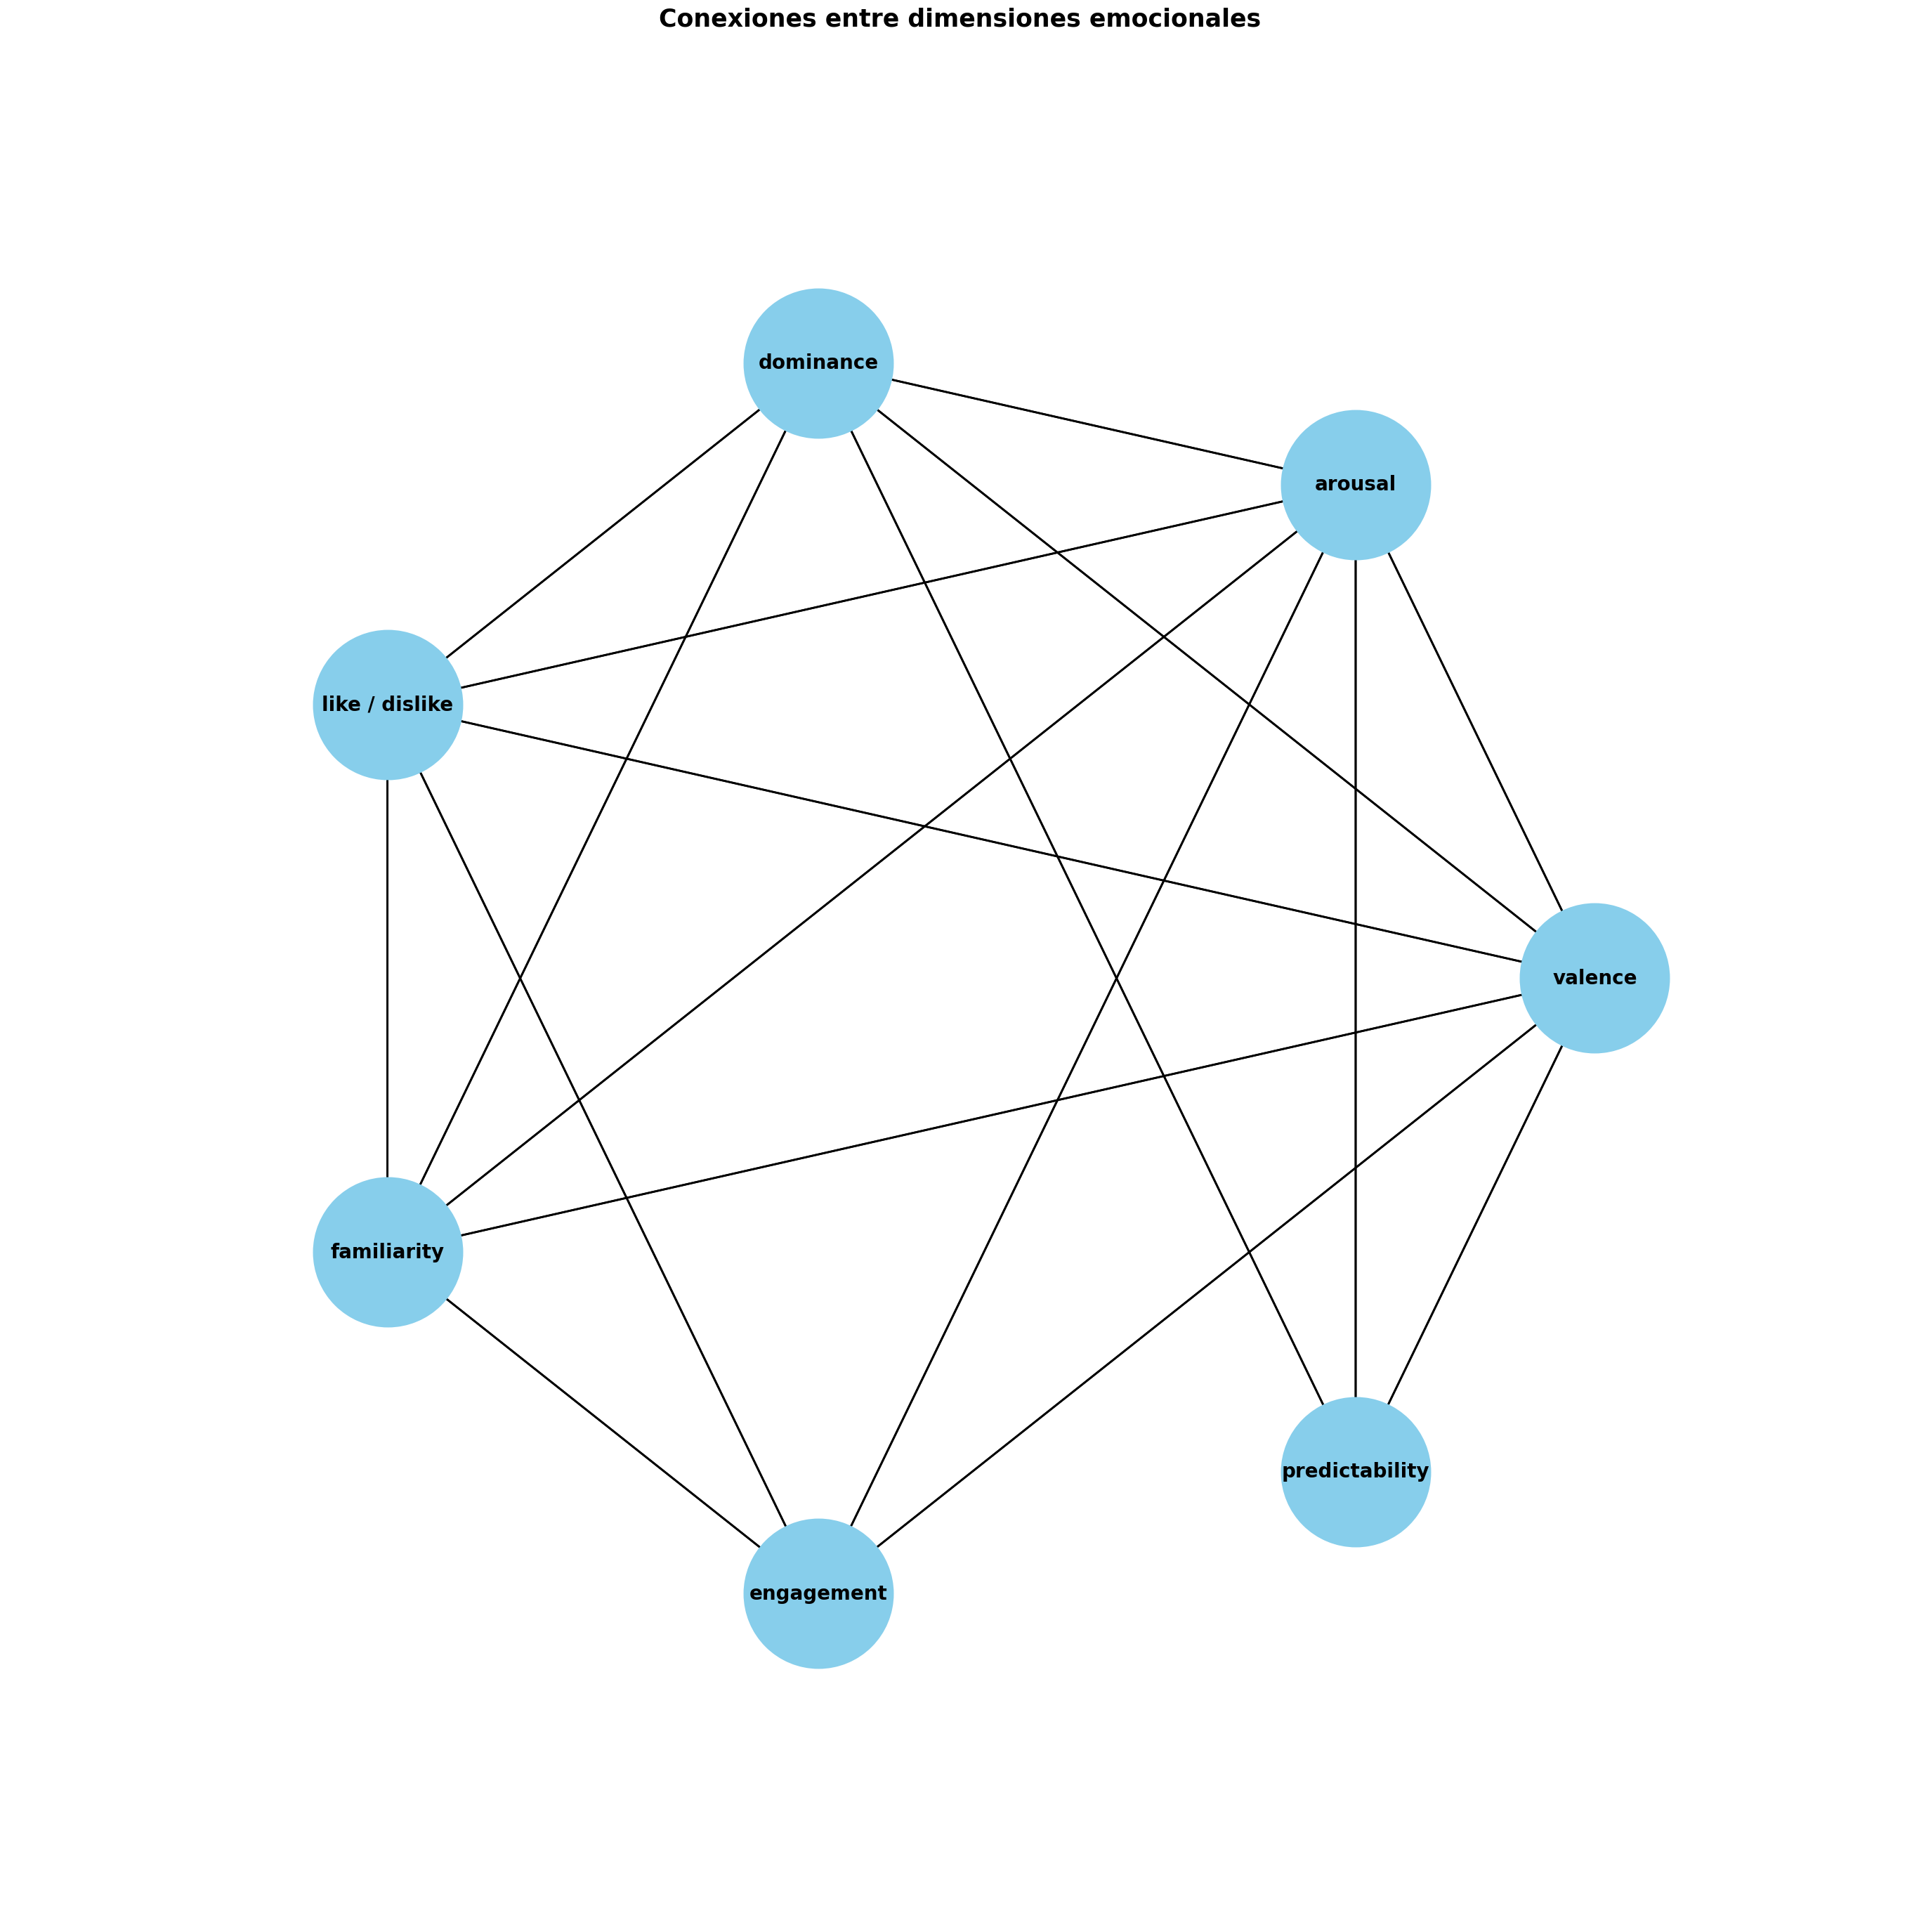

In [59]:
Gd = nx.DiGraph(adj_matrix_dim)

fig, ax = plt.subplots(figsize=(35, 35))

plt.title('Conexiones entre dimensiones emocionales', fontdict = {'fontsize' : 25})

nx.draw_circular(Gd, 
        with_labels=True,
        node_size=13000,
        node_color="skyblue",
        linewidths=40,
        font_size=20,
        font_color="black",
        font_weight="bold",
        width=2)

plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre dimensiones emocionales.png')

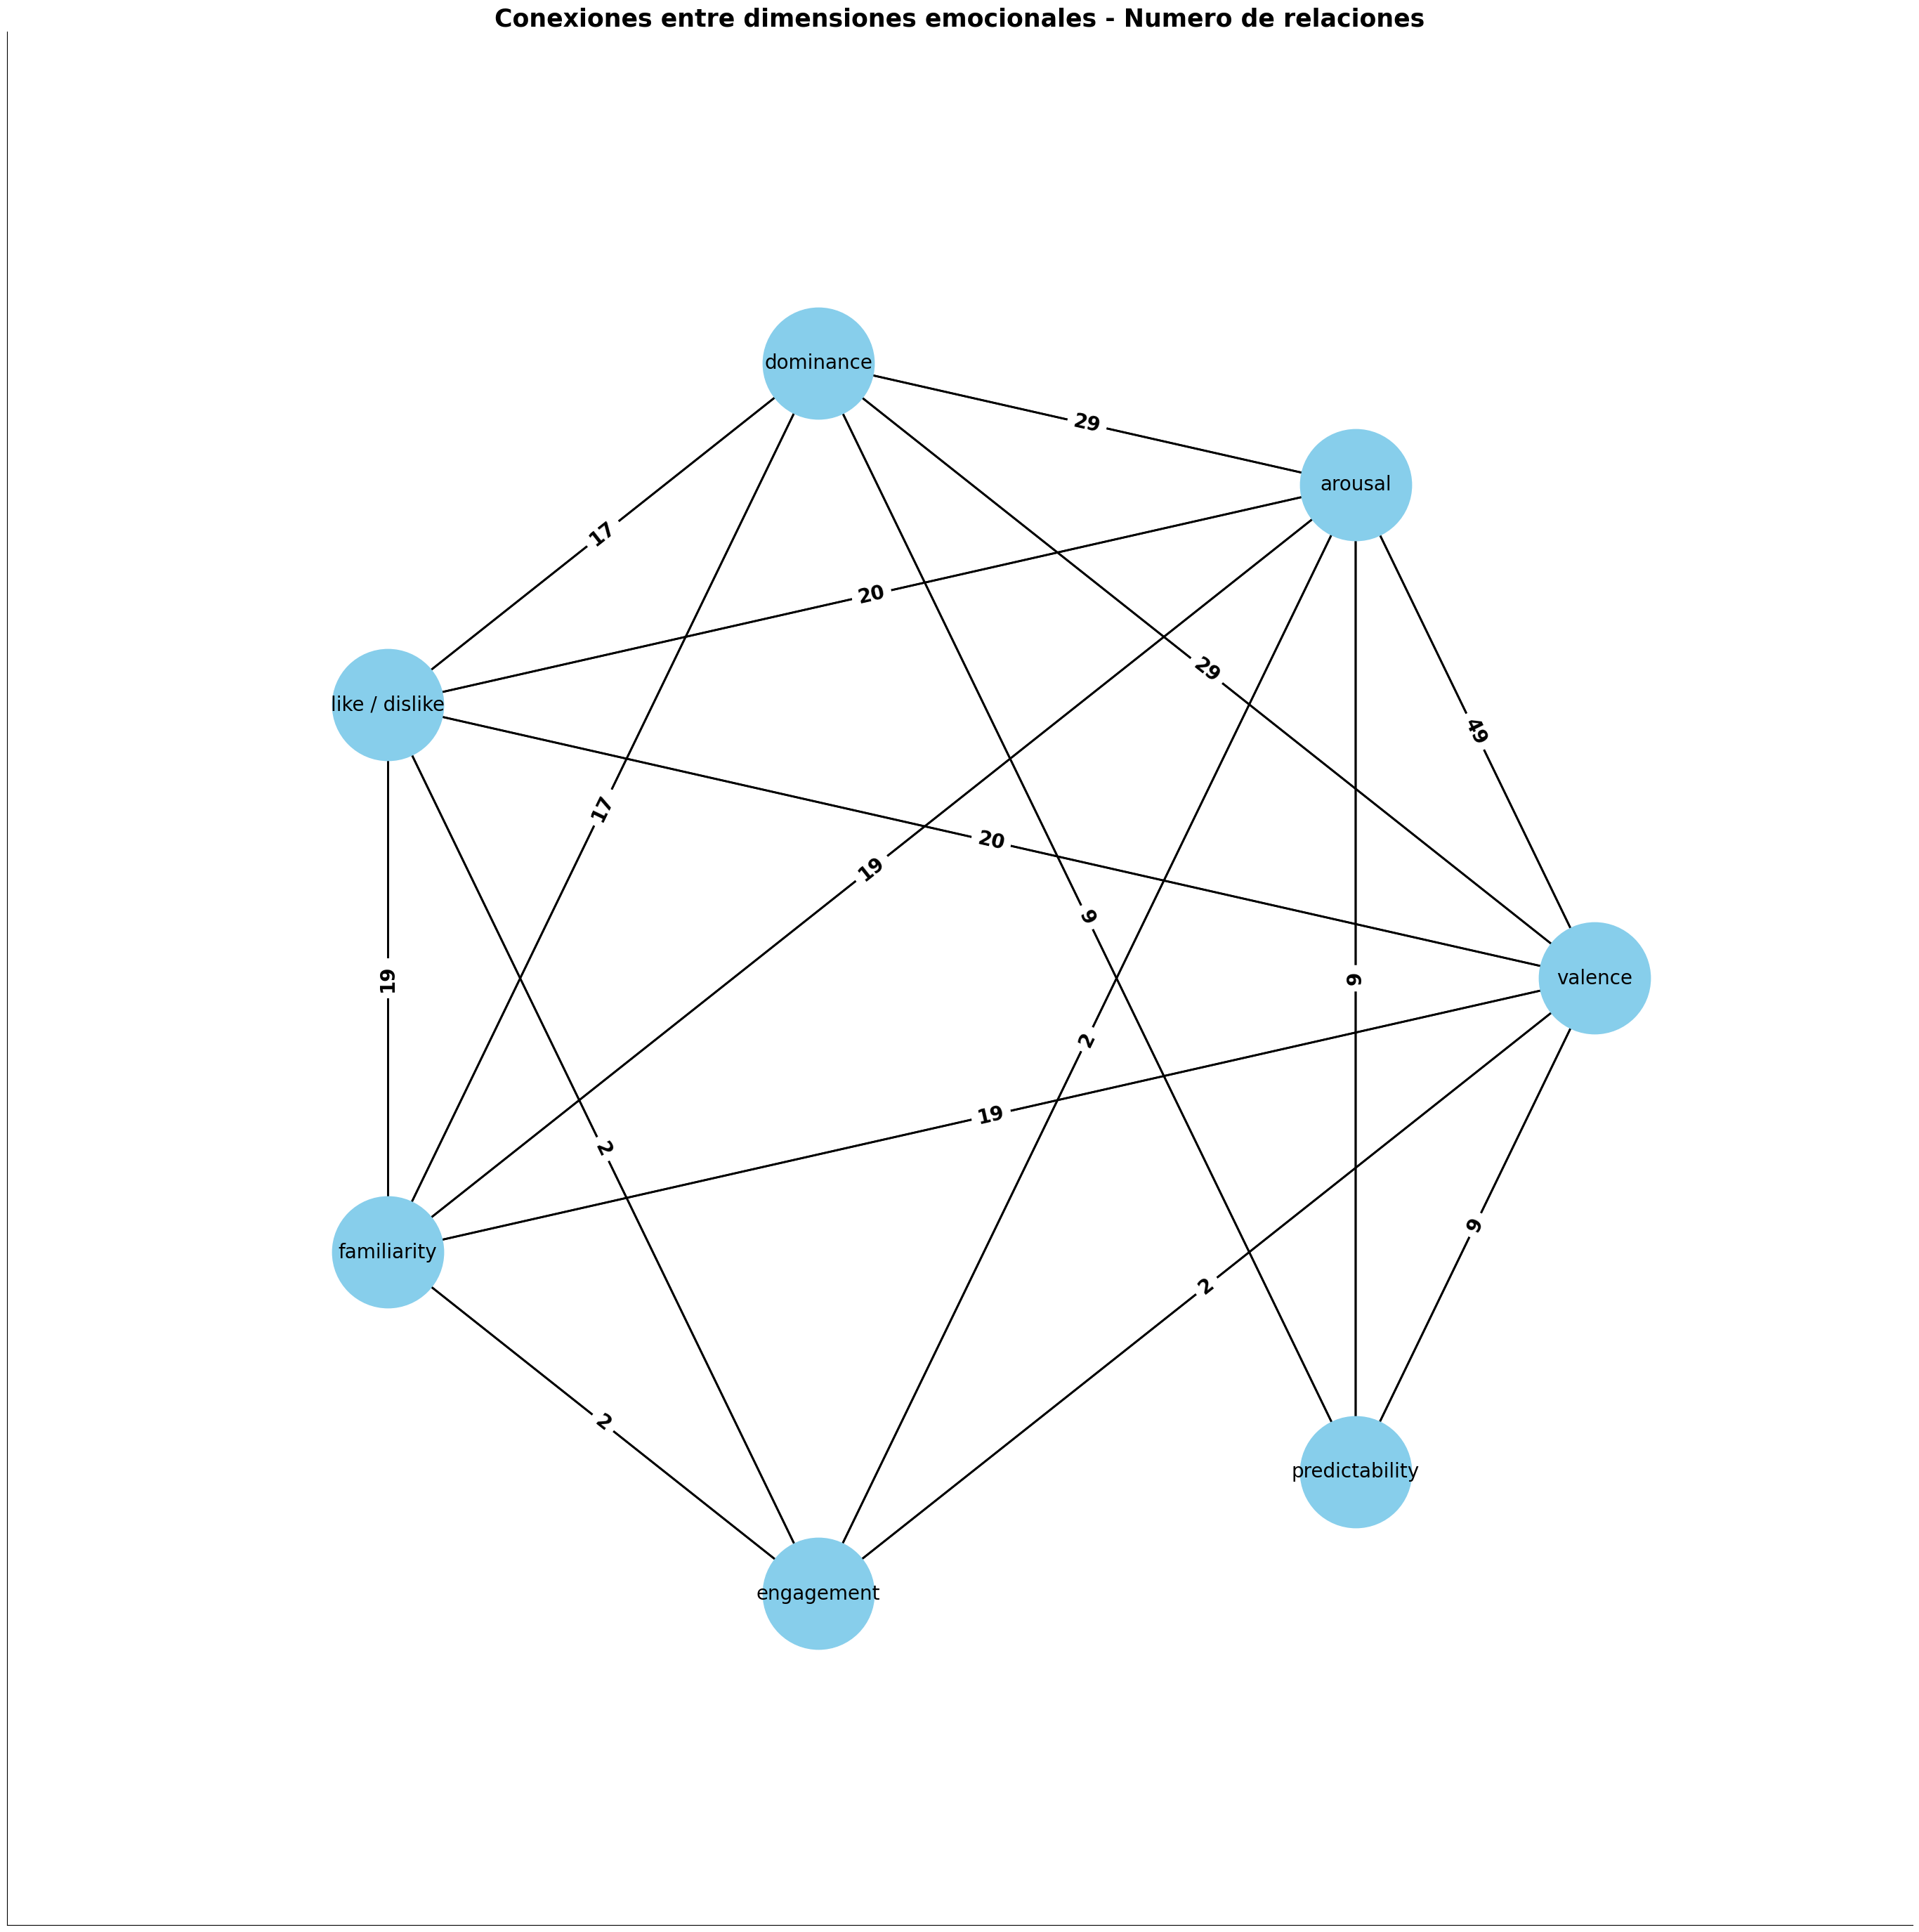

In [60]:
Gd.number_of_edges()

fig, ax = plt.subplots(figsize=(35, 35))

pos=nx.circular_layout(Gd)
weights=[wt for u, v, wt in Gd.edges(data="weight")]

plt.title('Conexiones entre dimensiones emocionales - Numero de relaciones', fontdict = {'fontsize' : 25})

nx.draw_networkx(Gd,pos,
        width=2,
        arrows=False,
        node_size=13000,
        node_color="skyblue",
        font_size=20)

labels=nx.get_edge_attributes(Gd, "weight") # entiendo que esto te permite poner la cantidad de frecuencia de cada relación con una etiqueta

nx.draw_networkx_edge_labels(Gd,pos,
        edge_labels=labels,
        font_size=20,
        font_color="black",
        font_weight="bold")

plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre dimensiones emocionales - Numero de relaciones.png')

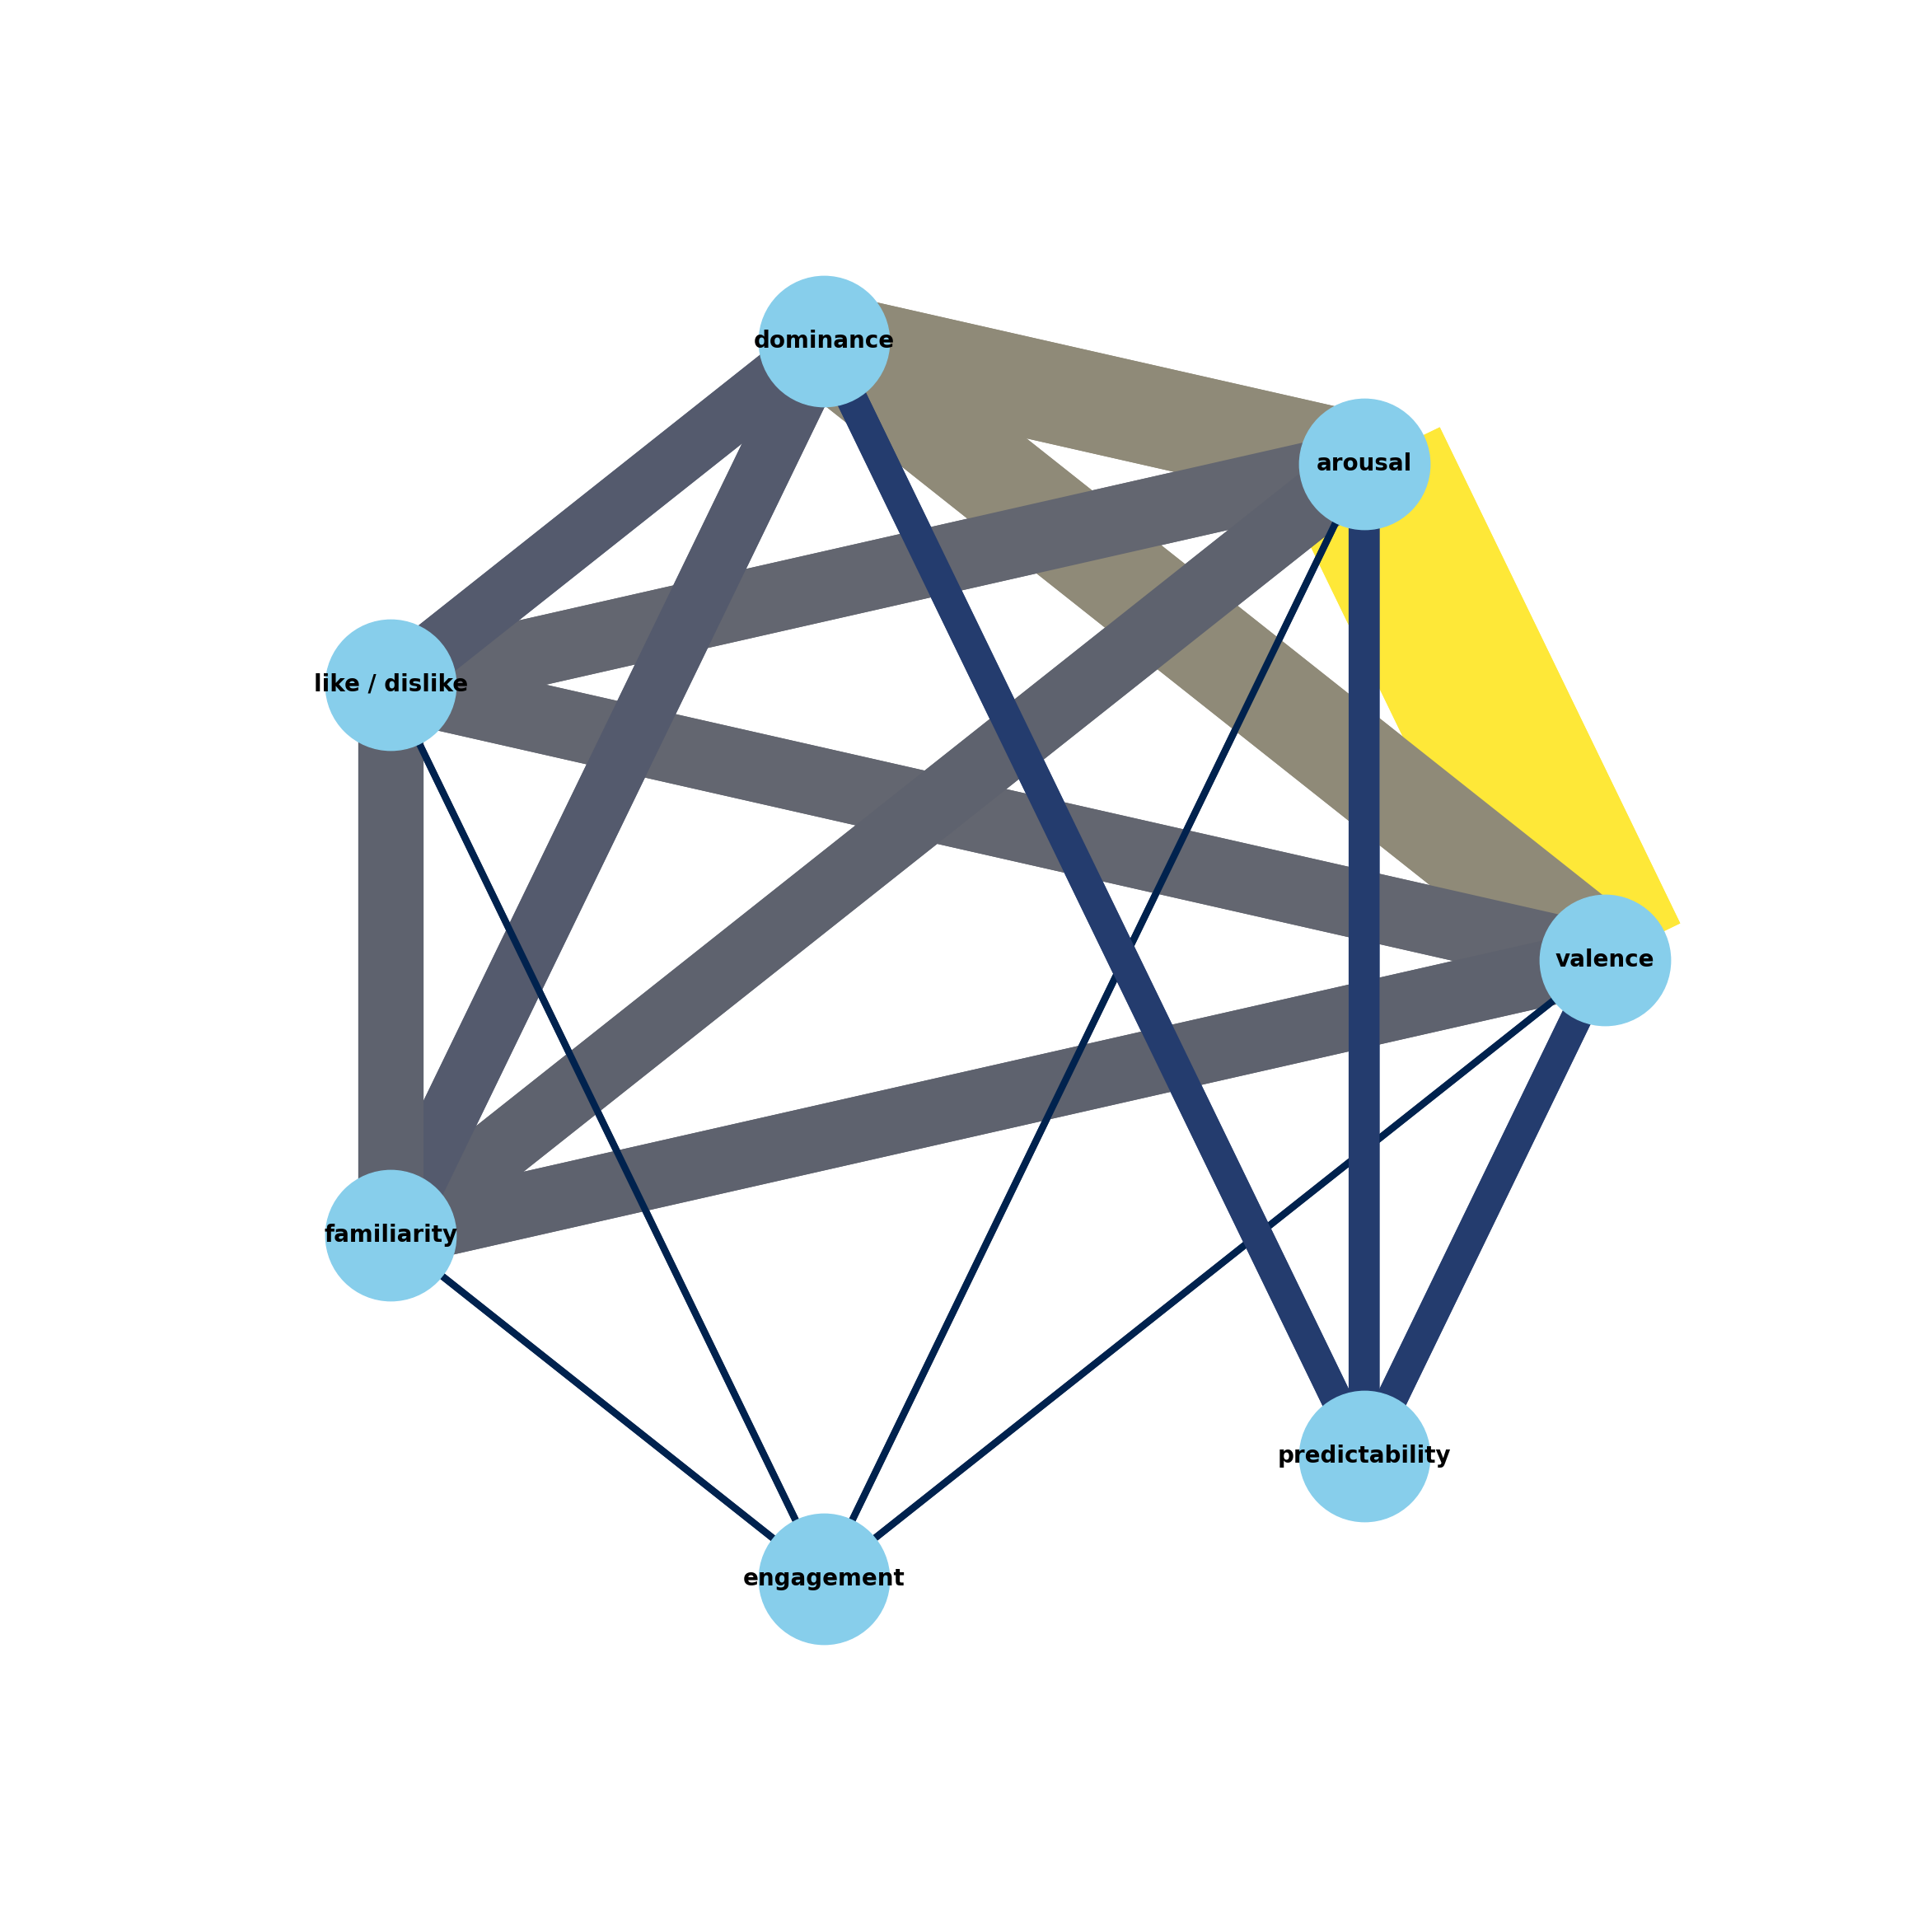

In [61]:

weights = nx.get_edge_attributes(Gd,'weight').values()

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.circular_layout(Gd)

"""plt.title('Conexiones entre dimensiones emocionales - Colores y grosor segun numero de relaciones', fontdict = {'fontsize' : 25})"""

nx.draw(Gd, pos, 
        edge_color=weights, 
        node_color='skyblue',
        width=[i*3 for i in weights],
        with_labels=True,
        node_size=13000,
        alpha=1,
        font_size=20,
        font_weight="bold",
        arrows=False,
        edge_cmap=plt.colormaps['cividis'])

plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Conexiones entre dimensiones emocionales - Colores y grosor segun numero de relaciones.png')

In [62]:
relaciones(weights)

Interacciones con 2 conexiones se observaron 4.0 veces.
Interacciones con 9 conexiones se observaron 3.0 veces.
Interacciones con 19 conexiones se observaron 3.0 veces.
Interacciones con 17 conexiones se observaron 2.0 veces.
Interacciones con 20 conexiones se observaron 2.0 veces.
Interacciones con 29 conexiones se observaron 2.0 veces.
Interacciones con 49 conexiones se observaron 1.0 veces.


### ¿Cual es la frecuencia del uso de modelos algoritmicos de regresion y clasificacion?
3. Gráficos frencuencia de los modelos algoritimicos, según modelos de regresión y clasificación

- Interpretaciones: Los algoritmos clasificadores son por mucho los mas usados, ademas de ser los que mas variedad representan. Que implica esto? Es lo mismo aplicar algoritmos clasificadores o regresores?
- Nota: ordenar los valores de los gráficos y unirlos en uno, buscar graficar los mas usados (primeros 5 o 10) 

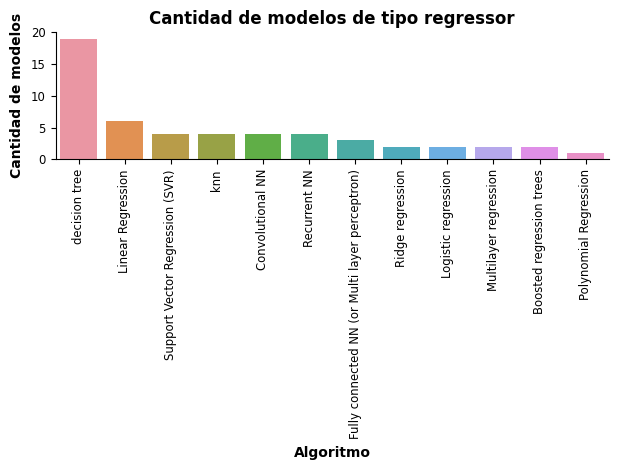

In [63]:
df_statistical_learning_models = df_statistical_learning_models.fillna('-')

#para regressor
df_algoritmos_regre = multi_reversing(df_statistical_learning_models, 'model_id', df_statistical_learning_models.iloc[:,43:57])
df_algoritmos_regre['variable'] = df_algoritmos_regre['variable'].str.replace('regre_','')

titulos = ['Cantidad de modelos de tipo regressor', 'Algoritmo', 'Cantidad de modelos']
bar_plot('variable',df_algoritmos_regre,titulos)

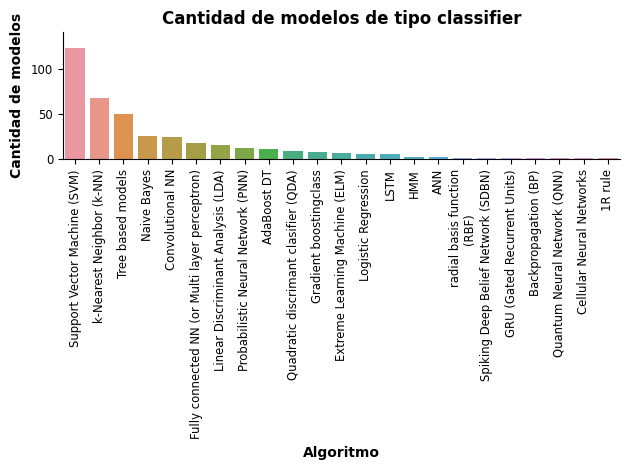

In [64]:
#para classifier

df_algoritmos_class = multi_reversing(df_statistical_learning_models, 'model_id', df_statistical_learning_models.iloc[:,8:40])
df_algoritmos_class['variable'] = df_algoritmos_class['variable'].str.replace('class_','')

#Lista de algoritmos unicos de clasificacion
algoritmos_de_clasificacion = df_algoritmos_class["variable"].unique()
#print(algoritmos_de_clasificacion)

titulos = ['Cantidad de modelos de tipo classifier', 'Algoritmo', 'Cantidad de modelos']
bar_plot('variable',df_algoritmos_class,titulos)

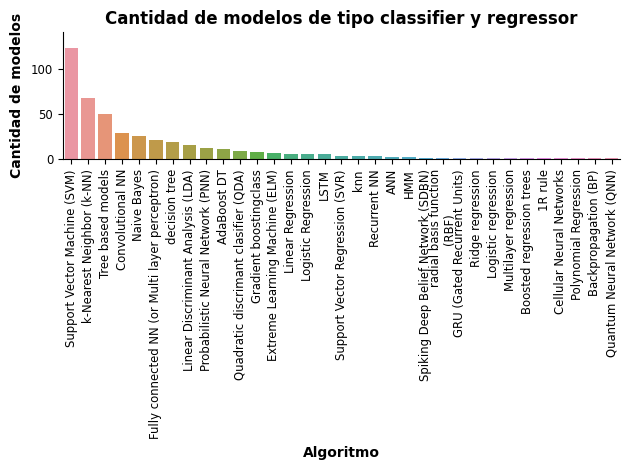

In [65]:
df_all_models = df_statistical_learning_models.iloc[:,1:57]
df_all_models.drop(df_all_models.columns[[1,2,3,4,5,6,39,40,41]], axis=1, inplace=True)

df_all_models = multi_reversing(df_all_models, 'model_id', df_all_models.iloc[:,1:])
df_all_models['variable'] = df_all_models['variable'].str.replace('class_','')
df_all_models['variable'] = df_all_models['variable'].str.replace('regre_','')

titulos = ['Cantidad de modelos de tipo classifier y regressor', 'Algoritmo', 'Cantidad de modelos']
bar_plot('variable',df_all_models,titulos)

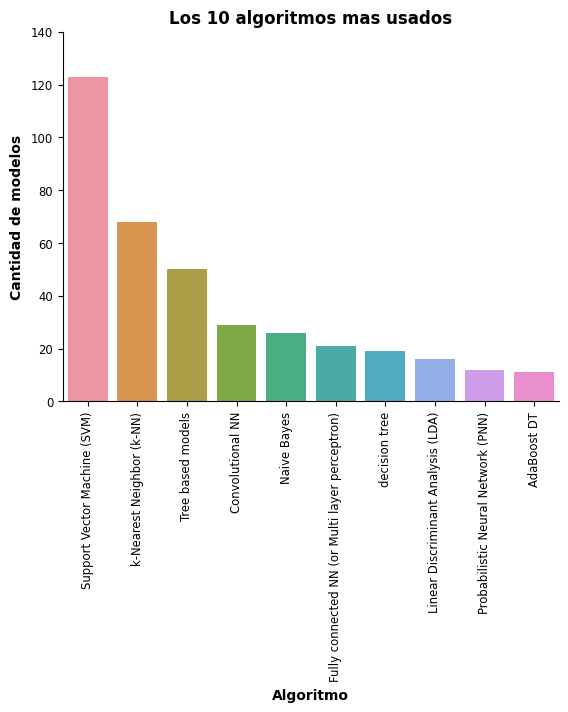

In [66]:
vc = df_all_models['variable'].value_counts()
vc = vc.iloc[:10]
df_dv = vc.to_frame()
df_dv = df_dv.reset_index()
df_dv.rename(columns = {'index':'algoritmo', 'variable':'cantidad'}, inplace = True)

titulos = ['Los 10 algoritmos mas usados', 'Algoritmo', 'Cantidad de modelos']
g = sns.barplot(data=df_dv, x='algoritmo', y='cantidad')
g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
plt.xticks(rotation=90)
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Los 10 algoritmos mas usados.png')

In [67]:
"""df_class_or_regre['variable'] = df_class_or_regre['variable'].str.replace('is_','')
df_class_or_regre["variable"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'"""

'df_class_or_regre[\'variable\'] = df_class_or_regre[\'variable\'].str.replace(\'is_\',\'\')\ndf_class_or_regre["variable"].value_counts(normalize=True).mul(100).round(1).astype(str) + \'%\''

In [68]:
"""#pie plot
quantity = df_class_or_regre['variable'].value_counts()
df_class_or_regre_quantity = pd.DataFrame(quantity)

names = 'Classifier', 'Regressor'
plt.pie(df_class_or_regre_quantity['variable'], labels = names, labeldistance = 1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Proporcion uso de modelos de regresion y clasificacion.png')"""

"#pie plot\nquantity = df_class_or_regre['variable'].value_counts()\ndf_class_or_regre_quantity = pd.DataFrame(quantity)\n\nnames = 'Classifier', 'Regressor'\nplt.pie(df_class_or_regre_quantity['variable'], labels = names, labeldistance = 1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })\nplt.savefig('.\\Emmanuel\\figures\\NUEVOS. Proporcion uso de modelos de regresion y clasificacion.png')"

### ¿Cual es la evolucion temporal (2010-2020) del uso de las bases de datos privadas y publicas?
5. Gráfico de barra por año (2010-2020) según tipos de base de datos (privada, pública)

In [69]:
df_data_type = df_data_type.fillna('-')
df_data_type = df_data_type.groupby(['paper_id', 'db_access']).nth(0)
df_data_type.reset_index(inplace=True)

In [70]:
df_data_type

paper_id   db_access  model_id  \
0          1  restricted         1   
1          2  restricted         2   
2          3        open         3   
3          4        open         5   
4          5  restricted        10   
..       ...         ...       ...   
95        95        open       481   
96        96  restricted       491   
97        97        open       492   
98        98        open       494   
99        99  restricted       498   

                                         apa_citation  year public_database  \
0   Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...  2017               -   
1   Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...  2016               -   
2   Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...  2018               -   
3   Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....  2018               -   
4   Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....  2016               -   
..                                                ...   ...             ...   
95  Yang, H. C., & Lee, C. C. (2019, September). A...  2020               -   
96  Kołodziej, M., Tarnowski, P., Majkowski, A., &...  2020               -   
97  Ganapathy, N., & Swaminathan, R. (2019). Emoti...  2020               -   
98  Subramanian, R., Wache, J., Abadi, M. K., Vier...  2018               -   
99  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...  2019               -   

   use_multiple_db db_private db_public db_private_and_public  ...  \
0                -          x         -                     -  ...   
1                -          x         -                     -  ...   
2                -          -         -                     -  ...   
3                -          -         -                     -  ...   
4                -          x         -                     -  ...   
..             ...        ...       ...                   ...  ...   
95               -          -         -                     -  ...   
96               -          x         -                     -  ...   
97               -          -         -                     -  ...   
98               -          -         -                     -  ...   
99               -          x         -                     -  ...   

   SenseEmotion PMEmo AFEW Hazumi1911 Bio Vid Emo DB RCDAT DREAMER  \
0             -     -    -          -              -     -       -   
1             -     -    -          -              -     -       -   
2             -     -    -          -              -     -       -   
3             -     -    -          -              -     -       -   
4             -     -    -          -              -     -       -   
..          ...   ...  ...        ...            ...   ...     ...   
95            -     -    -          -              -     -       -   
96            -     -    -          -              -     -       -   
97            -     -    -          -              -     -       -   
98            -     -    -          -              -     -       -   
99            -     -    -          -              -     -       -   

   Non-EEG Biosignals Data Set for Assessment and Visualization of Neurological Status  \
0                                                   -                                    
1                                                   -                                    
2                                                   -                                    
3                                                   -                                    
4                                                   -                                    
..                                                ...                                    
95                                                  -                                    
96                                                  -                                    
97                                                  -                                    
98              

In [71]:
df_data_type["db_access"] = df_data_type["db_access"].str.capitalize()
df_data_type = df_data_type.rename(columns={"db_access":"Access"})

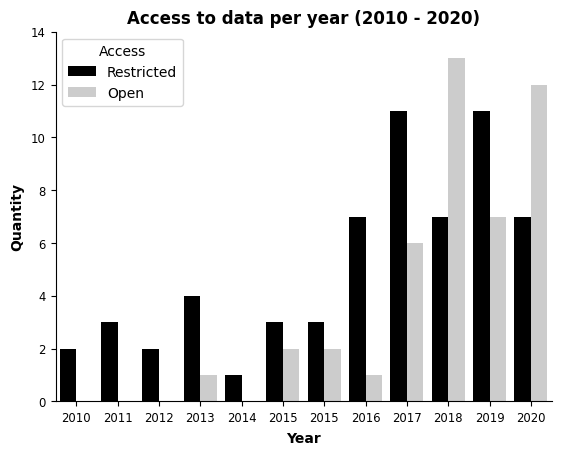

In [72]:
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g = sns.countplot(x='year', 
    data= df_data_type, 
    hue='Access', 
    order=category_order)
g.set(title = 'Access to data per year (2010 - 2020)', xlabel = 'Year', ylabel = 'Quantity')
plt.savefig('.\\Emmanuel\\figures\\NUEVOS. Frecuencia de uso de bases de datos públicas y privadas por año (2010 - 2020).png')

In [73]:
df_data_type["Access"].value_counts()

Restricted    58
Open          42
Name: Access, dtype: int64

In [74]:
df_data_type["Access"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Restricted    58.0%
Open          42.0%
Name: Access, dtype: object

[Text(0.5, 1.0, 'Access to data per year (2010 - 2020)'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Quantity')]

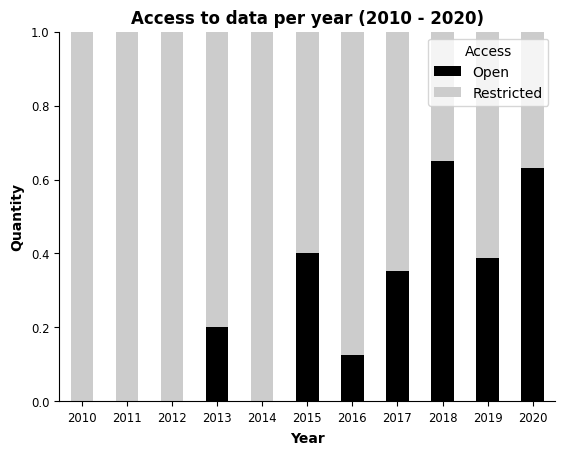

In [75]:
df_access = df_data_type[["paper_id","apa_citation",'Access', "year", "model_id"]]

df_access = df_access.groupby(
        ["paper_id",'Access']
        ).nth(0)
df_access.reset_index(inplace=True)

df_access_crosstab = pd.crosstab(index=df_access['year'], columns=df_access['Access'],normalize='index')

g = df_access_crosstab.plot(kind='bar',
                        stacked=True,
                        rot=0)
g.set_ylim([0, 1])
g.set(title = 'Access to data per year (2010 - 2020)', xlabel = 'Year', ylabel = 'Quantity')

### ¿Cual es la frecuencia de uso de cada bse de datos encontrada?

6. Gráfico frencuencia de uso de cada base de datos pública encontrada
- Interpretacion: Un predominio de pocas bases de datos. Estamos todo el tiempo sacando conclusiones sobre los mismos sujetos? Ver predominio de bases de datos publicas por sobre las privadas
- No se ha tenido en cuenta el dato aportado por Lorenzo (mas de una db por paper)

In [76]:
df_data_type=df_data_type.fillna('-')
df_data_type_sin_duplicates = df_data_type.drop_duplicates(subset='paper_id')

In [77]:
df_db = df_data_type.groupby(['paper_id',"public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']).nth(0)
df_db.reset_index(inplace=True)

In [78]:
df_db = multi_reversing(df_db, 'model_id', df_db[["public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']])
df_db = df_db.replace('Multimodal Dyadic Behavior (MMDB)', 'MMDB')

In [79]:
df_db["variable"].value_counts()

db_private          58
is_database         37
db_public            4
use_multiple_db      2
db_uppon_request     1
Name: variable, dtype: int64

In [80]:
df_data_type[["Access", "model_id", "public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']]
df_data_type[["public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']].value_counts()


public_database  use_multiple_db  db_private  db_public  db_private_and_public  db_uppon_request  is_database
-                -                x           -          -                      -                 -              58
                                  -           -          -                      -                 x              35
                                              x          -                      -                 -               4
                 x                -           -          -                      -                 x               2
                 -                -           -          -                      x                 -               1
dtype: int64

In [81]:
df_data_type["Access"].value_counts()

Restricted    58
Open          42
Name: Access, dtype: int64

In [82]:
freq_data_base = df_data_type.groupby(['paper_id', 'DEAP',
       'AMIGOS', 'MAHNOB', 'CASE', 'Ascertain', 'Cog.load',
       'Multimodal Dyadic Behavior (MMDB)', 'RECOLA', 'DECAF',
       'Driving Workload', '(AV+EC) 2015', 'Liris', 'SenseEmotion', 'PMEmo',
       'AFEW', 'Hazumi1911', 'Bio Vid Emo DB', 'RCDAT', 'DREAMER',
       'Non-EEG Biosignals Data Set for Assessment and Visualization of Neurological Status',
       'Stress Recognition in Automobile Drivers Data Set', 'PsPM-HRA1']).nth(0)
freq_data_base.reset_index(inplace=True)

db_freq = multi_reversing(freq_data_base, 'model_id', freq_data_base[['DEAP',
       'AMIGOS', 'MAHNOB', 'CASE', 'Ascertain', 'Cog.load',
       'Multimodal Dyadic Behavior (MMDB)', 'RECOLA', 'DECAF',
       'Driving Workload', '(AV+EC) 2015', 'Liris', 'SenseEmotion', 'PMEmo',
       'AFEW', 'Hazumi1911', 'Bio Vid Emo DB', 'RCDAT', 'DREAMER',
       'Non-EEG Biosignals Data Set for Assessment and Visualization of Neurological Status',
       'Stress Recognition in Automobile Drivers Data Set', 'PsPM-HRA1']])
db_freq['variable'].value_counts()

DEAP                                 9
AMIGOS                               7
MAHNOB                               7
PMEmo                                3
Ascertain                            2
RECOLA                               2
Multimodal Dyadic Behavior (MMDB)    1
(AV+EC) 2015                         1
Liris                                1
AFEW                                 1
Hazumi1911                           1
Bio Vid Emo DB                       1
RCDAT                                1
Name: variable, dtype: int64

In [83]:
db_freq['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

DEAP                                 24.3%
AMIGOS                               18.9%
MAHNOB                               18.9%
PMEmo                                 8.1%
Ascertain                             5.4%
RECOLA                                5.4%
Multimodal Dyadic Behavior (MMDB)     2.7%
(AV+EC) 2015                          2.7%
Liris                                 2.7%
AFEW                                  2.7%
Hazumi1911                            2.7%
Bio Vid Emo DB                        2.7%
RCDAT                                 2.7%
Name: variable, dtype: object

In [84]:
db_freq['variable'] = db_freq['variable'].replace(
    to_replace=['Multimodal Dyadic Behavior (MMDB)'], 
    value='MMDB')

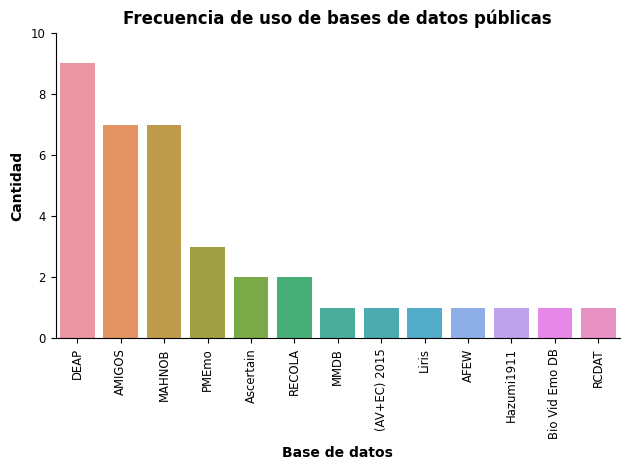

In [85]:
titulos = ['Frecuencia de uso de bases de datos públicas', 'Base de datos', 'Cantidad']
bar_plot('variable',db_freq,titulos)

'\ng.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])\nplt.xticks(rotation=90\n\n\n\nax1.set_yticklabels(ax1.get_yticklabels())\nax2.set_yticklabels(ax2.get_yticklabels())\nax1.set_xticklabels(ax1.get_xticklabels())\nax2.set_xticklabels(ax2.get_xticklabels())\n\nax1.set_xlabel("año")\nax1.set_ylabel("proporción de trabajos")\nax2.set_xlabel("año")\nax2.set_ylabel("proporción de trabajos")\n\nax1.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de modelo emocional")\nax2.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de algoritmo")\n\nax1.legend(title=\'Modelo afectivo\', loc=\'upper left\')\nax2.legend(title=\'Tipo de algoritmo\', loc=\'upper left\')'

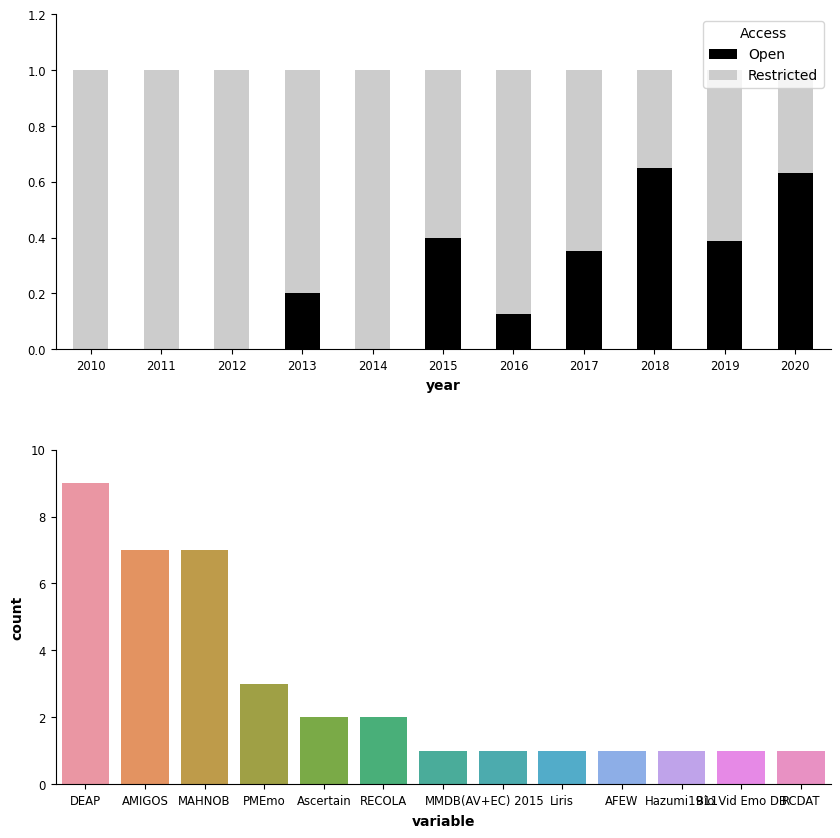

In [86]:
fig, axes = plt.subplots(2, 1)

fig.set_figheight(10)
fig.set_figwidth(10)

ax1 = df_access_crosstab.plot(kind='bar',
                        stacked=True,
                        rot=0,
                        ax=axes[0])


ax2 = sns.countplot(x="variable", 
                    data=db_freq, 
                    order = getattr(db_freq, "variable").value_counts().index,
                    ax=axes[1])



"""
g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
plt.xticks(rotation=90



ax1.set_yticklabels(ax1.get_yticklabels())
ax2.set_yticklabels(ax2.get_yticklabels())
ax1.set_xticklabels(ax1.get_xticklabels())
ax2.set_xticklabels(ax2.get_xticklabels())

ax1.set_xlabel("año")
ax1.set_ylabel("proporción de trabajos")
ax2.set_xlabel("año")
ax2.set_ylabel("proporción de trabajos")

ax1.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de modelo emocional")
ax2.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de algoritmo")

ax1.legend(title='Modelo afectivo', loc='upper left')
ax2.legend(title='Tipo de algoritmo', loc='upper left')"""

### ¿De que revistas cientificas provinieron la mayoria de los papers? ¿Cual era su orientacion (psicologica o ingenieria de datos)?
7. Gráfico frecuencia de papers según revista científica de origen, distinguiendo entre las que poseen orientación en ingeniería de datos y las que no

Nota: falta filtrar bien cuales son journal, y cuales de estas son de ingenieria o no (diferenciarlas con color o hue)

C:\Users\someo\AppData\Local\Temp\ipykernel_39484\4083952796.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


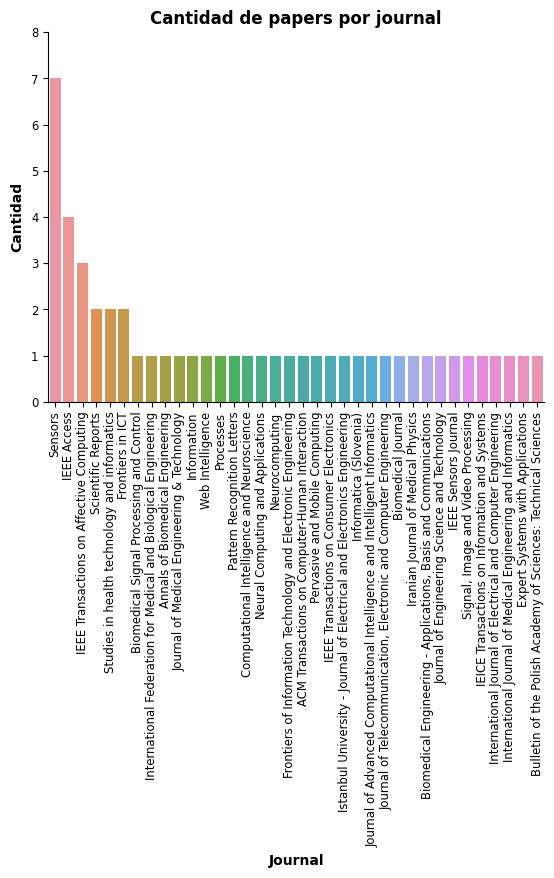

In [87]:
#por revista
df_metadata=df_metadata.fillna('-')
df_metadata_sin_duplicates = df_metadata.drop_duplicates(subset='paper_id')

df_source_title = df_metadata_sin_duplicates[['paper_id','source_title','source_type_journal']]
df_source_title = df_source_title[df_source_title['source_type_journal'].isin(['x', 'X'])] 

titulos = ['Cantidad de papers por journal', 'Journal', 'Cantidad']
bar_plot('source_title',df_source_title,titulos)

In [88]:
df_source_title["source_title"].value_counts()

Sensors                                                                       7
IEEE Access                                                                   4
IEEE Transactions on Affective Computing                                      3
Scientific Reports                                                            2
Studies in health technology and informatics                                  2
Frontiers in ICT                                                              2
Biomedical Signal Processing and Control                                      1
International Federation for Medical and Biological Engineering               1
Annals of Biomedical Engineering                                              1
Journal of Medical Engineering & Technology                                   1
Information                                                                   1
Web Intelligence                                                              1
Processes                               

In [89]:
df_source_title["source_title"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Sensors                                                                       14.0%
IEEE Access                                                                    8.0%
IEEE Transactions on Affective Computing                                       6.0%
Scientific Reports                                                             4.0%
Studies in health technology and informatics                                   4.0%
Frontiers in ICT                                                               4.0%
Biomedical Signal Processing and Control                                       2.0%
International Federation for Medical and Biological Engineering                2.0%
Annals of Biomedical Engineering                                               2.0%
Journal of Medical Engineering & Technology                                    2.0%
Information                                                                    2.0%
Web Intelligence                                                            

In [90]:
serie_sources = df_source_title["source_title"].value_counts()
df_serie_sources = serie_sources.to_frame()
df_serie_sources = df_serie_sources.reset_index()
df_serie_sources.rename(columns = {'index':'algoritmo', 'variable':'cantidad'}, inplace = True)

In [91]:
col1 = df_serie_sources.columns[0]
col2 = df_serie_sources.columns[1]

mapping_others = {}

for i, row in df_serie_sources.iterrows():
    if row[col2] == 1:
        mapping_others.update({row[col1]: "Others (=1)"})

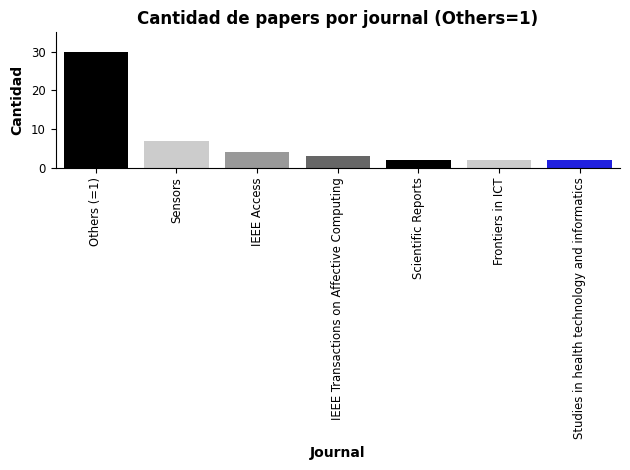

In [92]:
sources_with_others = df_source_title.copy()
sources_with_others.loc[:,'source_title'] = sources_with_others.loc[:,'source_title'].replace(mapping_others)
sources_with_others['source_title'].value_counts()

titulos = ['Cantidad de papers por journal (Others=1)', 'Journal', 'Cantidad']
bar_plot('source_title',sources_with_others,titulos)

In [93]:
sources_with_others["source_title"].value_counts()

Others (=1)                                     30
Sensors                                          7
IEEE Access                                      4
IEEE Transactions on Affective Computing         3
Scientific Reports                               2
Frontiers in ICT                                 2
Studies in health technology and informatics     2
Name: source_title, dtype: int64

In [94]:
sources_with_others["source_title"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Others (=1)                                     60.0%
Sensors                                         14.0%
IEEE Access                                      8.0%
IEEE Transactions on Affective Computing         6.0%
Scientific Reports                               4.0%
Frontiers in ICT                                 4.0%
Studies in health technology and informatics     4.0%
Name: source_title, dtype: object

### Interpretation

In [95]:
data_interpretation_model = pd.read_csv('.\data\Tabla Normalizada - Statistical Learning model.csv')
data_interpretation_model= data_interpretation_model.fillna('-')
model_interpretion = data_interpretation_model[data_interpretation_model['model_interpretation'] !='-']
model_interpretation = model_interpretion.groupby(['paper_id', 'model_interpretation']).nth(0)

In [96]:
model_interpretation.reset_index(inplace= True)
model_interpretation.drop_duplicates(subset = ['paper_id'],inplace=True)
model_interpretation

paper_id                               model_interpretation model_id  \
0        5.0  By using the gradient fields (see Fig. 6(c,d))...     10.0   
1       12.0  Figure 6 shows similar EDA signal behaviour du...     47.0   
2       17.0  After preprocessing and windowing the signals,...     95.0   
3       19.0  The relationship between visual descriptors an...    129.0   
4       21.0  Physiological measures in the real world are m...    132.0   
5       29.0  Furthermore, it is worth noting that quality a...    167.0   
6       30.0  Poor classification accuracy may arise because...    175.0   
8       35.0  Compare to some references [1], [3], [4], the ...    195.0   
9       43.0   Electrodermal Activity. Interestingly, EDA se...    261.0   
10      57.0  Additionally, we showed that psychological tra...    295.0   
11      60.0  Additionally, analyzing the results of the sta...    309.0   
12      61.0  Another major finding is that EEG and GSR appe...    329.0   
13      64.0  Another\r\nreason for the better performance o...    343.0   
14      65.0  Particularly, although EDA is one of\r\nthe mo...    344.0   
15      75.0  Finally, significant correlates were found bet...    387.0   
16      77.0  This research analyzed the physiological compo...    419.0   
17      78.0  While our study shows that with TEM, the emoti...    421.0   
18      82.0  Physiological datasets with a large number of ...    438.0   
19      85.0  The proposed framework has enhanced the perfor...    454.0   
20      88.0   relevant information on the ANS activity can ...    463.0   
21      92.0  the initial analysis also shows some noticeabl...    476.0   
22      95.0  Second, our error analysis suggests that\nthe ...    488.0   
24      96.0  The best features that were repeated\r\nin the...    491.0   

                                         apa_citation    year affective_model  \
0   Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....  2016.0     dimensional   
1   Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...  2018.0     categorical   
2   Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...  2017.0     categorical   
3   Hernández-García, A., Fernández-Martínez, F., ...  2017.0     dimensional   
4   Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...  2017.0     dimensional   
5   Gupta, R., Abadi, M. K., Cabré, J. A. C., Morr...  2016.0     dimensional   
6   Ooi, J. S. K., Ahmad, S. A., Chong, Y. Z., Ali...  2016.0     categorical   
8   Ferdinando, H., & Alasaarela, E. (2018). Emoti...  2018.0     dimensional   
9   Barral, O., Kosunen, I., & Jacucci, G. (2017)....  2017.0     categorical   
10  Henriques, R., Paiva, A., & Antunes, C. (2013)...  2013.0     categorical   
11  Al Machot, F., Elmachot, A., Ali, M., Al Macho...  2019.0     dimensional   
12  Seo, J., Laine, T. H., & Sohn, K. A. (2019). A...  2019.0     dimensional   
13  Dar, M. N., Akram, M. U., Khawaja, S. G., & Pu...  2020.0     dimensional   
14  Greco, A., Marzi, C., Lanata, A., Scilingo, E....  2019.0     dimensional   
15  Song, T., Zheng, W., Lu, C., Zong, Y., Zhang, ...  2019.0     categorical   
16  Pinto, G., Carvalho, J. M., Barros, F., Soares...  2020.0     categorical   
17  Raheel, A., Majid, M., Alnowami, M., & Anwar, ...  2020.0     categorical   
18  Santamaria-Granados, L., Munoz-Organero, M., R...  2019.0     dimensional   
19  Xie, J., Xu, X., & Shu, L. (2018, May). WT fea...  2018.0     categorical   
20  Ghiasi, S., Greco, A., Barbieri, R., Scilingo,...  2020.0     dimensional   
21  Rahman, J. S., Hossain, M. Z., & Gedeon, T. (2...  2019.0     categorical   
22  Yang, H. C., & Lee, C. C. (2019, September). A...  2020.0     dimensional   
24  Kołodziej, M., Tarnowski, P., Majkowski, A., &...  2020.0     dimensional   

   is_classifier class_model_output_number  \
0              -                         -   
1              x                         2   
2              x                         2   
3              -                         -   
4   

In [97]:
print(f' En {len(model_interpretation)} papers se realizan interpretaciones emocionales de los modelos')

 En 23 papers se realizan interpretaciones emocionales de los modelos


In [98]:
# lista papers id
model_interpretation_list = model_interpretation["paper_id"].to_list()
model_interpretation_list = [int(a) for a in model_interpretation_list]
model_interpretation_list

[5,
 12,
 17,
 19,
 21,
 29,
 30,
 35,
 43,
 57,
 60,
 61,
 64,
 65,
 75,
 77,
 78,
 82,
 85,
 88,
 92,
 95,
 96]

In [99]:
df_metadata_filtered = df_metadata[df_metadata['paper_id'].isin(model_interpretation_list)]
df_metadata_filtered.drop_duplicates("paper_id", inplace= True)
df_metadata_filtered[["paper_id", "apa_citation", "year", "source_title"]]

C:\Users\someo\AppData\Local\Temp\ipykernel_39484\3128163824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata_filtered.drop_duplicates("paper_id", inplace= True)


paper_id                                       apa_citation  year  \
9           5  Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....  2016   
46         12  Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...  2018   
94         17  Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...  2017   
128        19  Hernández-García, A., Fernández-Martínez, F., ...  2017   
131        21  Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...  2017   
166        29  Gupta, R., Abadi, M. K., Cabré, J. A. C., Morr...  2016   
172        30  Ooi, J. S. K., Ahmad, S. A., Chong, Y. Z., Ali...  2016   
194        35  Ferdinando, H., & Alasaarela, E. (2018). Emoti...  2018   
260        43  Barral, O., Kosunen, I., & Jacucci, G. (2017)....  2017   
293        57  Henriques, R., Paiva, A., & Antunes, C. (2013)...  2013   
308        60  Al Machot, F., Elmachot, A., Ali, M., Al Macho...  2019   
328        61  Seo, J., Laine, T. H., & Sohn, K. A. (2019). A...  2019   
342        64  Dar, M. N., Akram, M. U., Khawaja, S. G., & Pu...  2020   
343        65  Greco, A., Marzi, C., Lanata, A., Scilingo, E....  2019   
383        75  Song, T., Zheng, W., Lu, C., Zong, Y., Zhang, ...  2019   
418        77  Pinto, G., Carvalho, J. M., Barros, F., Soares...  2020   
420        78  Raheel, A., Majid, M., Alnowami, M., & Anwar, ...  2020   
437        82  Santamaria-Granados, L., Munoz-Organero, M., R...  2019   
453        85  Xie, J., Xu, X., & Shu, L. (2018, May). WT fea...  2018   
462        88  Ghiasi, S., Greco, A., Barbieri, R., Scilingo,...  2020   
475        92  Rahman, J. S., Hossain, M. Z., & Gedeon, T. (2...  2019   
480        95  Yang, H. C., & Lee, C. C. (2019, September). A...  2020   
490        96  Kołodziej, M., Tarnowski, P., Majkowski, A., &...  2020   

                                          source_title  
9                                   Scientific Reports  
46   International Journal of Medical Engineering a...  
94                  Signal, Image and Video Processing  
128  Proceedings - 2017 IEEE/WIC/ACM International ...  
131  2017 IEEE International Conference on Pervasiv...  
166  ICMR 2016 - Proceedings of the 2016 ACM Intern...  
172  IECBES 2016 - IEEE-EMBS Conference on Biomedic...  
194  Journal of Telecommunication, Electronic and C...  
260     ACM Transactions on Computer-Human Interaction  
293  Humaine Association Conference on Affective Co...  
308                                            Sensors  
328                                            Sensors  
342                                            Sensors  
343  Annual International Conference of the IEEE En...  
383                                        IEEE Access  
418                                            Sensors  
420                                            Sensors  
437                                        IEEE Access  
453  Asian Conf. Affective Comput. Intell. Interact...  
462                                 Scientific Reports  
475  Australian Conference on Human-Computer-Intera...  
480  International Conference on Affective Computin...  
490  Bulletin of the Polish Academy of Sciences: Te...

In [100]:
list_journal_int = df_metadata_filtered["source_title"].unique()
list_journal_int = list_journal_int.tolist()
list_journal_int

['Scientific Reports',
 'International Journal of Medical Engineering and Informatics',
 'Signal, Image and Video Processing',
 'Proceedings - 2017 IEEE/WIC/ACM International Conference on Web Intelligence, WI 2017',
 '2017 IEEE International Conference on Pervasive Computing and Communications Workshops, PerCom Workshops 2017',
 'ICMR 2016 - Proceedings of the 2016 ACM International Conference on Multimedia Retrieval',
 'IECBES 2016 - IEEE-EMBS Conference on Biomedical Engineering and Sciences',
 'Journal of Telecommunication, Electronic and Computer Engineering',
 'ACM Transactions on Computer-Human Interaction',
 'Humaine Association Conference on Affective Computing and Intelligent Interaction',
 'Sensors',
 'Annual International Conference of the IEEE Engineering in Medicine and Biology Society. IEEE Engineering in Medicine and Biology Society. Annual International Conference',
 'IEEE Access',
 'Asian Conf. Affective Comput. Intell. Interaction, ACII Asia',
 'Australian Conference

C:\Users\someo\AppData\Local\Temp\ipykernel_39484\1232193231.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


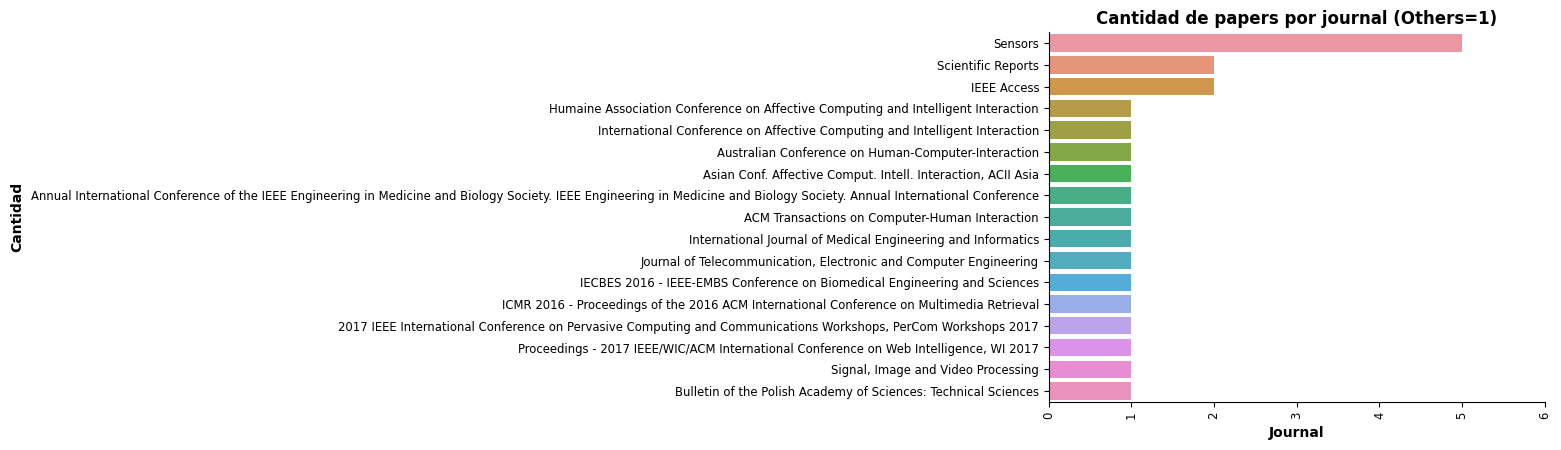

In [101]:
titulos = ['Cantidad de papers por journal (Others=1)', 'Journal', 'Cantidad']

var_x = "source_title"
df = df_metadata_filtered

g = sns.countplot(y=var_x, data=df, order = getattr(df, var_x).value_counts().index)
g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
plt.xticks(rotation=90)
    
plt.tight_layout()
plt.savefig(f'.\\Emmanuel\\figures\\NUEVOS. {titulos[0]}.jpg', dpi=1000)
plt.show()

### Participants

In [102]:
df_participants= df_participants.fillna('-')

In [103]:
df_participants

paper_id  model_id                                       apa_citation  \
0           1         1  Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...   
1           2         2  Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...   
2           3         3  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
3           3         4  Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   
4           4         5  Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....   
..        ...       ...                                                ...   
494        98       495  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
495        98       496  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
496        98       497  Subramanian, R., Wache, J., Abadi, M. K., Vier...   
497        99       498  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...   
498        99       499  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...   

      N n_female mean_age meadian_age range_age country  
0    45       20        -           -         -   Spain  
1     -        -        -           -         -   China  
2    32       16     26.9           -     19-37       -  
3    32       16     26.9           -     19-37       -  
4    27       16    26.06           -     19-40       -  
..   ..      ...      ...         ...       ...     ...  
494  58       21       30           -         -       -  
495  58       21       30           -         -       -  
496  58       21       30           -         -       -  
497  27        -        -           -         -       -  
498  27        -        -           -         -       -  

[499 rows x 9 columns]

country

In [104]:
df_participants_country = df_participants.groupby(['paper_id', 'country']).nth(0)
df_participants_country.reset_index(inplace =  True)
df_participants_country["country"].value_counts()

-            77
Malasya       5
China         3
Iran          3
Spain         1
USA           1
Germany       1
India         1
Indonesia     1
Canada        1
French        1
Finland       1
Korea         1
Italy         1
Poland        1
Name: country, dtype: int64

In [105]:
participants_total = df_participants.groupby(['paper_id', 'N']).nth(0)
participants_total.reset_index(inplace =  True)

In [106]:
participants_n= participants_total[participants_total['N']!= '-']
participants_n

paper_id    N  model_id  \
0           1   45         1   
2           3   32         3   
3           4   27         5   
4           5   27        10   
5           6  121        12   
..        ...  ...       ...   
102        95   40       481   
103        96   22       491   
104        97   32       492   
105        98   58       494   
106        99   27       498   

                                          apa_citation n_female mean_age  \
0    Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...       20        -   
2    Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...       16     26.9   
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....       16    26.06   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....       27    19.44   
5    Feng, H., Golshan, H. M., & Mahoor, M. H. (201...        -        -   
..                                                 ...      ...      ...   
102  Yang, H. C., & Lee, C. C. (2019, September). A...       13     28.3   
103  Kołodziej, M., Tarnowski, P., Majkowski, A., &...        -       20   
104  Ganapathy, N., & Swaminathan, R. (2019). Emoti...       16     26.9   
105  Subramanian, R., Wache, J., Abadi, M. K., Vier...       21       30   
106  Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...        -        -   

    meadian_age range_age country  
0             -         -   Spain  
2             -     19-37       -  
3             -     19-40       -  
4             -     18-22       -  
5             -       1-3     USA  
..          ...       ...     ...  
102           -         -       -  
103           -         -  Poland  
104           -     19-37       -  
105           -         -       -  
106           -         -       -  

[96 rows x 9 columns]

49.041666666666664


C:\Users\someo\AppData\Local\Temp\ipykernel_39484\1327012932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants_n["N"] = participants_n["N"].astype(int)


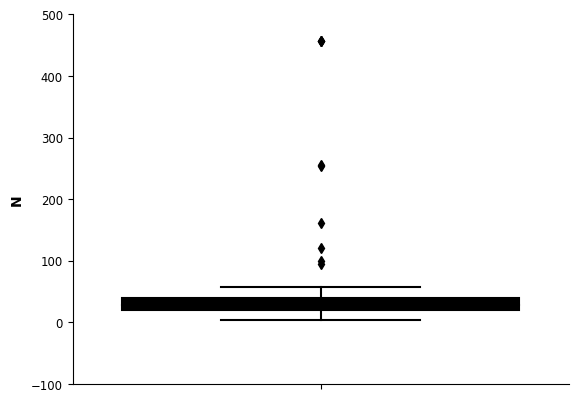

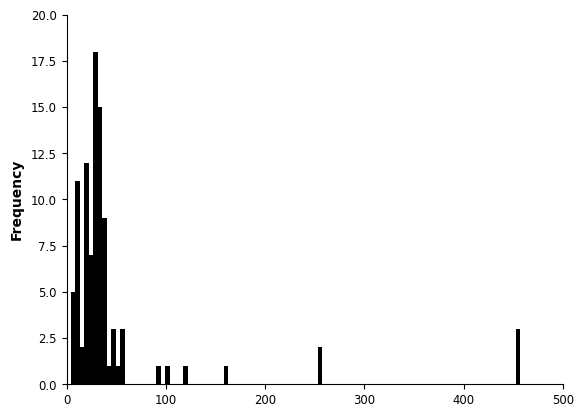

In [107]:
participants_n["N"] = participants_n["N"].astype(int)
print(participants_n['N'].mean())
g = sns.boxplot(y="N", data=participants_n)
plt.show()
g2 = participants_n['N'].plot(bins = 100,kind ='hist', xlim = [0,500])
plt.show()

In [108]:
participants_no_n= participants_total[participants_total['N']== '-']
participants_no_n

paper_id  N  model_id                                       apa_citation  \
1          2  -         2  Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...   
27        28  -       158  Das, P., Khasnobish, A., & Tibarewala, D. N. (...   
36        37  -       221  Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...   
44        40  -       251  Milchevski, A., Rozza, A., & Taskovski, D. (20...   
51        47  -       269  Bornoiu, I.-V., Strungaru, R., & Grigore, O. (...   
53        49  -       275  Drungilas, D., Bielskis, A. A., & Denisov, V. ...   
58        54  -       284  Cheng, J., & Liu, G. (2013). Computing nonline...   
74        68  -       358  García-Faura, Á., Hernández-García, A., Fernán...   
78        72  -       368  Golgouneh, A., & Tarvirdizadeh, B. (2020). Fab...   
96        90  -       468  Katada, S., Okada, S., Hirano, Y., & Komatani,...   
99        93  -       477  Rahim, A., Sagheer, A., Nadeem, K., Dar, M. N....   

   n_female mean_age meadian_age range_age country  
1         -        -           -         -   China  
27        -        -           -         -       -  
36        -        -           -         -       -  
44        -        -           -         -       -  
51        -        -           -     25-65       -  
53        -        -           -         -       -  
58        -       20           -         -       -  
74        -    23.11           -     17-60       -  
78        -        -           -         -       -  
96        -        -           -         -       -  
99        -        -           -         -       -

In [109]:
participants_female = df_participants.groupby(['paper_id', 'n_female']).nth(0)
participants_female.reset_index(inplace =  True)

In [110]:
participants_female= participants_female[participants_female['n_female'] != '-']
participants_female

paper_id n_female  model_id  \
0           1       20         1   
2           3       16         3   
3           4       16         5   
4           5       27        10   
6           7        3        20   
..        ...      ...       ...   
98         93       13       478   
99         94      236       479   
100        95       13       481   
102        97       16       492   
103        98       21       494   

                                          apa_citation    N mean_age  \
0    Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...   45        -   
2    Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...   32     26.9   
3    Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....   27    26.06   
4    Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....   27    19.44   
6    Schmidt, P., Reiss, A., Duerichen, R., & Van L...   15     27.5   
..                                                 ...  ...      ...   
98   Rahim, A., Sagheer, A., Nadeem, K., Dar, M. N....   40     28.3   
99   Yin, G., Sun, S., Zhang, H., Yu, D., Li, C., Z...  457        -   
100  Yang, H. C., & Lee, C. C. (2019, September). A...   40     28.3   
102  Ganapathy, N., & Swaminathan, R. (2019). Emoti...   32     26.9   
103  Subramanian, R., Wache, J., Abadi, M. K., Vier...   58       30   

    meadian_age range_age  country  
0             -         -    Spain  
2             -     19-37        -  
3             -     19-40        -  
4             -     18-22        -  
6             -         -  Germany  
..          ...       ...      ...  
98            -         -        -  
99            -         -        -  
100           -         -        -  
102           -     19-37        -  
103           -         -        -  

[73 rows x 9 columns]

25.589041095890412


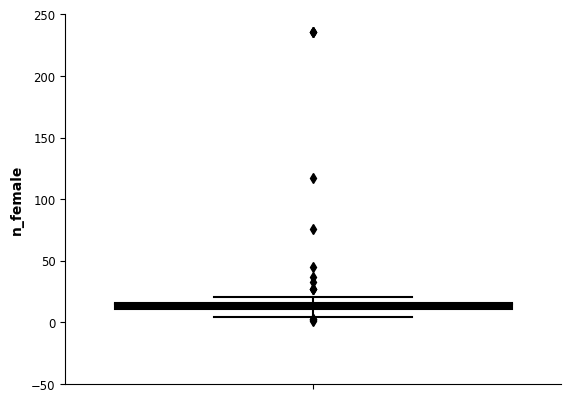

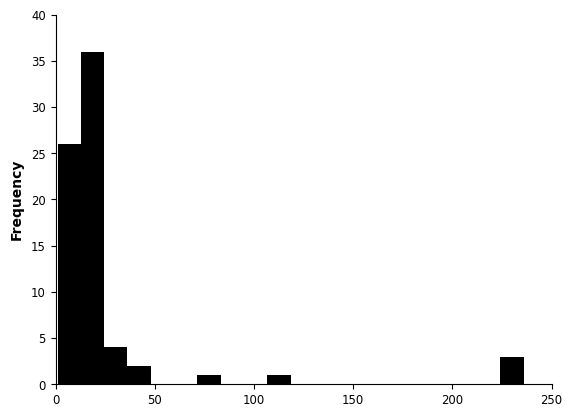

In [111]:
participants_female["n_female"] = participants_female["n_female"].astype(int)
print(participants_female['n_female'].mean())
g = sns.boxplot(y="n_female", data=participants_female)
plt.show()
participants_female['n_female'].plot(bins = 20,kind ='hist', xlim = [0,250])
plt.show()

In [112]:
df_p_range_age = df_participants.groupby(['paper_id', 'range_age']).nth(0)
df_p_range_age.reset_index(inplace =  True)
df_p_range_age= df_p_range_age[df_p_range_age['range_age'] != '-']
df_p_range_age["range_age"].value_counts()

19-37    10
19-40     9
18-22     2
19-25     2
21-38     2
23-36     2
17-60     1
20-25     1
24-34     1
19-24     1
20-34     1
18-29     1
22-32     1
18-28     1
20-26     1
20-36     1
18-45     1
21-28     1
23-44     1
20-50     1
25-65     1
25-28     1
21-24     1
20-35     1
22-45     1
23-57     1
25-35     1
21-59     1
21-25     1
21-39     1
19-30     1
20-40     1
21-30     1
1-3       1
20-23     1
Name: range_age, dtype: int64

In [113]:
df_p_mean_age = df_participants.groupby(['paper_id', 'mean_age']).nth(0)
df_p_mean_age.reset_index(inplace =  True)
df_p_mean_age= df_p_mean_age[df_p_mean_age['mean_age'] != '-']

25.812857142857144


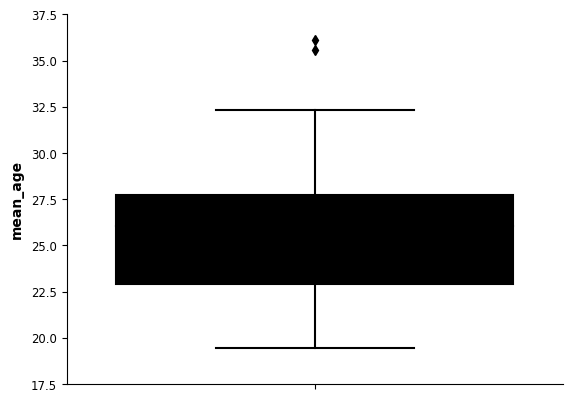

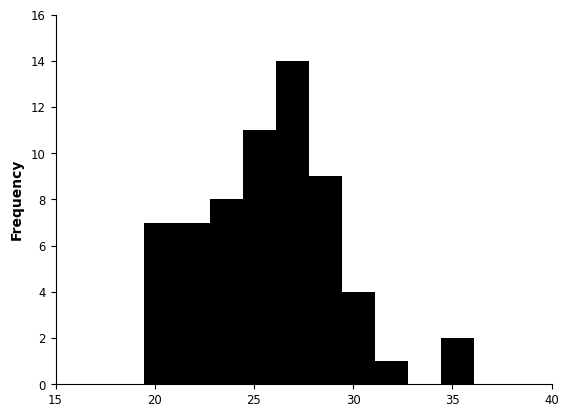

In [114]:
df_p_mean_age["mean_age"] = df_p_mean_age["mean_age"].astype(float)
print(df_p_mean_age['mean_age'].mean())
g = sns.boxplot(y="mean_age", data=df_p_mean_age)
plt.show()
df_p_mean_age['mean_age'].plot(bins = 10,kind ='hist', xlim = [15,40])
plt.show()

In [115]:
df_participants.loc[df_participants['range_age'] == "-", 'range_age'] = "0"
range_age = df_p_range_age[df_p_range_age['range_age'] != '0']
range_age['range_age'] = range_age['range_age'].str.replace('-',' ')
range_age['range_age'].str.split()
df_ranges = range_age['range_age'].str.split(pat = ' ', expand = True)
df_ranges[0] = df_ranges[0].astype(int)
df_ranges[1] = df_ranges[1].astype(int)
df_ranges

0   1
2    19  37
3    19  40
4    18  22
5     1   3
8    21  30
9    19  40
10   20  40
11   19  30
14   21  39
15   19  40
16   21  25
18   21  59
19   19  40
21   23  36
22   19  37
23   25  35
24   23  36
25   18  22
34   19  40
35   19  25
37   19  37
38   19  40
39   23  57
40   19  37
44   22  45
45   20  35
46   21  24
47   20  50
48   25  28
49   25  65
50   21  38
53   23  44
54   20  25
57   24  34
60   19  24
62   19  40
63   19  37
64   19  40
65   20  34
67   19  37
70   19  37
72   17  60
73   19  40
74   19  37
79   18  29
80   22  32
81   18  28
83   19  25
85   20  26
87   20  36
88   18  45
90   19  37
91   21  28
92   21  38
93   20  23
101  19  37

In [116]:
df_ranges[0].min()

1

In [117]:
df_ranges[1].max()

65

In [118]:
first = df_ranges[0].to_list()
second = df_ranges[1].to_list()
final_list = first + second
df_range_merged = pd.DataFrame(final_list, columns = ['ages'])
df_range_merged

ages
0      19
1      19
2      18
3       1
4      21
..    ...
107    37
108    28
109    38
110    23
111    37

[112 rows x 1 columns]

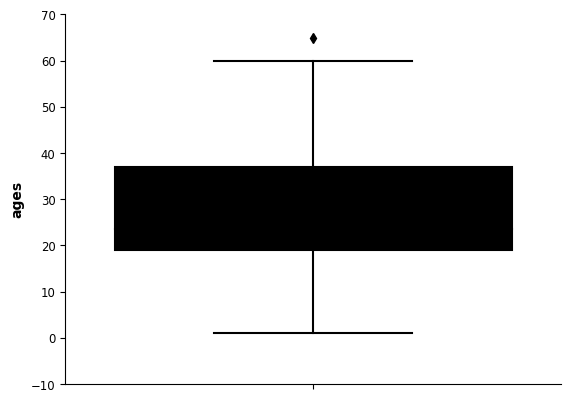

In [119]:
g = sns.boxplot(y="ages", data=df_range_merged)
plt.show()

# Plots para congreso

In [120]:
df_models = df_statistical_learning_models[["paper_id","apa_citation",'model', "year", "model_id"]]

df_models = df_models.groupby(
        ["paper_id",'model']
        ).nth(0)
df_models.reset_index(inplace=True)

In [121]:
df_statistical_learning_models['affective_model'] = df_statistical_learning_models['affective_model'].str.replace('categorical','categorial')

In [122]:
models = df_statistical_learning_models[["paper_id", "year", "affective_model", "model_id"]]

models = models.groupby(
        ["paper_id",'affective_model']
        ).nth(0)
models.reset_index(inplace=True)

models["year"] = models["year"].astype(int)

In [123]:
models["affective_model"].value_counts()

dimensional    68
categorial     39
Name: affective_model, dtype: int64

In [124]:
models_crosstab = pd.crosstab(index=models['year'], columns=models['affective_model'],normalize='index')

In [125]:
df_models['model'] = df_models['model'].str.replace('classifier','clasificación')
df_models['model'] = df_models['model'].str.replace('regressor','regresión')

In [126]:
n_models = df_models.groupby(
        ["paper_id",'model']
        ).nth(0)
n_models.reset_index(inplace=True)

n_models["year"] = n_models["year"].astype(int)

In [127]:
n_models_crosstab = pd.crosstab(index=n_models['year'], columns=n_models['model'],normalize='index')

C:\Users\someo\AppData\Local\Temp\ipykernel_39484\3497155564.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels())
C:\Users\someo\AppData\Local\Temp\ipykernel_39484\3497155564.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels())


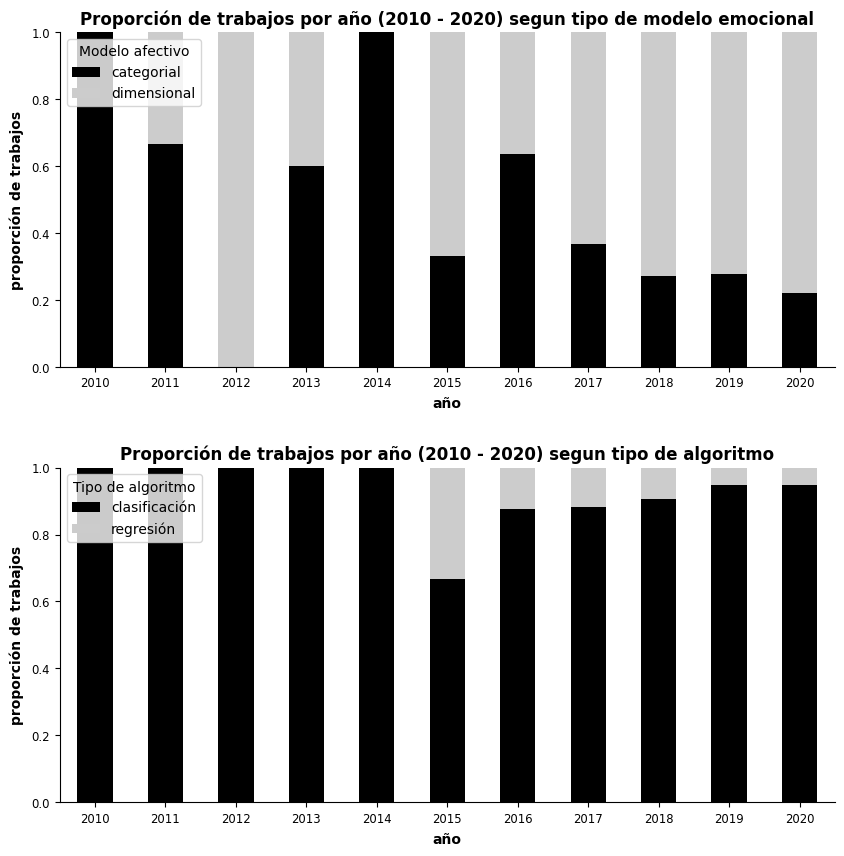

In [128]:
fig, axes = plt.subplots(2, 1)

fig.set_figheight(10)
fig.set_figwidth(10)

ax1 = models_crosstab.plot(kind='bar', 
    stacked=True,
    rot=0,
    ax=axes[0])

ax2 = n_models_crosstab.plot(kind='bar', 
    stacked=True,
    rot=0,
    ax=axes[1])

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])

ax1.set_yticklabels(ax1.get_yticklabels())
ax2.set_yticklabels(ax2.get_yticklabels())
ax1.set_xticklabels(ax1.get_xticklabels())
ax2.set_xticklabels(ax2.get_xticklabels())

ax1.set_xlabel("año")
ax1.set_ylabel("proporción de trabajos")
ax2.set_xlabel("año")
ax2.set_ylabel("proporción de trabajos")

ax1.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de modelo emocional")
ax2.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de algoritmo")

ax1.legend(title='Modelo afectivo', loc='upper left')
ax2.legend(title='Tipo de algoritmo', loc='upper left')

### EDA

In [129]:
df_eda = df_eda.fillna('-')
eda_devices = df_eda[df_eda['eda_device_specification']!= '-']  #me quedo solo con las rows que usaron dispositivos

¿En cuantas ocasiones no aclara el dispositivo de EDA utilizado?

In [130]:
aver = df_eda.groupby(['paper_id', 'eda_device_specification']).nth(0)
aver.reset_index(inplace= True)
len(aver[aver['eda_device_specification'] == '-'])

13

¿Cuantos eda devices HOMEMADE hay?

In [131]:
df_eda['eda_device_is_homemade']

0      Yes
1        x
2        -
3        -
4        -
      ... 
494      -
495      -
496      -
497      -
498      -
Name: eda_device_is_homemade, Length: 499, dtype: object

In [132]:
eda_devices = eda_devices.groupby(['paper_id', 'eda_device_specification']).nth(0)
eda_devices.reset_index(inplace=True)

In [133]:
eda_devices['eda_device_specification'].value_counts()

Biosemi ActiveTwo                           10
Biosemi activeTwo                            9
Shimmer 2R                                   8
Shimmer                                      3
MP150 BIOPAC                                 3
                                            ..
LabVIEW                                      1
Shimmer3 GSR+ Unit sensor                    1
Nexus 4 Biofeedback system3                  1
Bodymedia                                    1
(BITalino (r)evolution Plugged\r\nKit BT     1
Name: eda_device_specification, Length: 61, dtype: int64

In [134]:
# REDUCIMOS LAS CATEGORÍAS AGRUPANDOLAS
main_categories = ['BIOPAC', 'Empatica','GSR2','Sociograph', 'Variport', 'Shimmer', 'BioRadio 150', 'Affectiva-QSensors5','ProComp Infinity','PowerLab', 'Grove']

def reduce_categories(list_categories):
    '''
    esta función toma una lista de categorias y reemplaza por ellas a las rows con categorías similares
    
    ej: reemplaza por BIOPAC a 'BIOPAC 150'

    '''
    for category in list_categories:
        for i in eda_devices.loc[:,'eda_device_specification']:
            if fuzz.ratio(category, i) > 45:
                eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace({i:category})

# Reducimos algunas categorías a partir de la funcion reduce_categories
reduce_categories(main_categories)

# Aún quedan algunas categorias sin unificar asi que unifico las restantes y resuelvo las inconsistencias por diferencias de tipeo o abreviaciones
mapping_eda = {
    'MP150 Biopac': 'BIOPAC', 'MP35 Biopac' : 'BIOPAC','MP150':'BIOPAC','Biopac\r\nMP36' : 'BIOPAC',
    'Biosemi activeTwo' : 'Biosemi ActiveTwo', 'Biosemi ActiveTwo ':'Biosemi ActiveTwo',
    'PowerLab (manufactured\r\nby ADInstruments)': 'PowerLab',
    'Affectiva-QSensors5': 'Q Sensor by Afectiva',
    'Shimmer3 GSR+ Unit sensor':'Shimmer',
    'sensors produced by Thought Technology' : 'Thought Technology',
    'Grove\r\n(a standalone LM324 quadruple operational amplifier based on EDA sensor kit)':'Grove',
    'Grove GSR sensor produced by Seeed':'Grove',
    'Gen II integrated wearable device from Analog Devices, Inc': 'Gen II Analog Devices',
    'e-Health Sensor\nPlatform V2.0' : 'e-Health Sensor Platform V2.0',
    '(BITalino (r)evolution Plugged\r\nKit BT':'(BITalino (r)evolution Plugged Kit BT ',
    'Nexus-10' : 'NEXUS', 'Nexus 4 Biofeedback system3':'NEXUS', #NO ESTOY SEGURO SI ESTO REALMENTE SON LO MISMO, O SIQUIERA SI NEXUS ES LA MARCA
    'Nexus-32' : 'NEXUS'         }


eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace(mapping_eda)



In [135]:
eda_devices['eda_device_specification'].value_counts()

Biosemi ActiveTwo                               19
Shimmer                                         16
BIOPAC                                          16
Empatica                                         7
BioRadio 150                                     4
PowerLab                                         4
Grove                                            3
GSR2                                             3
NEXUS                                            3
ProComp Infinity                                 3
Q Sensor by Afectiva                             3
Variport                                         2
Commercial bluetooth sensor                      2
Sociograph                                       2
Mindfield eSense                                 1
BioNeuro multichannel biofeedback instrument     1
Thought Technology                               1
e-Health Sensor\r\nPlatform V2.0                 1
Bodymedia                                        1
LabVIEW                        

In [136]:
#In percentage
#Plot
eda_devices['eda_device_specification'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Biosemi ActiveTwo                               19.4%
Shimmer                                         16.3%
BIOPAC                                          16.3%
Empatica                                         7.1%
BioRadio 150                                     4.1%
PowerLab                                         4.1%
Grove                                            3.1%
GSR2                                             3.1%
NEXUS                                            3.1%
ProComp Infinity                                 3.1%
Q Sensor by Afectiva                             3.1%
Variport                                         2.0%
Commercial bluetooth sensor                      2.0%
Sociograph                                       2.0%
Mindfield eSense                                 1.0%
BioNeuro multichannel biofeedback instrument     1.0%
Thought Technology                               1.0%
e-Health Sensor\r\nPlatform V2.0                 1.0%
Bodymedia                   

¿Cuantos dipositivos de eda diferentes se utilizaron?

In [137]:
n_dispositivos_eda = eda_devices['eda_device_specification'].nunique()
print (f'Se utilizaron {n_dispositivos_eda} dispositivos de EDA diferentes')

Se utilizaron 25 dispositivos de EDA diferentes


¿En cuántas instancias de nuestro interés se especificó el dispositivo de EDA utilizado?

In [138]:
number_eda = sum(eda_devices['eda_device_specification'].value_counts())
print (f' Tenemos {number_eda} de instancias donde se aclaró el dispositivo de EDA utilizado.')

 Tenemos 98 de instancias donde se aclaró el dispositivo de EDA utilizado.


) missing from current font.ng\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


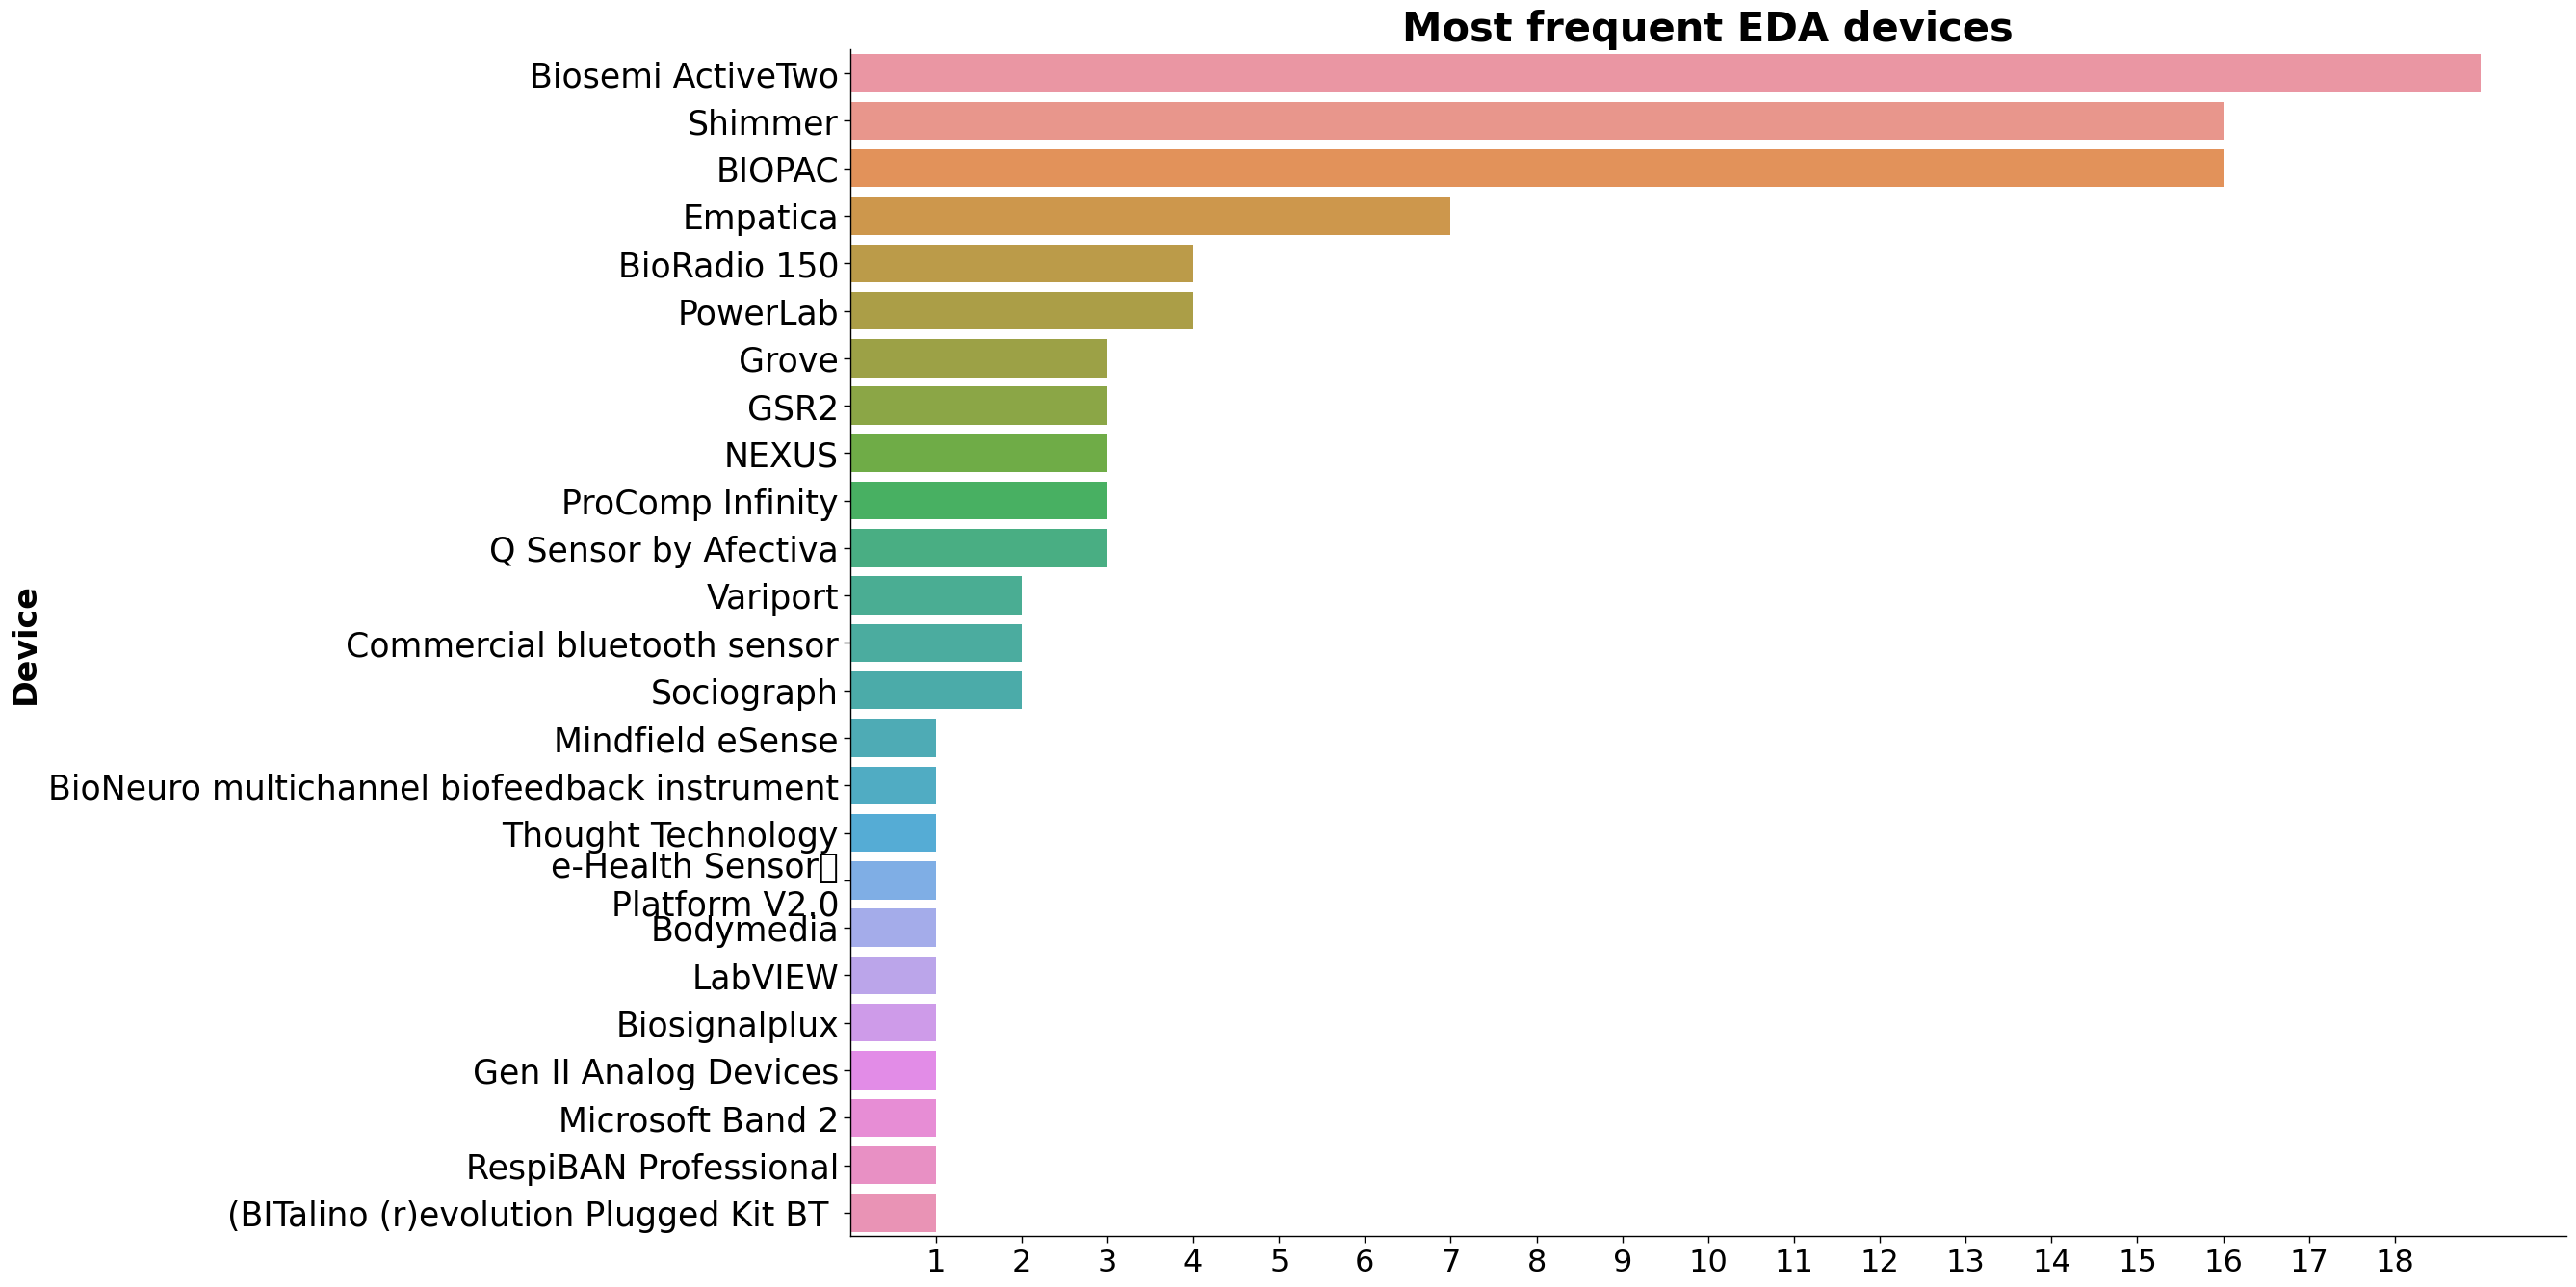

In [139]:
#Plot
from turtle import width


plt.figure(figsize = (23,16))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = eda_devices,
            order = eda_devices['eda_device_specification'].value_counts().index)
plt.title('Most frequent EDA devices',
            fontweight = 'bold',
            fontsize = 30)
plt.ylabel('Device',
            fontsize = 24,
            fontweight = 'bold')
plt.xlabel('')
plt.yticks(fontsize = 25)
plt.xticks(ticks = range(1,19), fontsize = 23)
plt.show()

In [140]:
#Aquellos que tenian una frecuencia de 4 o menos los agrupamos en 'Others'
mapping_others ={
        
        'Mindfield eSense': 'Others (<1)',
        'BioNeuro multichannel biofeedback instrument': 'Others (<1)',
        'Thought Technology': 'Others (<1)',
        'e-Health Sensor Platform V2.0': 'Others (<1)',
        'Bodymedia': 'Others (<1)',
        'LabVIEW': 'Others (<1)',
        'Biosignalplux': 'Others (<1)',
        'Gen II Analog Devices': 'Others (<1)',
        'Microsoft Band 2': 'Others (<1)',
        'RespiBAN Professional': 'Others (<1)',
        '(BITalino (r)evolution Plugged Kit BT ': 'Others (<1)'}

devices_with_others = eda_devices.copy()

devices_with_others.loc[:,'eda_device_specification'] = devices_with_others.loc[:,'eda_device_specification'].replace(mapping_others)
devices_with_others['eda_device_specification'].value_counts()


Biosemi ActiveTwo                   19
Shimmer                             16
BIOPAC                              16
Others (<1)                         10
Empatica                             7
BioRadio 150                         4
PowerLab                             4
Q Sensor by Afectiva                 3
Grove                                3
NEXUS                                3
ProComp Infinity                     3
GSR2                                 3
Sociograph                           2
Commercial bluetooth sensor          2
Variport                             2
e-Health Sensor\r\nPlatform V2.0     1
Name: eda_device_specification, dtype: int64

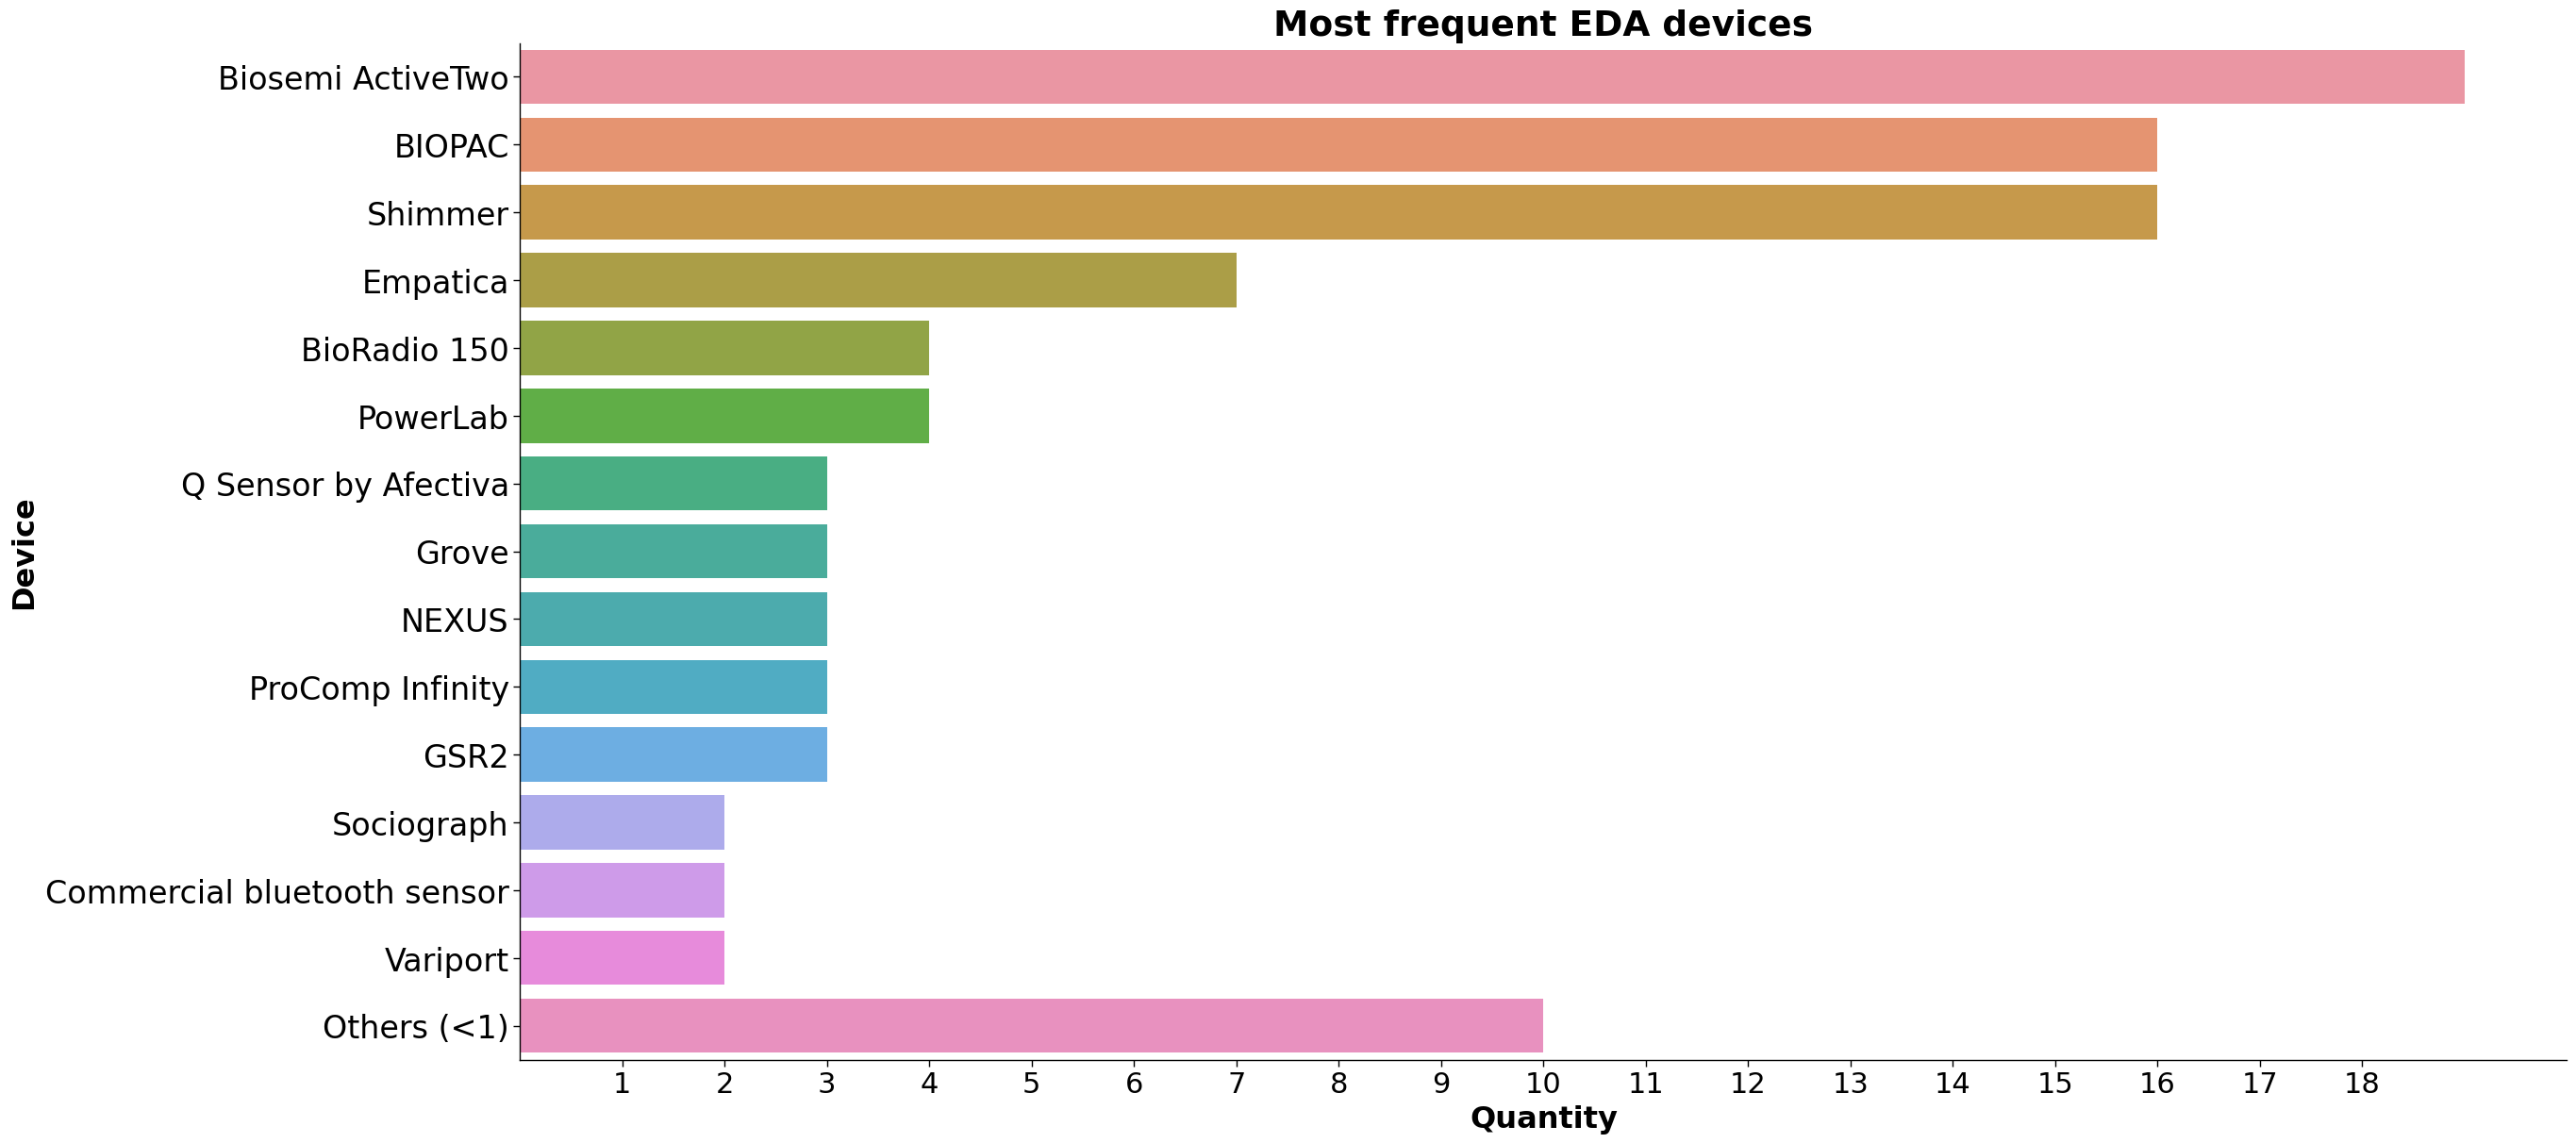

In [141]:
#Orden
plot_order = ['Biosemi ActiveTwo','BIOPAC', 'Shimmer', 'Empatica','BioRadio 150', 'PowerLab', 'Q Sensor by Afectiva' , 'Grove','NEXUS','ProComp Infinity', 'GSR2','Sociograph', 'Commercial bluetooth sensor', 'Variport', 'Others (<1)']

#Plot
plt.figure(figsize = (28,14))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = devices_with_others,
            order = plot_order)
plt.title('Most frequent EDA devices',
            fontweight = 'bold',
            fontsize = 27)
plt.ylabel('Device', fontsize = 23,fontweight = 'bold')
plt.xlabel('Quantity', fontsize = 23)
plt.yticks(fontsize = 24)
plt.xticks(ticks = range(1,19), fontsize = 22)
plt.show()